In [1]:
import pandas as pd
import numpy as np
from scipy.stats import *

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import mplcyberpunk
import warnings

plt.style.use("cyberpunk")
pd.set_option("max_columns", 1000) 
pd.set_option("max_rows", 10000)
warnings.filterwarnings("ignore")

In [2]:
mpl.rcParams["font.style"] = "italic"
mpl.rcParams["font.weight"] = "bold"
mpl.rcParams["axes.linewidth"] = 1.0
mpl.rcParams["figure.dpi"] = 200
mpl.rcParams["axes.titlesize"] = 25
mpl.rcParams["axes.labelsize"] = 23
mpl.rcParams["axes.titleweight"] = "bold"
mpl.rcParams["axes.titlelocation"] = "left"
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.labelweight"] = "bold"
mpl.rcParams["axes.labelpad"] = 5.0
mpl.rcParams["axes.titlepad"] = 10.0
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20

In [3]:
train = pd.read_csv("/storage/emulated/0/Participants_Data_Prediction_Hours/train.csv") 
test = pd.read_csv("/storage/emulated/0/Participants_Data_Prediction_Hours/test.csv") 
sub = pd.read_csv("/storage/emulated/0/Participants_Data_Prediction_Hours/submission.csv") 
 

In [5]:
train.infoh

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             18944 non-null  int64 
 1   workclass       18944 non-null  object
 2   fnlwgt          18944 non-null  int64 
 3   education       18944 non-null  object
 4   education-num   18944 non-null  int64 
 5   marital-status  18944 non-null  object
 6   occupation      18944 non-null  object
 7   relationship    18944 non-null  object
 8   race            18944 non-null  object
 9   sex             18944 non-null  object
 10  capital-gain    18944 non-null  int64 
 11  capital-loss    18944 non-null  int64 
 12  hours-per-week  18944 non-null  int64 
 13  native-country  18944 non-null  object
 14  income          18944 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.5+ MB


In [8]:
pd.DataFrame({"train/null":(train.isnull().sum()/train.shape[0])*100,
              "test/null":(test.isnull().sum()/test.shape[0])*100}) 
              

train/null  test/null
age                    0.0        0.0
capital-gain           0.0        0.0
capital-loss           0.0        0.0
education              0.0        0.0
education-num          0.0        0.0
fnlwgt                 0.0        0.0
hours-per-week         0.0      100.0
income                 0.0        0.0
marital-status         0.0        0.0
native-country         0.0        0.0
occupation             0.0        0.0
race                   0.0        0.0
relationship           0.0        0.0
sex                    0.0        0.0
workclass              0.0        0.0

In [11]:
train.duplicated().sum()

0

In [6]:
train.sample(10)

age          workclass  fnlwgt      education  education-num  \
13633   63   Self-emp-not-inc   50236   Some-college              9   
11274   18            Private   31472   Some-college             10   
9364    20            Private   92153   Some-college             10   
18173   54        Federal-gov  193503        HS-grad              9   
7178    32          State-gov  156034      Bachelors             12   
18433   31          State-gov  368260      Bachelors             12   
16286   34            Private  315545           10th              5   
8093    47            Private   60137        HS-grad              8   
9867    35            Private  211221        HS-grad              9   
4014    30            Private  191417      Bachelors             12   

            marital-status          occupation    relationship    race  \
13633   Married-civ-spouse     Exec-managerial         Husband   White   
11274            Separated        Adm-clerical       Unmarried   White   
9364         Never-married        Adm-clerical       Own-child   White   
18173   Married-civ-spouse        Adm-clerical         Husband   White   
7178             Separated      Prof-specialty   Not-in-family   White   
18433   Married-civ-spouse      Prof-specialty       Own-child   White   
16286        Never-married        Adm-clerical       Own-child   White   
8093    Married-civ-spouse   Machine-op-inspct         Husband   White   
9867    Married-civ-spouse   Handlers-cleaners         Husband   White   
4014             Separated   Machine-op-inspct       Own-child   Other   

           sex  capital-gain  capital-loss  hours-per-week  \
13633     Male             5             0              68   
11274   Female           -16             1              34   
9364    Female             0             0              10   
18173     Male             0             0              56   
7178    Female           -22             0              44   
18433   Female             9             0              20   
16286     Male             2             0              39   
8093      Male            24             0              34   
9867      Male            10             0              39   
4014    Female             4             0              29   

            native-country  income  
13633        United-States    >50K  
11274        United-States   <=50K  
9364         United-States   <=50K  
18173        United-States    >50K  
7178         United-States   <=50K  
18433        United-States   <=50K  
16286        United-States   <=50K  
8093         United-States    >50K  
9867         United-States   <=50K  
4014    Dominican-Republic   <=50K

In [ ]:
# UNIVARIAT & BIVARIAT ANALYTICS

In [ ]:
#target

In [16]:
train["hours-per-week"].describe()

count    18944.000000
mean        40.119299
std         11.124649
min          1.000000
25%         35.000000
50%         39.000000
75%         44.000000
max        102.000000
Name: hours-per-week, dtype: float64

Text(0.0, 1.0, 'skew: 0.21127913955903005\n,kurt: 1.880227747268782')

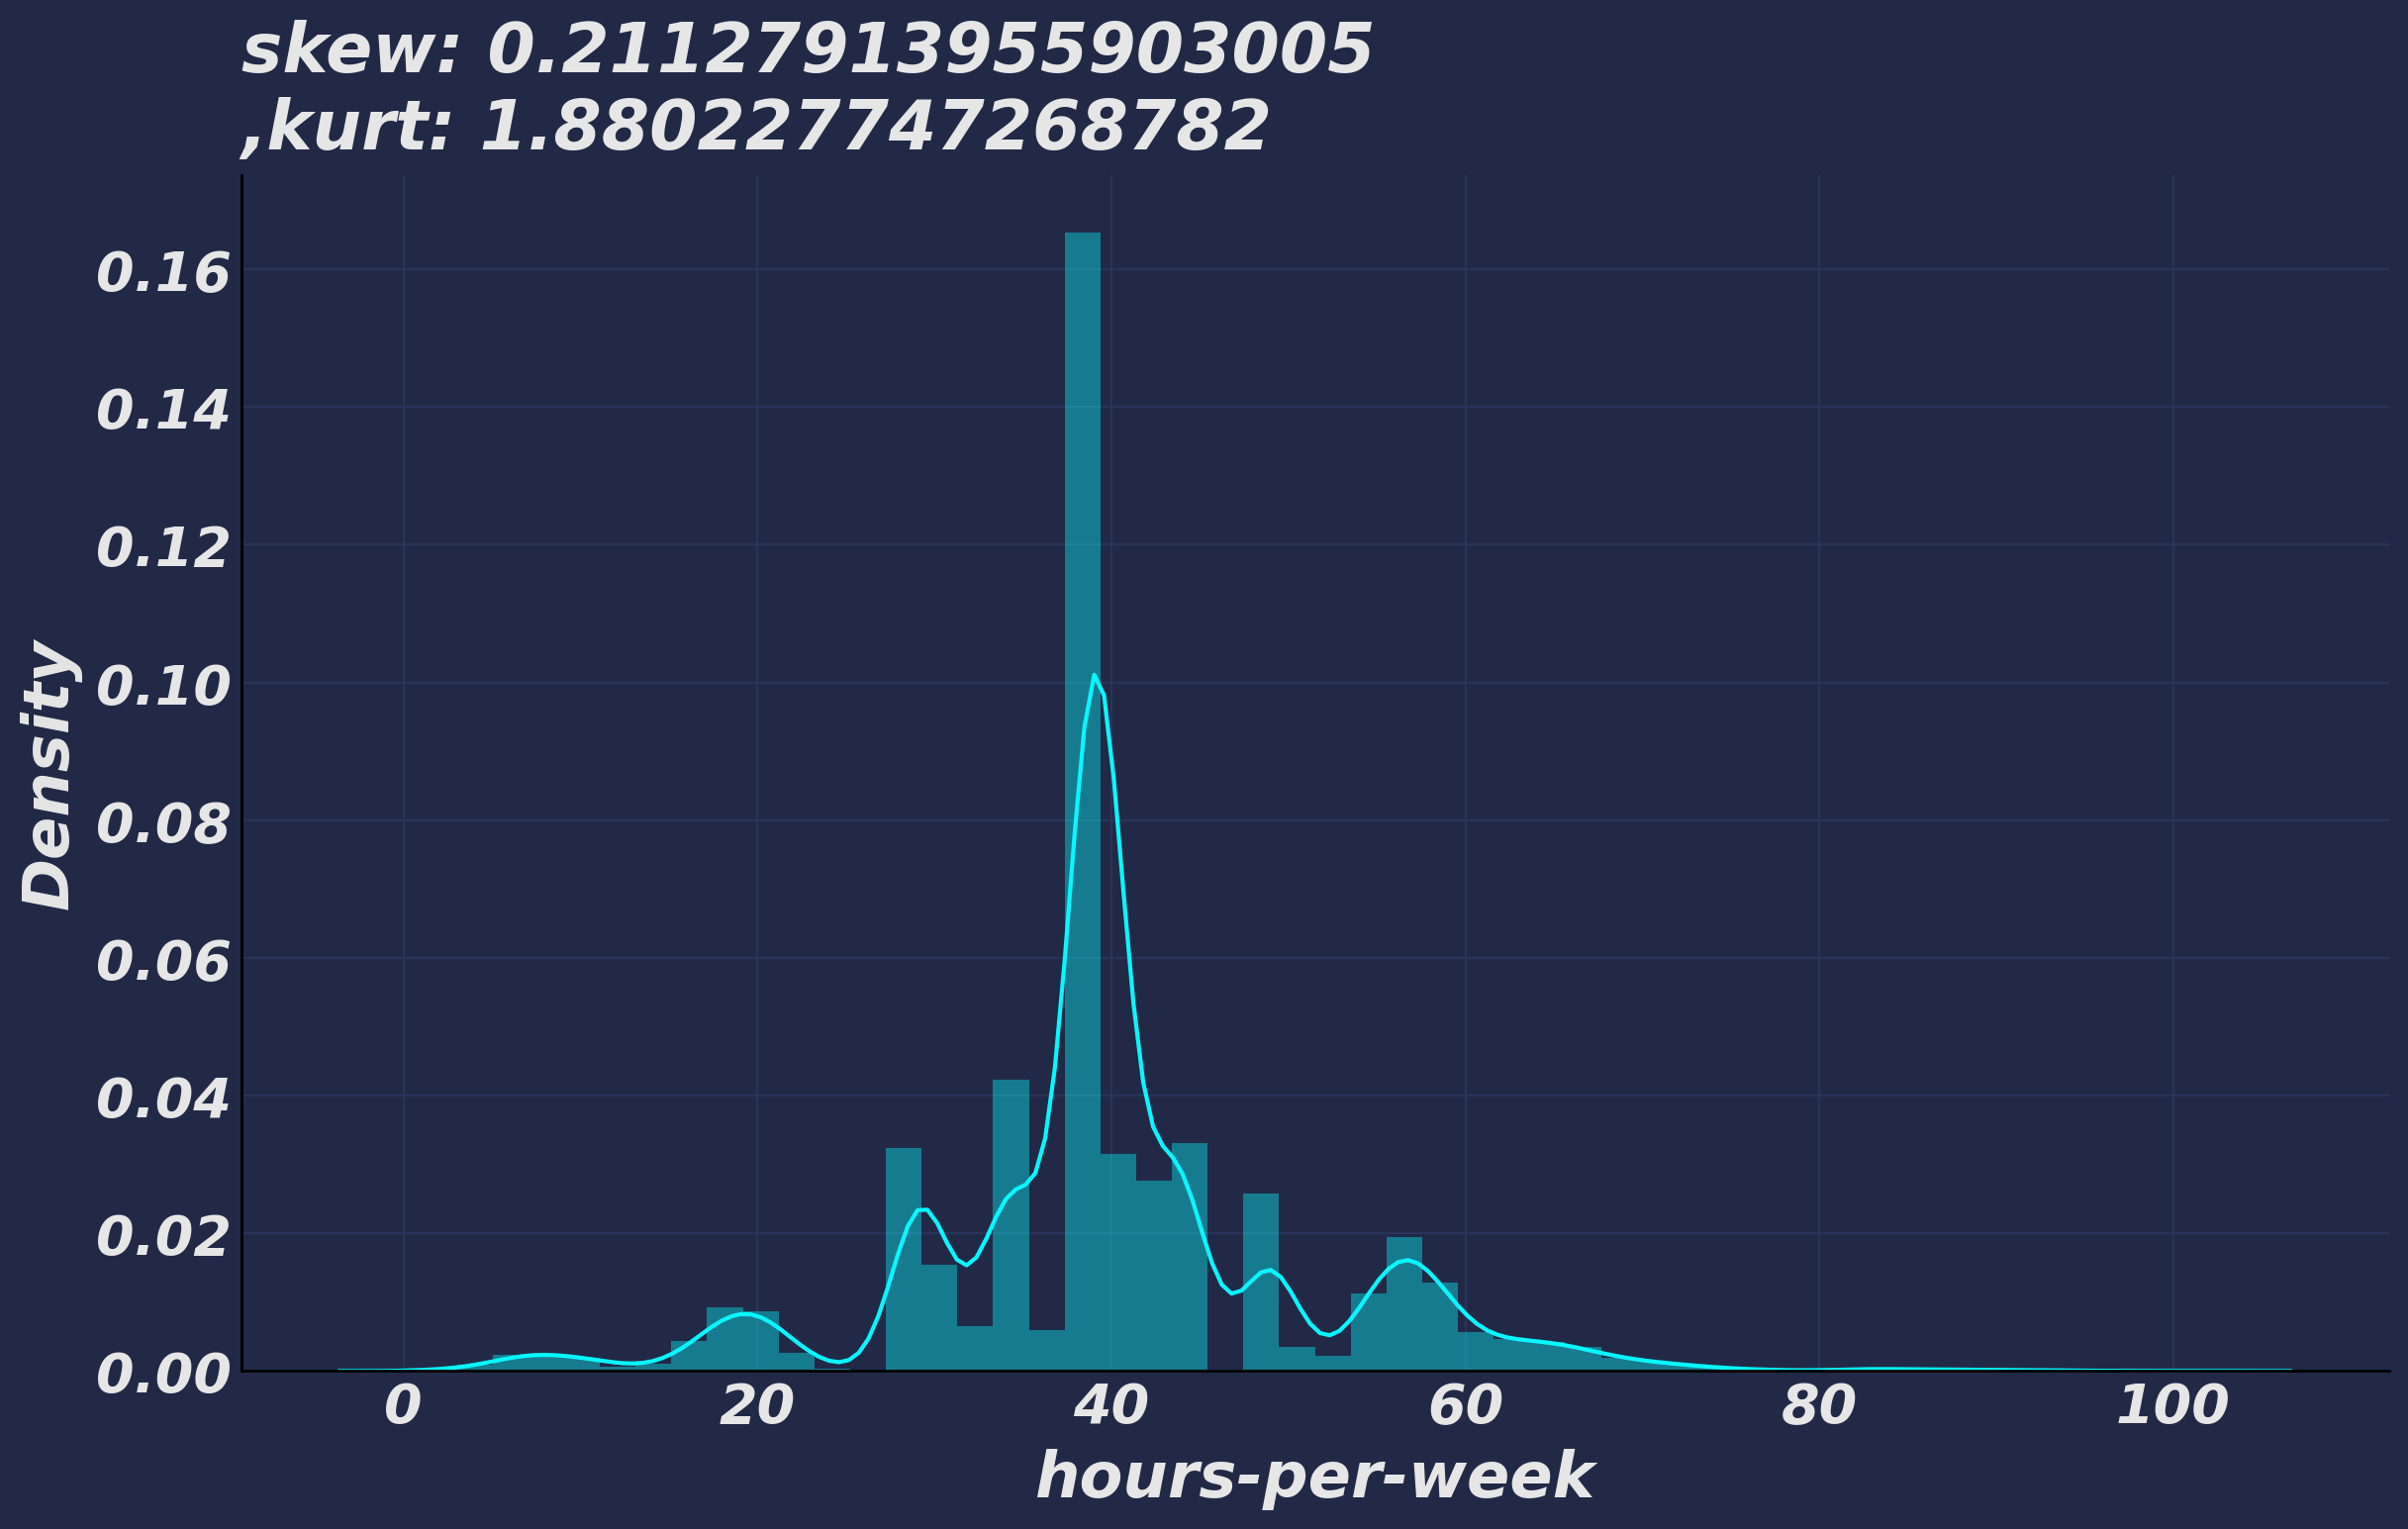

In [11]:
plt.figure(figsize=(14,8))

sns.distplot(train["hours-per-week"])
plt.title(f"skew: {train['hours-per-week'].skew()}\n,
          kurt: {train['hours-per-week'].kurt()}") 

In [4]:
cater = train.select_dtypes(exclude="number")
numer = train.select_dtypes("number") 

In [ ]:
#categorical features

In [9]:
cater.describe()

workclass education       marital-status     occupation relationship  \
count      18944     18944                18944          18944        18944   
unique         8        16                    7             14            6   
top      Private   HS-grad   Married-civ-spouse   Adm-clerical      Husband   
freq       11700      5462                 8311           3957         7164   

          race    sex  native-country  income  
count    18944  18944           18944   18944  
unique       5      2              41       2  
top      White   Male   United-States   <=50K  
freq     12682  10727           16000   13517

In [5]:
#hapus white-space di columns
for i in cater.columns:
    train[i] = train[i].str.strip()
    test[i] = test[i].str.strip() 

In [14]:
for i in cater.columns:
    print(f"columns: {i}") 
    print(f"jumlah nilai unique: {train[i].nunique()}") 
    print(f"=> {train[i].unique()}\n") 

columns: workclass
jumlah nilai unique: 8
=> ['Private' 'Self-emp-not-inc' 'State-gov' 'Self-emp-inc' 'Federal-gov'
 'Local-gov' 'Never-worked' 'Without-pay']

columns: education
jumlah nilai unique: 16
=> ['HS-grad' 'Bachelors' 'Masters' 'Some-college' '7th-8th' 'Doctorate'
 'Prof-school' 'Assoc-voc' 'Assoc-acdm' '5th-6th' '11th' '9th' '1st-4th'
 '12th' '10th' 'Preschool']

columns: marital-status
jumlah nilai unique: 7
=> ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Widowed' 'Married-AF-spouse']

columns: occupation
jumlah nilai unique: 14
=> ['Other-service' 'Sales' 'Transport-moving' 'Prof-specialty'
 'Exec-managerial' 'Adm-clerical' 'Handlers-cleaners' 'Farming-fishing'
 'Craft-repair' 'Protective-serv' 'Machine-op-inspct' 'Tech-support'
 'Priv-house-serv' 'Armed-Forces']

columns: relationship
jumlah nilai unique: 6
=> ['Unmarried' 'Husband' 'Not-in-family' 'Own-child' 'Wife' 'Other-relative']

columns: race
jumlah nilai unique: 5
=> ['Wh

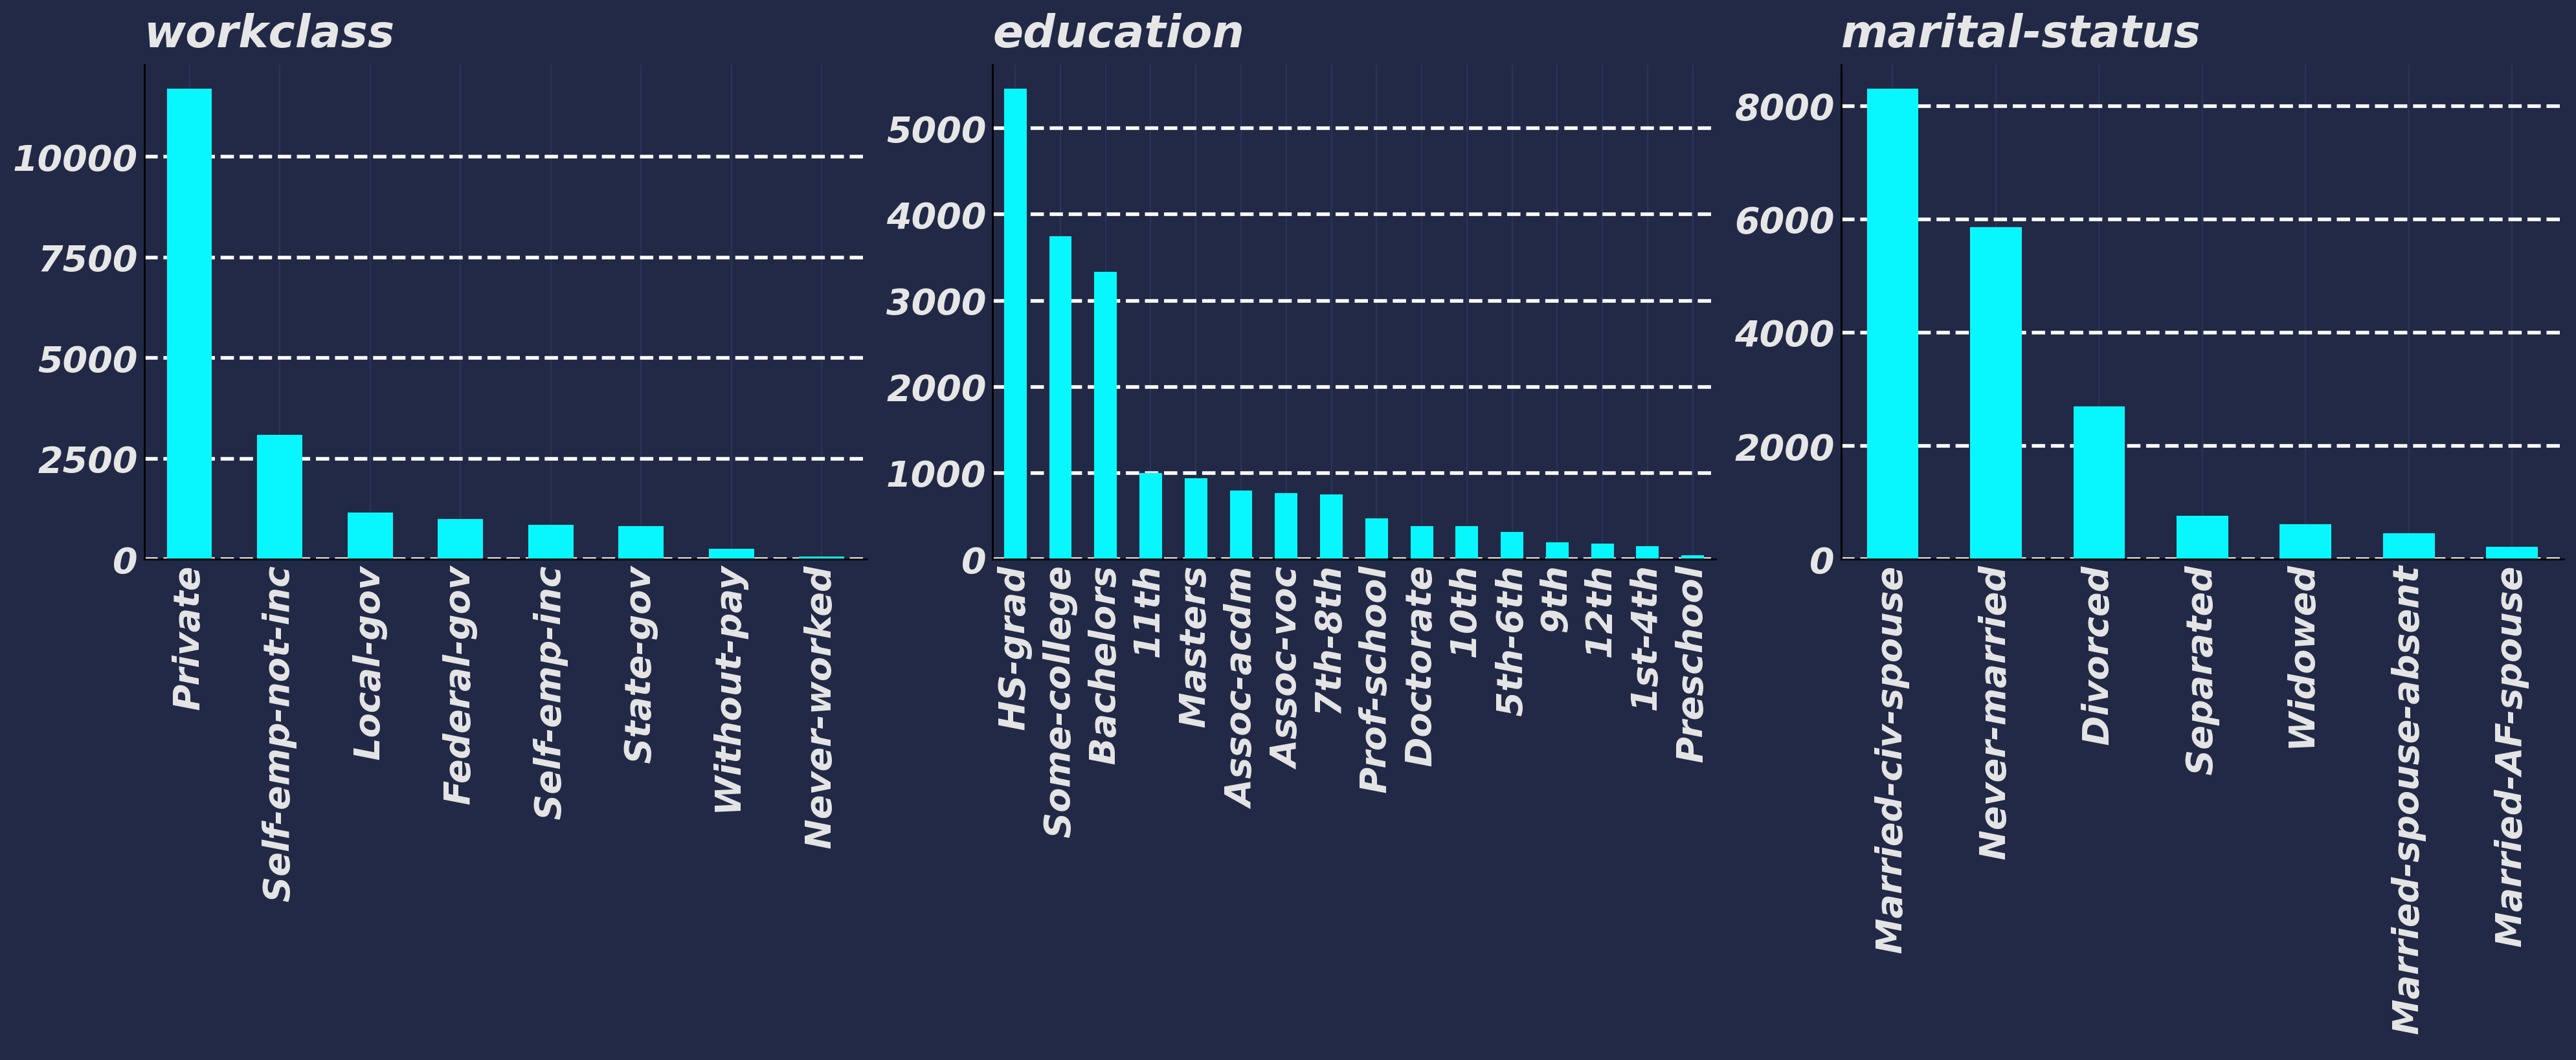

In [50]:
plt.figure(figsize=(20,20))
for i,j in enumerate(cater.iloc[:,:3].columns):
    plt.subplot(3,3,i+1) 
    
    train[j].value_counts().plot(kind="bar")
    plt.grid(axis="y", linestyle="--",color="white",linewidth=2)
    plt.title(j) 
    plt.tight_layout()
    
plt.show() 

In [ ]:
#workclass

In [6]:
train.workclass.value_counts()

Private             11700
Self-emp-not-inc     3089
Local-gov            1159
Federal-gov           995
Self-emp-inc          861
State-gov             819
Without-pay           258
Never-worked           63
Name: workclass, dtype: int64

In [56]:
train.groupby("workclass")["hours-per-week"].mean().to_frame() 

hours-per-week
workclass                        
 Federal-gov            40.289447
 Local-gov              40.437446
 Never-worked           41.761905
 Private                38.362821
 Self-emp-inc           46.083624
 Self-emp-not-inc       45.182907
 State-gov              39.225885
 Without-pay            39.593023

In [6]:
worklass = {"Federal-gov":"to_gov",
             "Local-gov": "to_gov", 
             "State-gov": "to_gov",
           "Self-emp-not-inc":"self_emp",
           "Self-emp-inc":"self_emp", 
           }

In [8]:
test_wc = train["workclass"].replace(worklass) 

In [9]:
train.groupby(test_wc)["hours-per-week"].describe()

count       mean        std  min   25%   50%   75%    max
workclass                                                                
Never-worked     63.0  41.761905  12.423591  5.0  39.0  39.0  43.5   67.0
Private       11700.0  38.362821   9.782771  1.0  34.0  39.0  40.0   93.0
Without-pay     258.0  39.593023  13.612804  4.0  35.0  39.0  44.0   94.0
self_emp       3950.0  45.379241  13.633427  2.0  39.0  44.0  56.0  102.0
to_gov         2973.0  40.054154   9.842096  3.0  36.0  39.0  43.0   90.0

Text(0.0, 1.0, '(rate)hours-per-week by work_class')

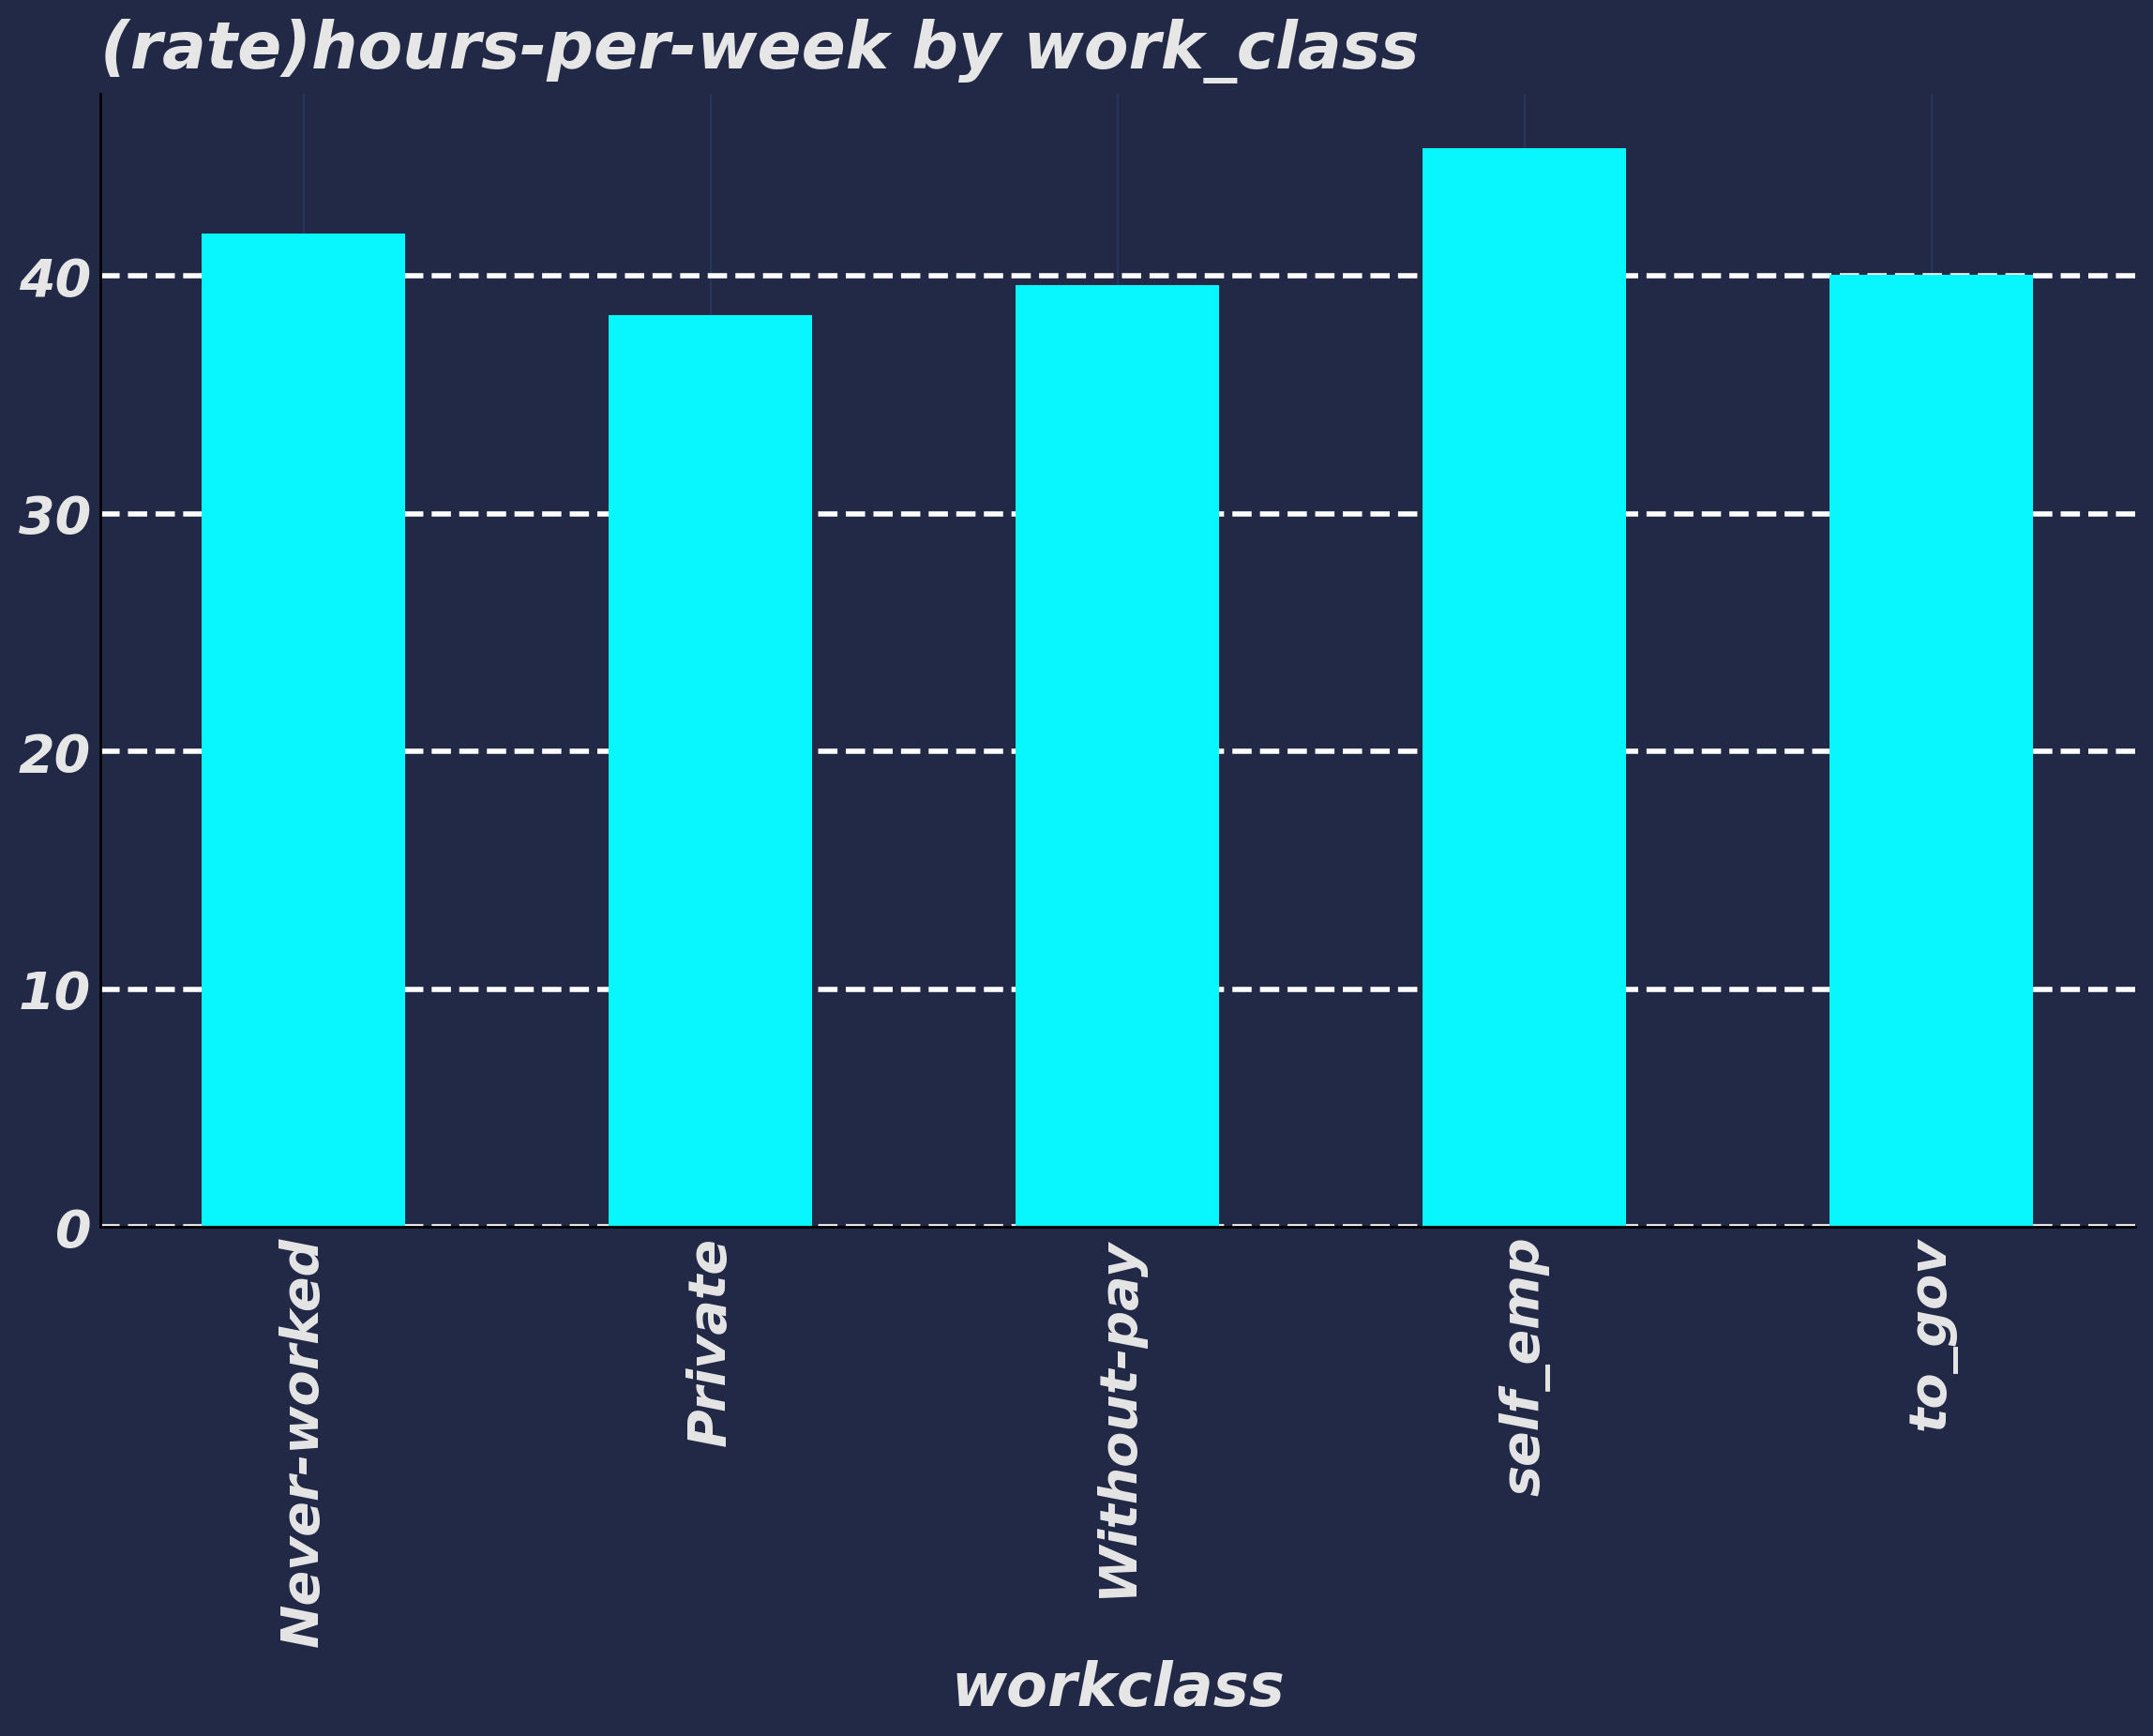

In [10]:
plt.figure(figsize=(14,8))
train.groupby(test_wc)["hours-per-week"].mean().plot(kind="bar")
plt.grid(axis="y", linestyle="--", color="white",linewidth=2) 
plt.title("(rate)hours-per-week by work_class") 

In [7]:
for i in [train,test]:
    i["workclass"] = i["workclass"].replace(worklass) 

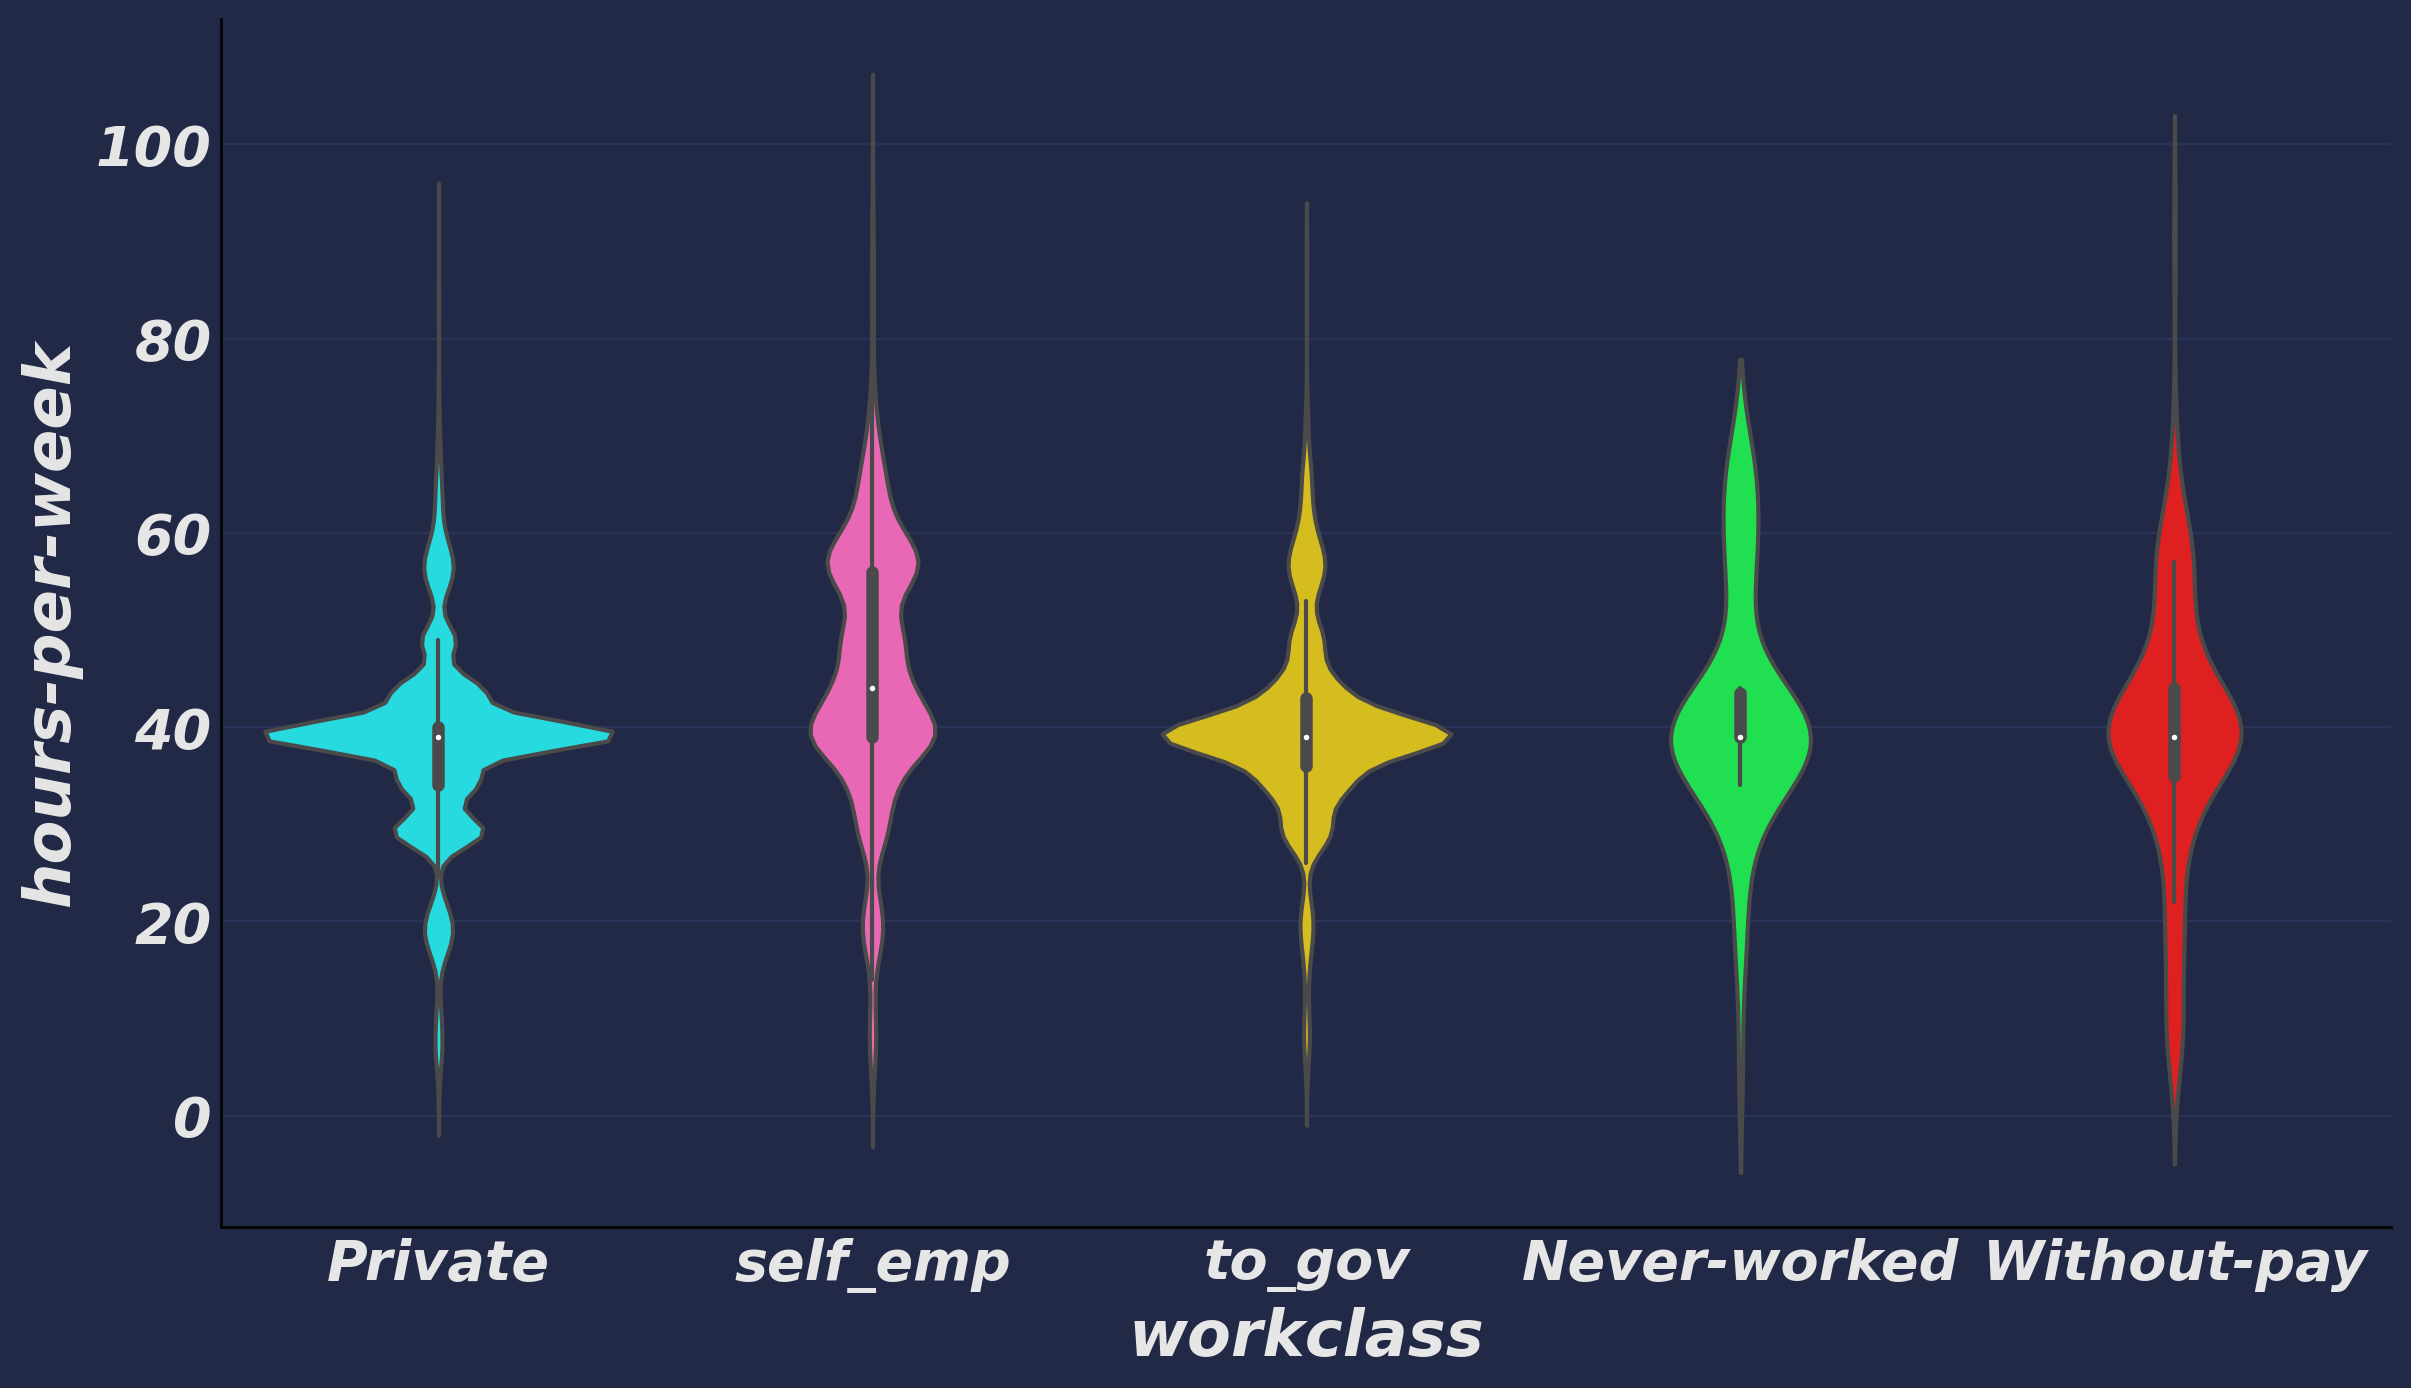

In [12]:
plt.figure(figsize=(14,8))
sns.violinplot(x=train["workclass"],y=train["hours-per-week"])

In [ ]:
#education

In [54]:
train.education.value_counts()

HS-grad         5462
Some-college    3745
Bachelors       3337
11th            1000
Masters          941
Assoc-acdm       796
Assoc-voc        769
7th-8th          750
Prof-school      476
Doctorate        387
10th             386
5th-6th          319
9th              200
12th             184
1st-4th          148
Preschool         44
Name: education, dtype: int64

In [47]:
train.groupby("education")["education-num"].describe() 

count       mean       std  min   25%   50%   75%   max
education                                                             
10th           386.0   6.414508  2.560275  3.0   5.0   6.0   6.0  15.0
11th          1000.0   6.796000  1.644107  2.0   6.0   7.0   7.0  15.0
12th           184.0   7.739130  3.049212  3.0   7.0   7.0   9.0  15.0
1st-4th        148.0   4.709459  3.490031  2.0   3.0   3.0   5.0  15.0
5th-6th        319.0   4.147335  2.715015  2.0   3.0   3.0   3.0  15.0
7th-8th        750.0   4.176000  2.474103  2.0   3.0   3.0   4.0  15.0
9th            200.0   5.095000  2.971553  2.0   3.0   4.0   5.0  15.0
Assoc-acdm     796.0  11.131910  1.565810  2.0  11.0  11.0  12.0  15.0
Assoc-voc      769.0  10.113134  1.599625  3.0  10.0  10.0  11.0  15.0
Bachelors     3337.0  12.032065  1.135799  3.0  12.0  12.0  12.0  15.0
Doctorate      387.0  14.098191  3.051488  3.0  15.0  15.0  16.0  16.0
HS-grad       5462.0   8.509703  0.933711  3.0   8.0   8.0   9.0  15.0
Masters        941.0  12.803401  2.152838  2.0  13.0  13.0  14.0  15.0
Preschool       44.0   7.250000  4.861453  2.0   3.0   5.0  12.0  15.0
Prof-school    476.0  13.302521  3.135682  2.0  14.0  14.0  15.0  15.0
Some-college  3745.0   9.420561  0.998746  3.0   9.0   9.0  10.0  15.0

In [8]:
edu = {"1st-4th":"1st-12th",
            "5th-6th": "1st-12th", 
            "7th-8th": "1st-12th", 
            "9th": "1st-12th", 
            "10th": "1st-12th",
            "11th": "1st-12th", 
            "12th": "1st-12th",
            "Assoc-acdm": "associates",
            "Assoc-voc": "associates"}
   

In [14]:
test_edu = train.education.replace(edu)

In [15]:
train.groupby(test_edu)["hours-per-week"].describe()

count       mean        std   min   25%   50%   75%    max
education                                                                
1st-12th      2987.0  37.177101  11.563467   2.0  30.0  39.0  40.0   99.0
Bachelors     3337.0  43.956248  11.338185   2.0  39.0  40.0  50.0   87.0
Doctorate      387.0  47.031008  11.833651  18.0  39.0  43.0  57.0   97.0
HS-grad       5462.0  39.008788  10.677023   4.0  34.0  39.0  40.0  102.0
Masters        941.0  43.543039   9.519829   7.0  39.0  40.0  45.0   88.0
Preschool       44.0  39.977273  10.128221  17.0  38.0  39.0  43.0   68.0
Prof-school    476.0  49.945378  11.567157  19.0  39.0  49.0  58.0   93.0
Some-college  3745.0  37.244860   9.880543   1.0  30.0  39.0  42.0   87.0
associates    1565.0  41.555272   9.102446   4.0  39.0  39.0  44.0   76.0

Text(0.0, 1.0, '(rate)hours-per-week by education')

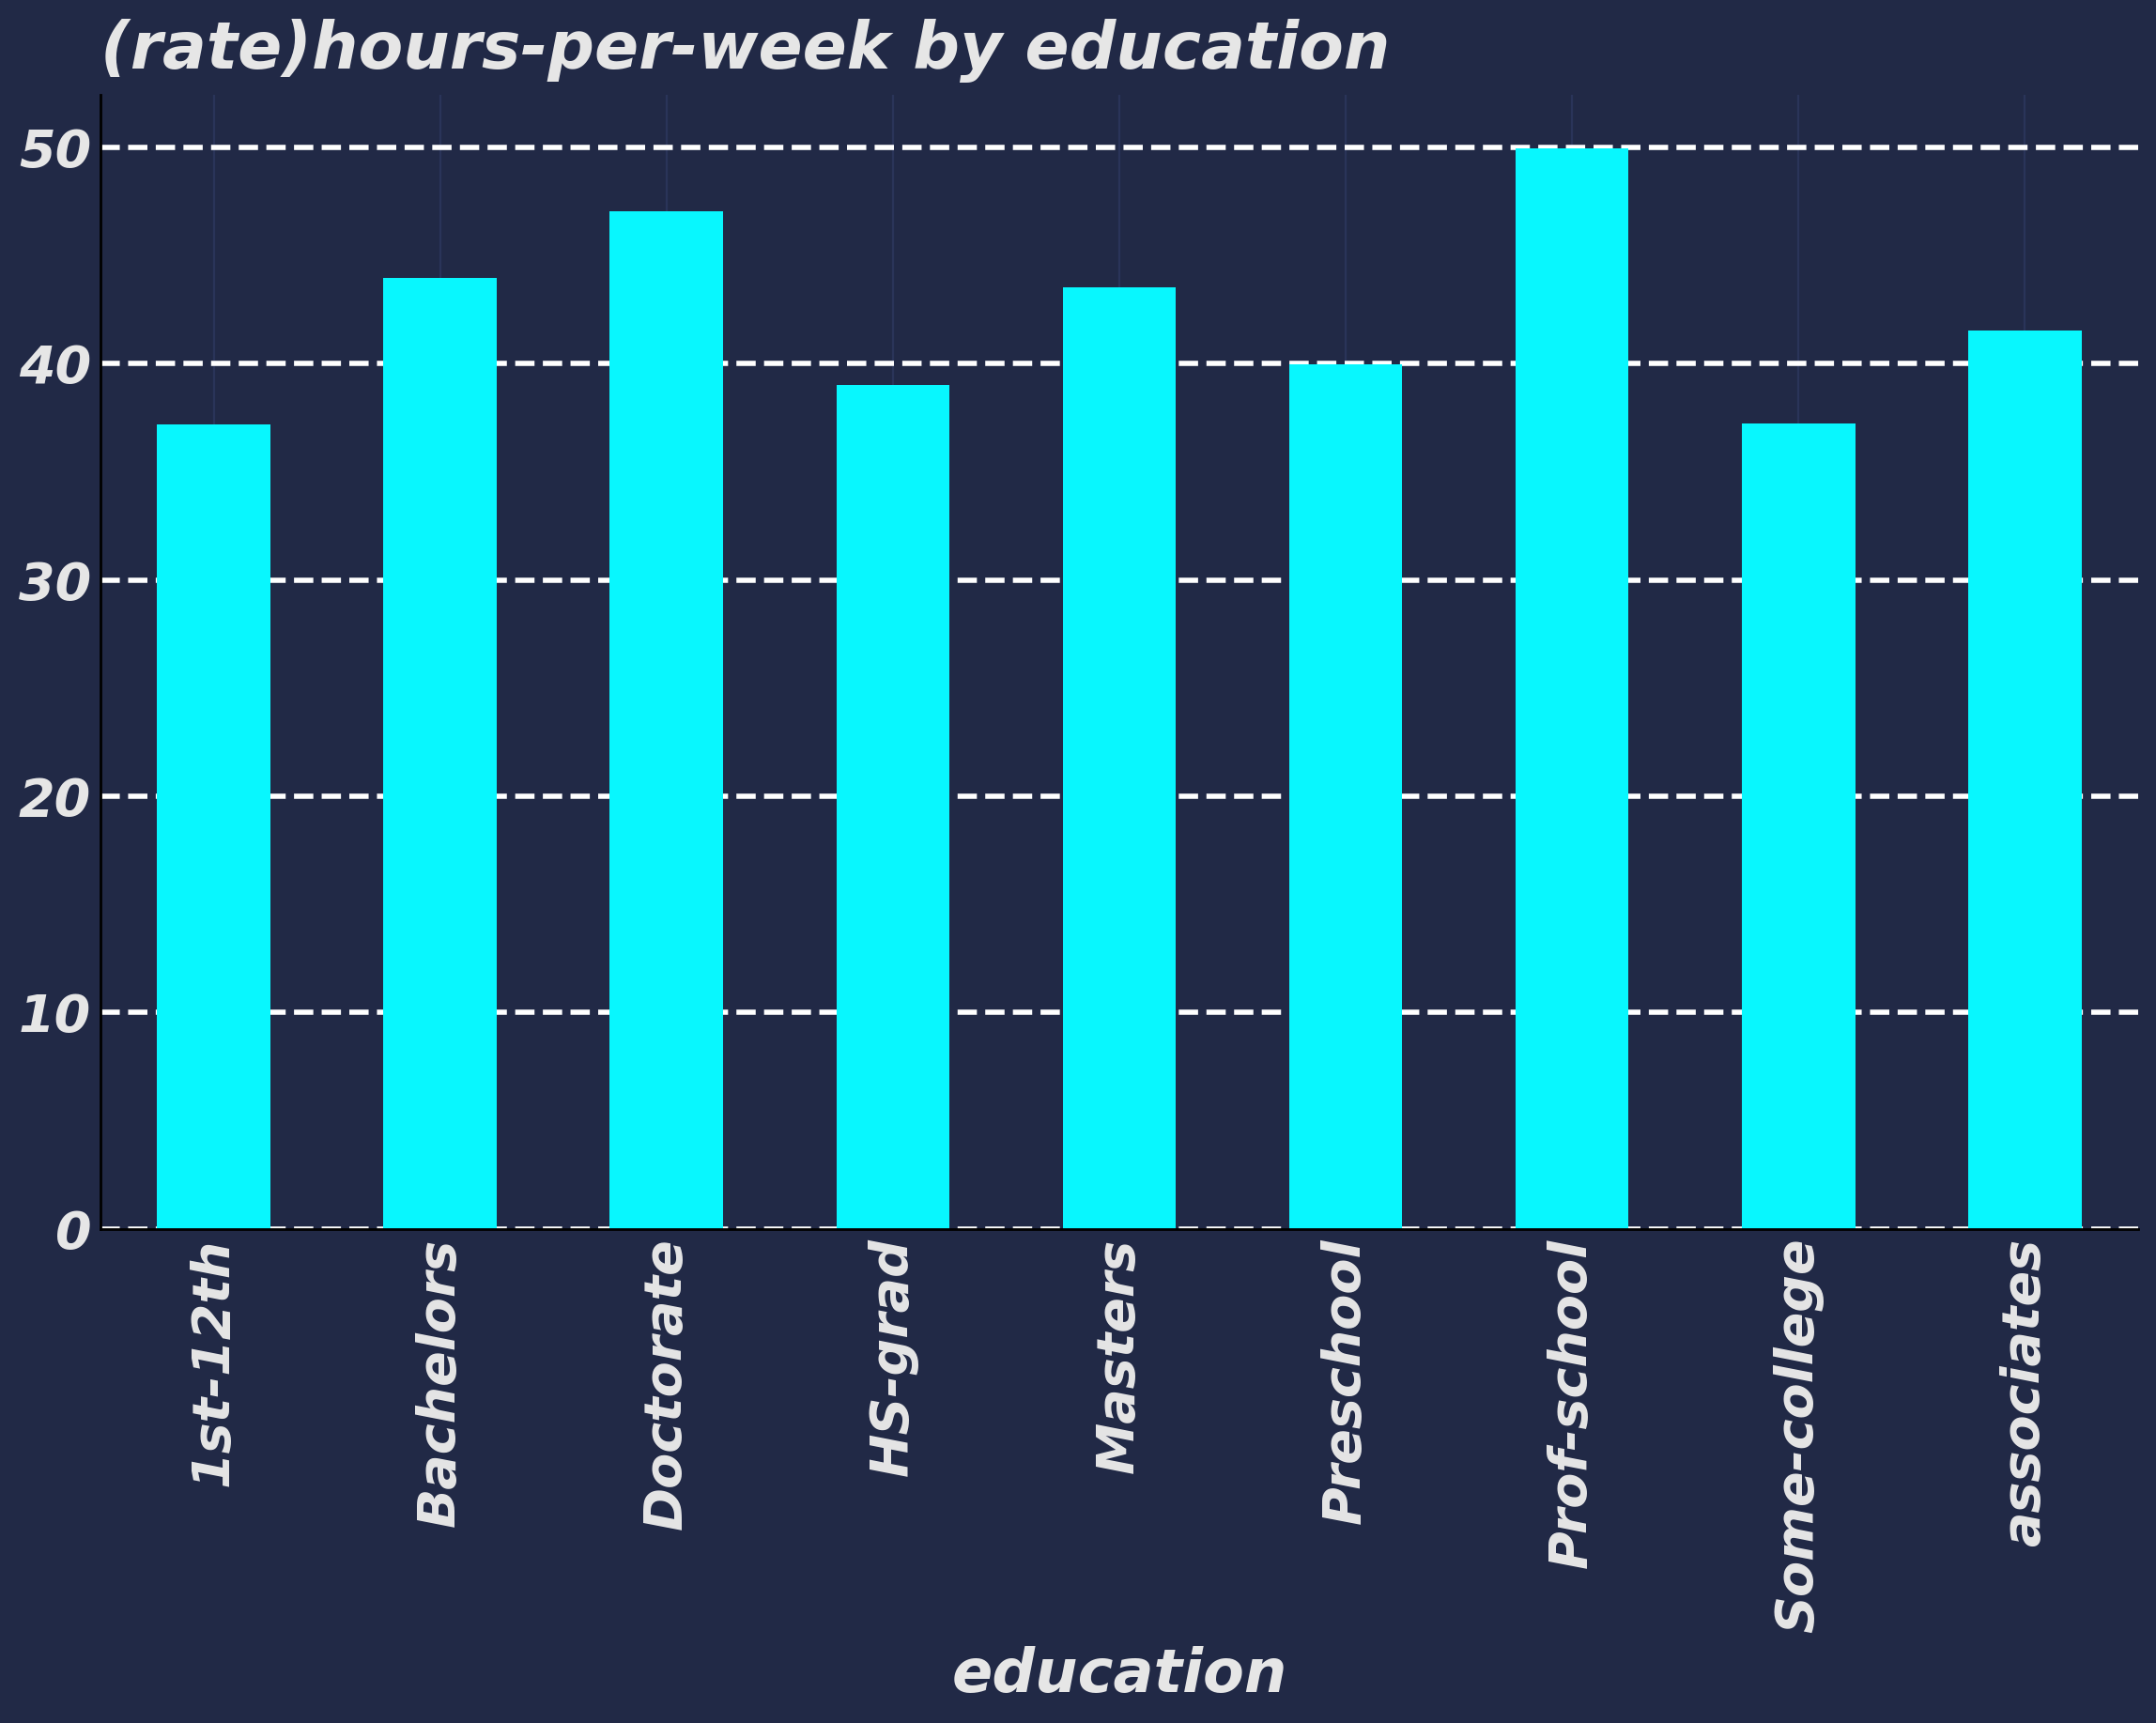

In [16]:
plt.figure(figsize=(14,8))
train.groupby(test_edu)["hours-per-week"].mean().plot(kind="bar")
plt.grid(axis="y", linestyle="--", color="white",linewidth=2) 
plt.title("(rate)hours-per-week by education") 

In [10]:
for i in [train,test]:
    i["education"] = i["education"].replace(edu) 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

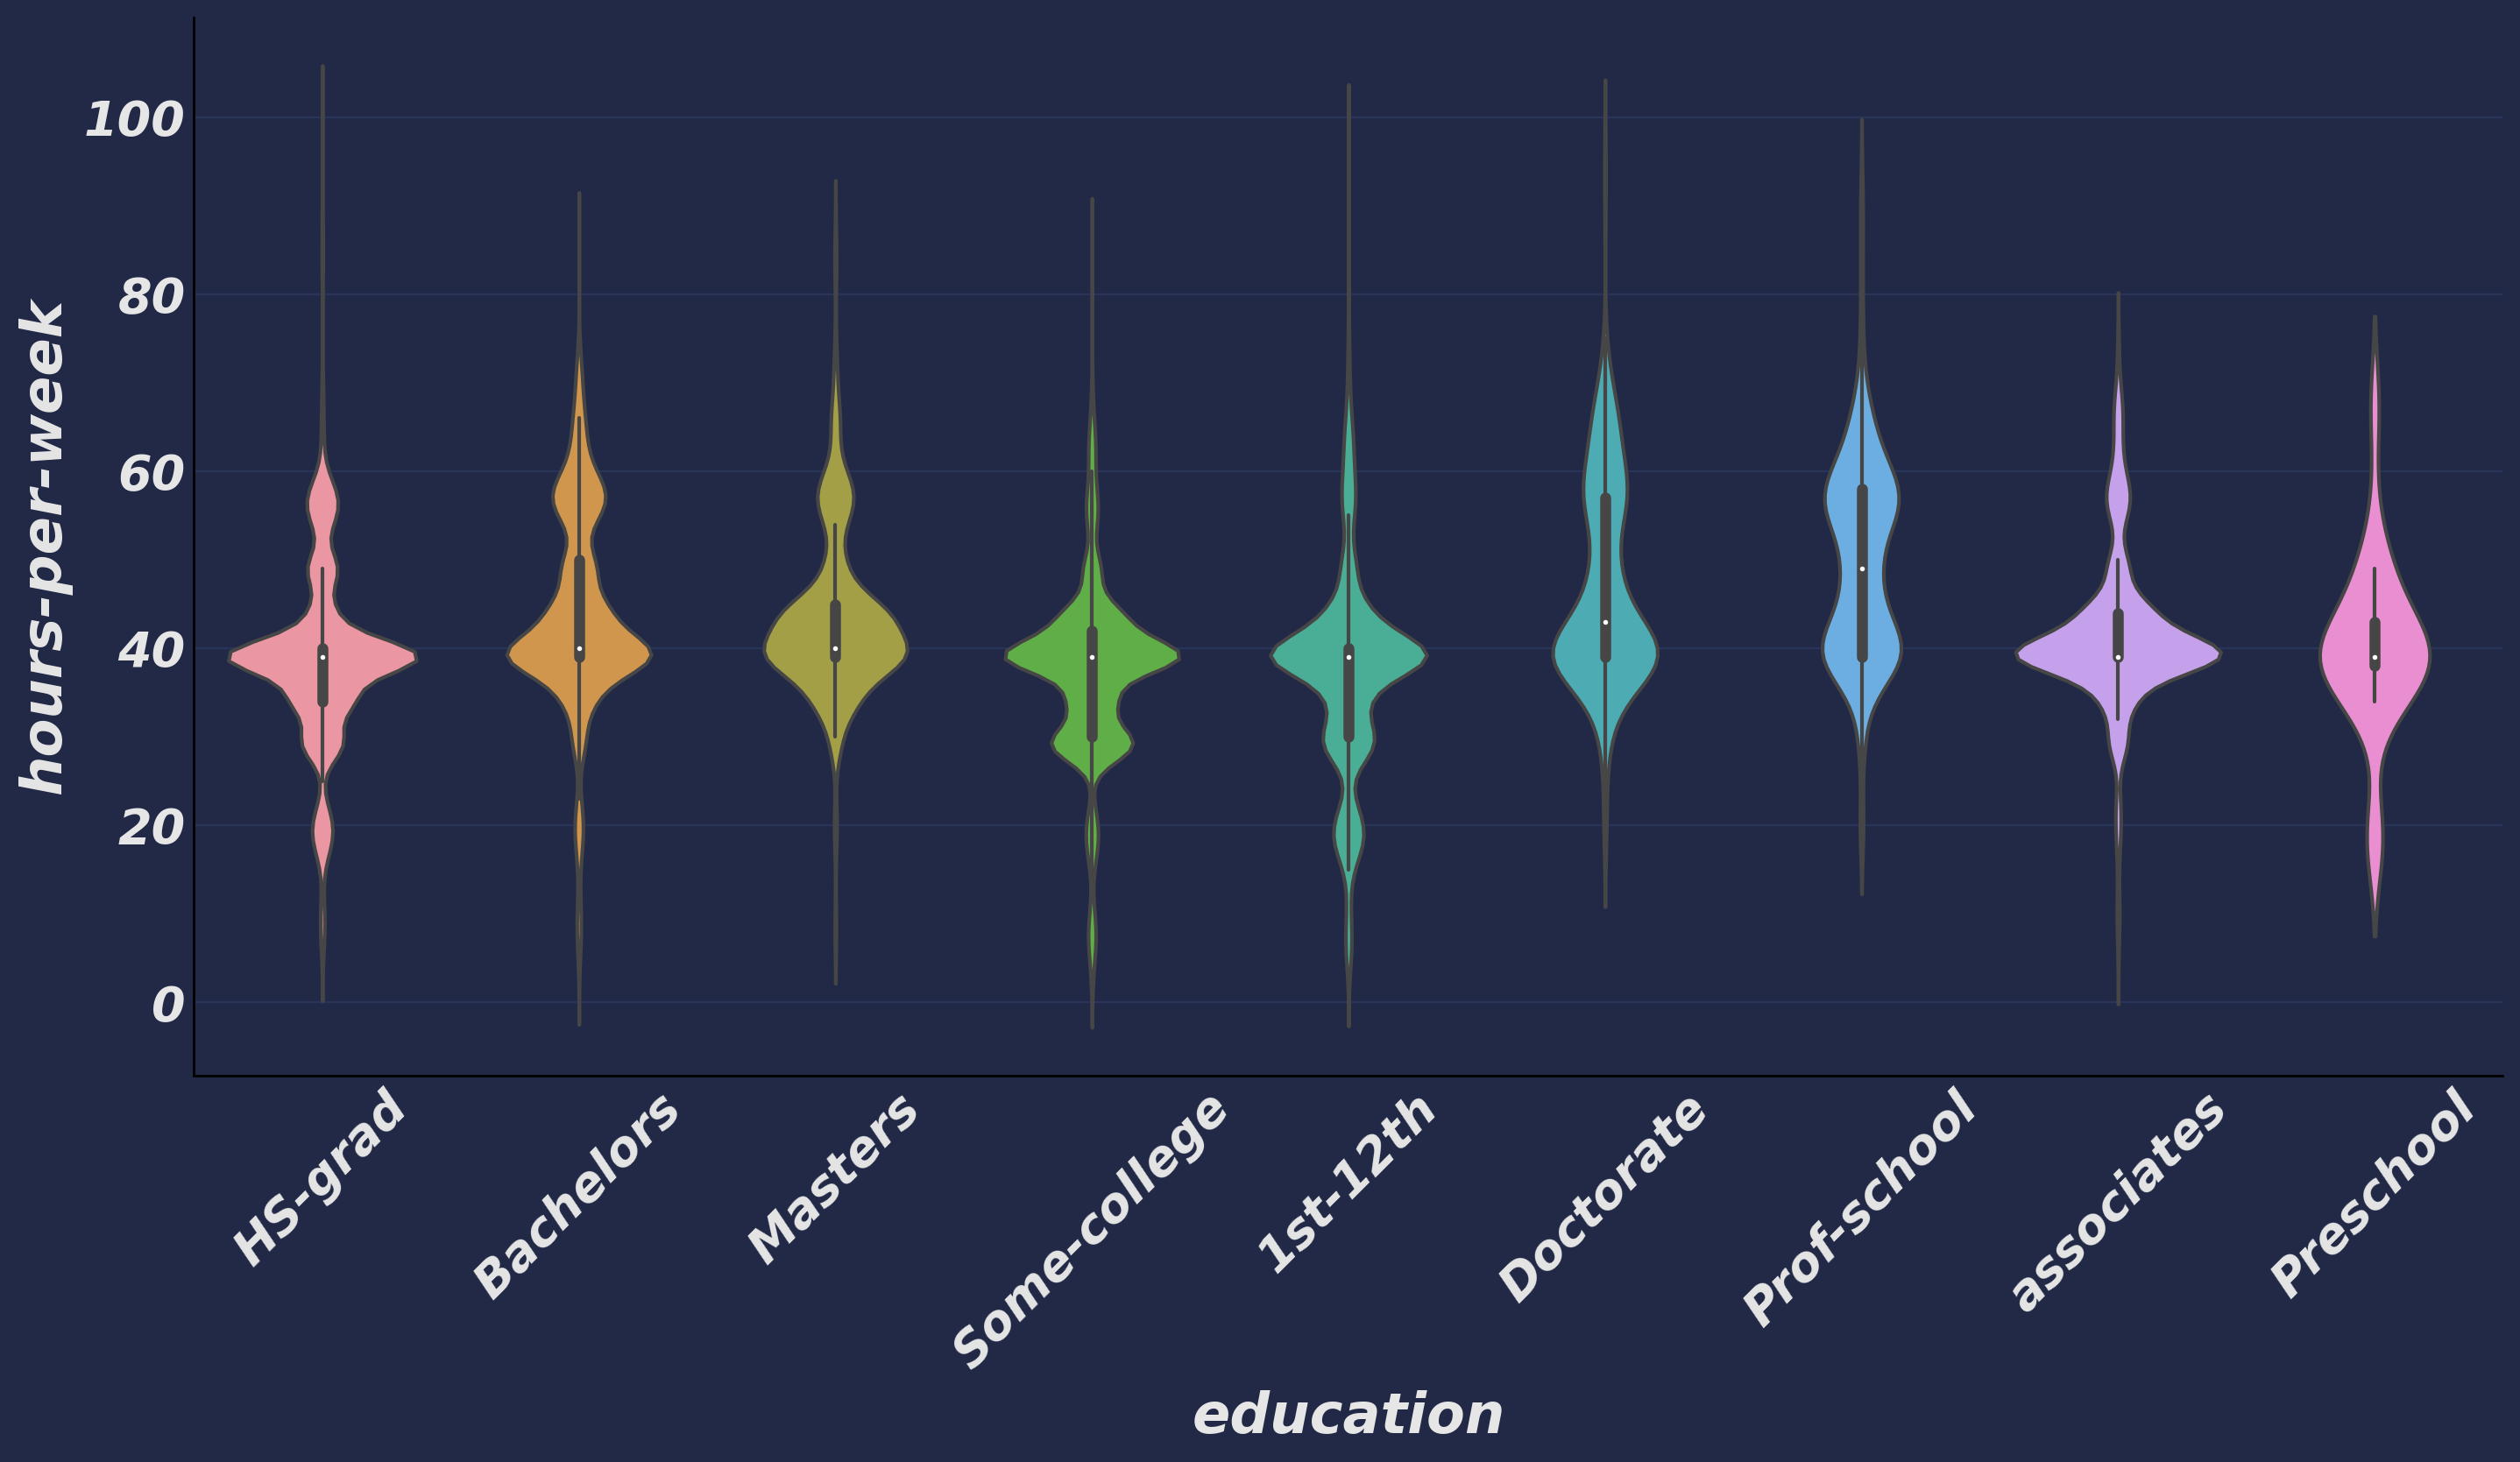

In [18]:
plt.figure(figsize=(17,8))
sns.violinplot(x=train["education"],y=train["hours-per-week"])
plt.xticks(rotation=45) 

In [ ]:
# marital status

In [19]:
train["marital-status"].value_counts() 

Married-civ-spouse       8311
Never-married            5857
Divorced                 2697
Separated                 772
Widowed                   624
Married-spouse-absent     461
Married-AF-spouse         222
Name: marital-status, dtype: int64

In [20]:
train.groupby("marital-status")["hours-per-week"].mean().to_frame() 

hours-per-week
marital-status                       
Divorced                    38.838339
Married-AF-spouse           33.180180
Married-civ-spouse          43.229936
Married-spouse-absent       39.041215
Never-married               37.618747
Separated                   37.015544
Widowed                     34.801282

In [11]:
marti = {"Married-AF-spouse": "married", 
         "Married-civ-spouse": "married", 
         "Married-spouse-absent": "not-married", 
         "Separated": "not-married",
         "Divorced": "not-married"}

In [22]:
test_marti = train["marital-status"].replace(marti)

In [23]:
train.groupby(test_marti)["hours-per-week"].describe()

count       mean        std  min   25%   50%   75%    max
marital-status                                                            
Never-married   5857.0  37.618747  11.002279  1.0  30.0  39.0  40.0   90.0
Widowed          624.0  34.801282  10.559725  4.0  29.0  36.0  39.0   69.0
married         8533.0  42.968475  11.328299  2.0  39.0  40.0  49.0  102.0
not-married     3930.0  38.504071   9.265442  3.0  35.0  39.0  40.0   92.0

Text(0.0, 1.0, '(rate)hours-per-week by marital-status')

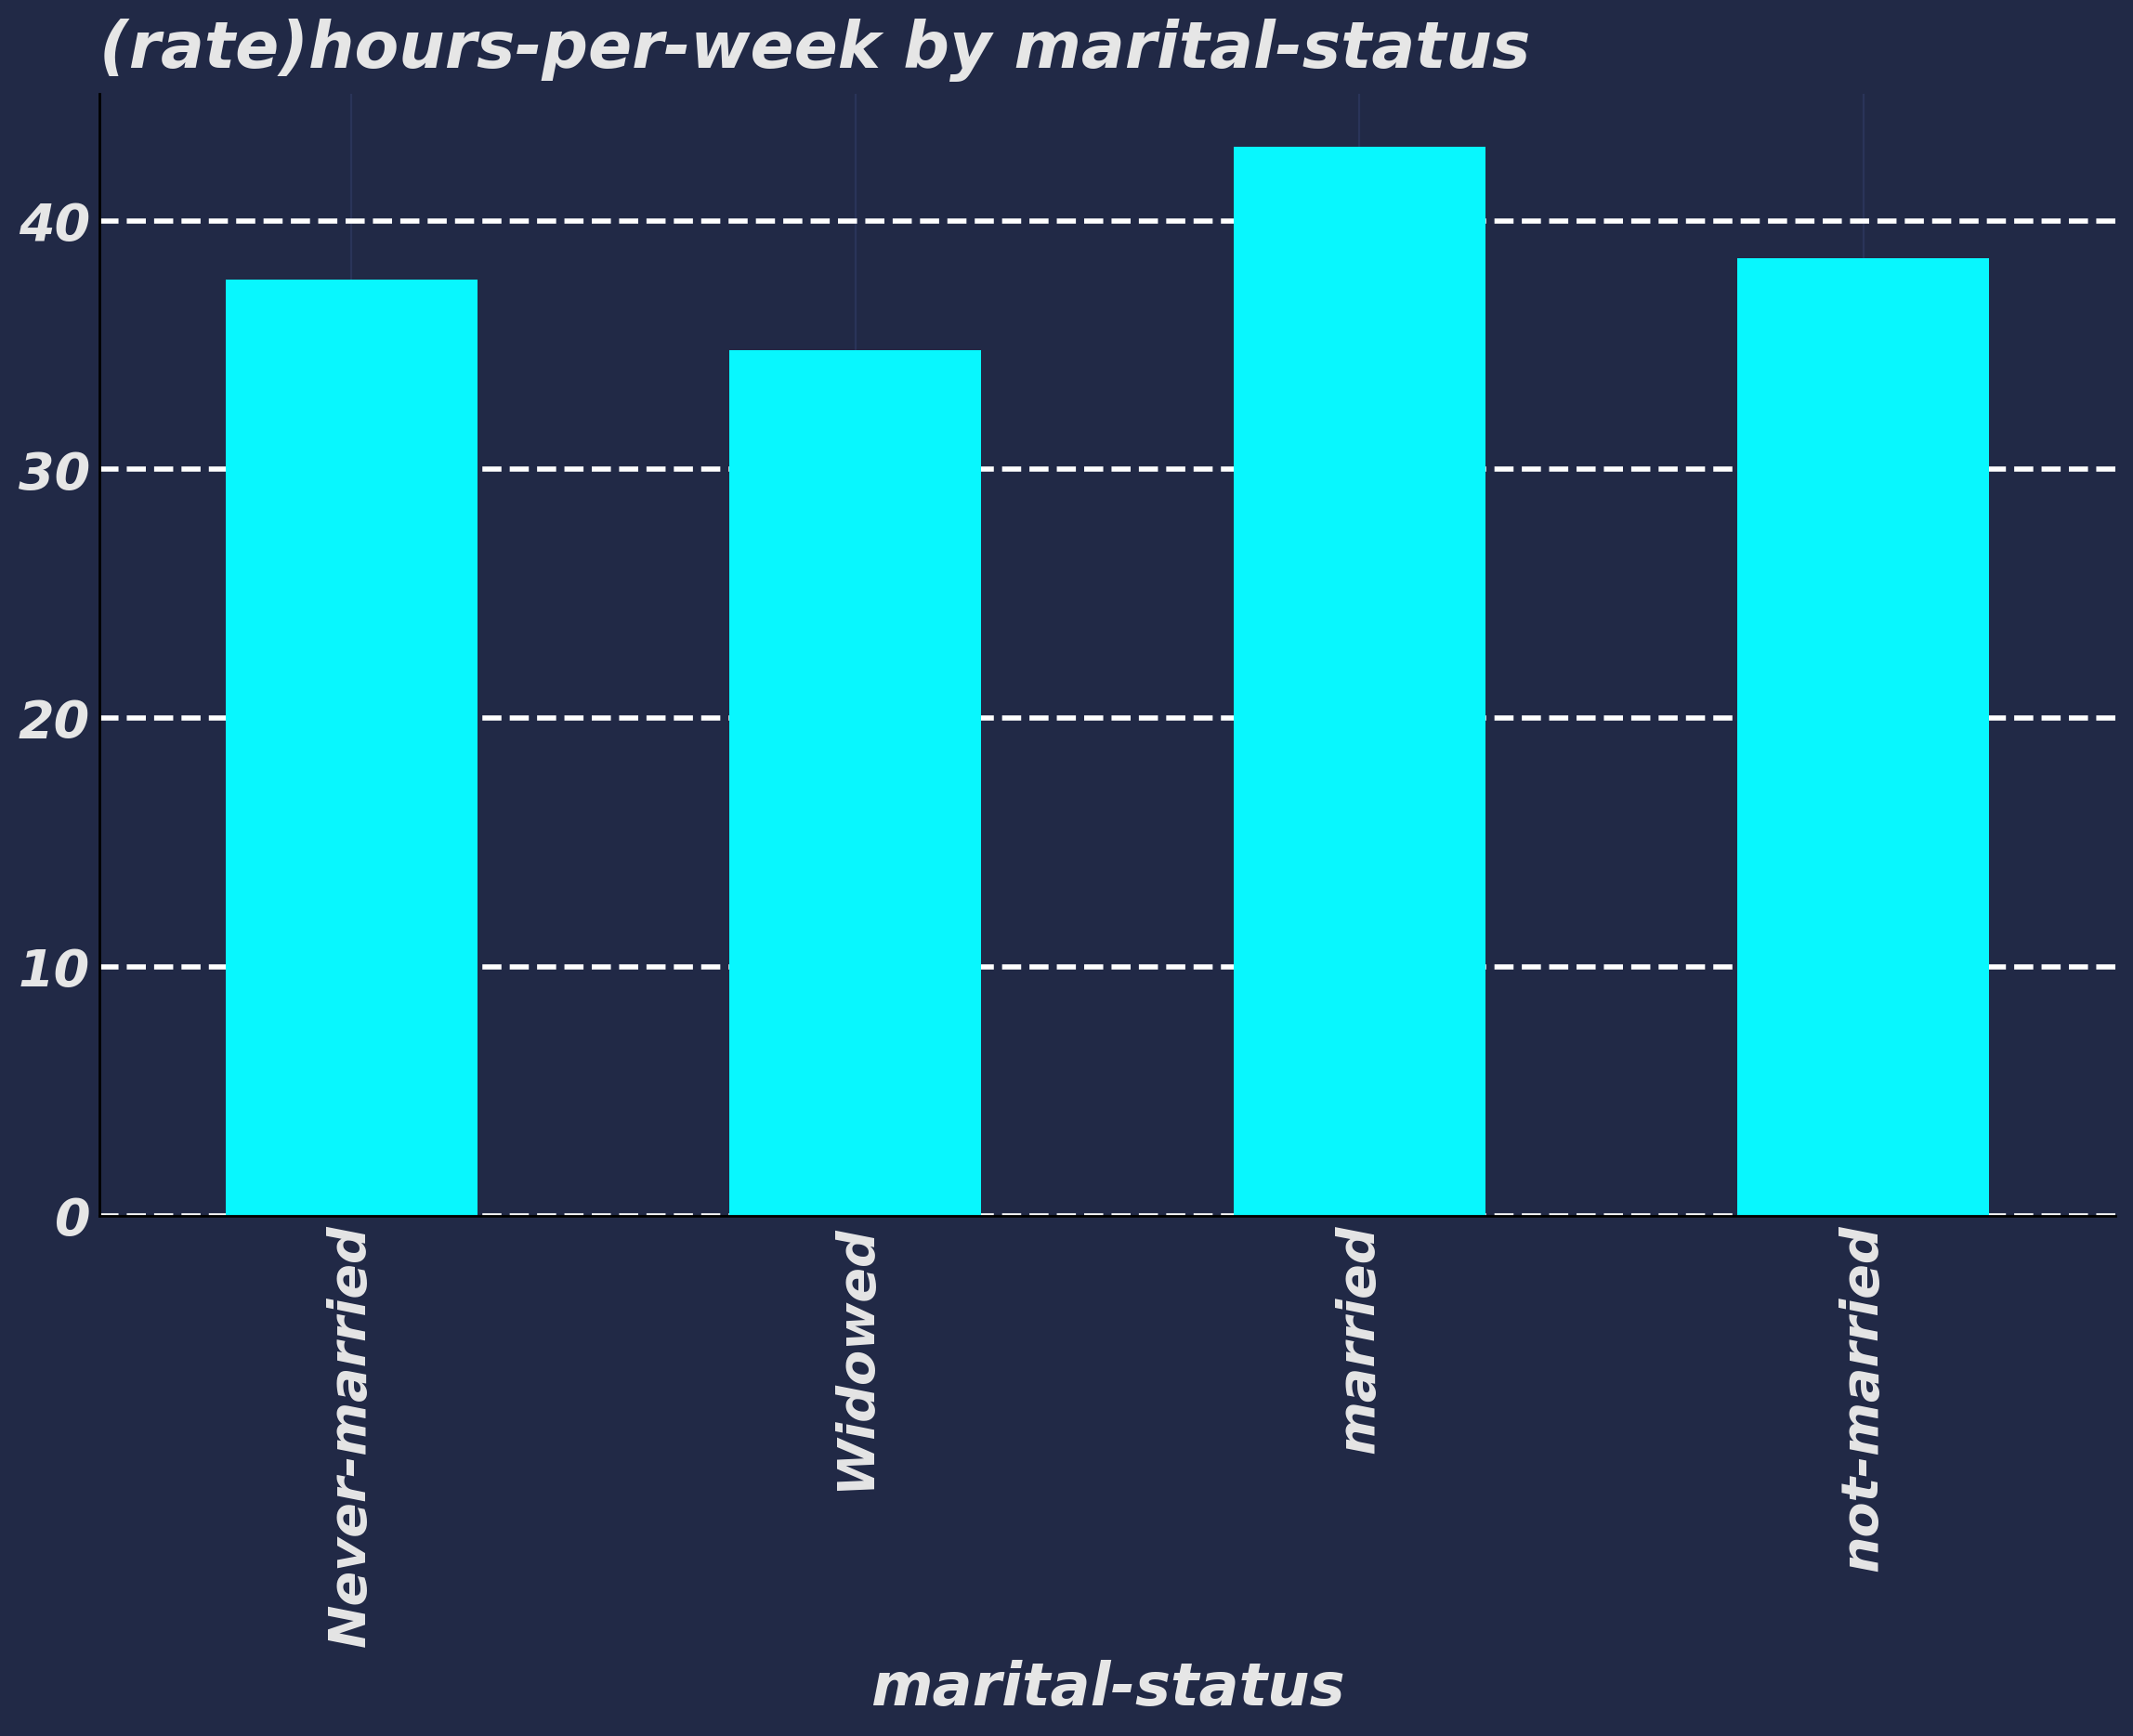

In [54]:
plt.figure(figsize=(14,8))

train.groupby(test_marti)["hours-per-week"].mean().plot(kind="bar")
plt.grid(axis="y", linestyle="--", color="white",linewidth=2) 
plt.title("(rate)hours-per-week by marital-status") 

In [12]:
for i in [train,test]:
    i["marital-status"] = i["marital-status"].replace(marti) 

In [41]:
test_marti.describe()

count       18944
unique          4
top       married
freq         8533
Name: marital-status, dtype: object

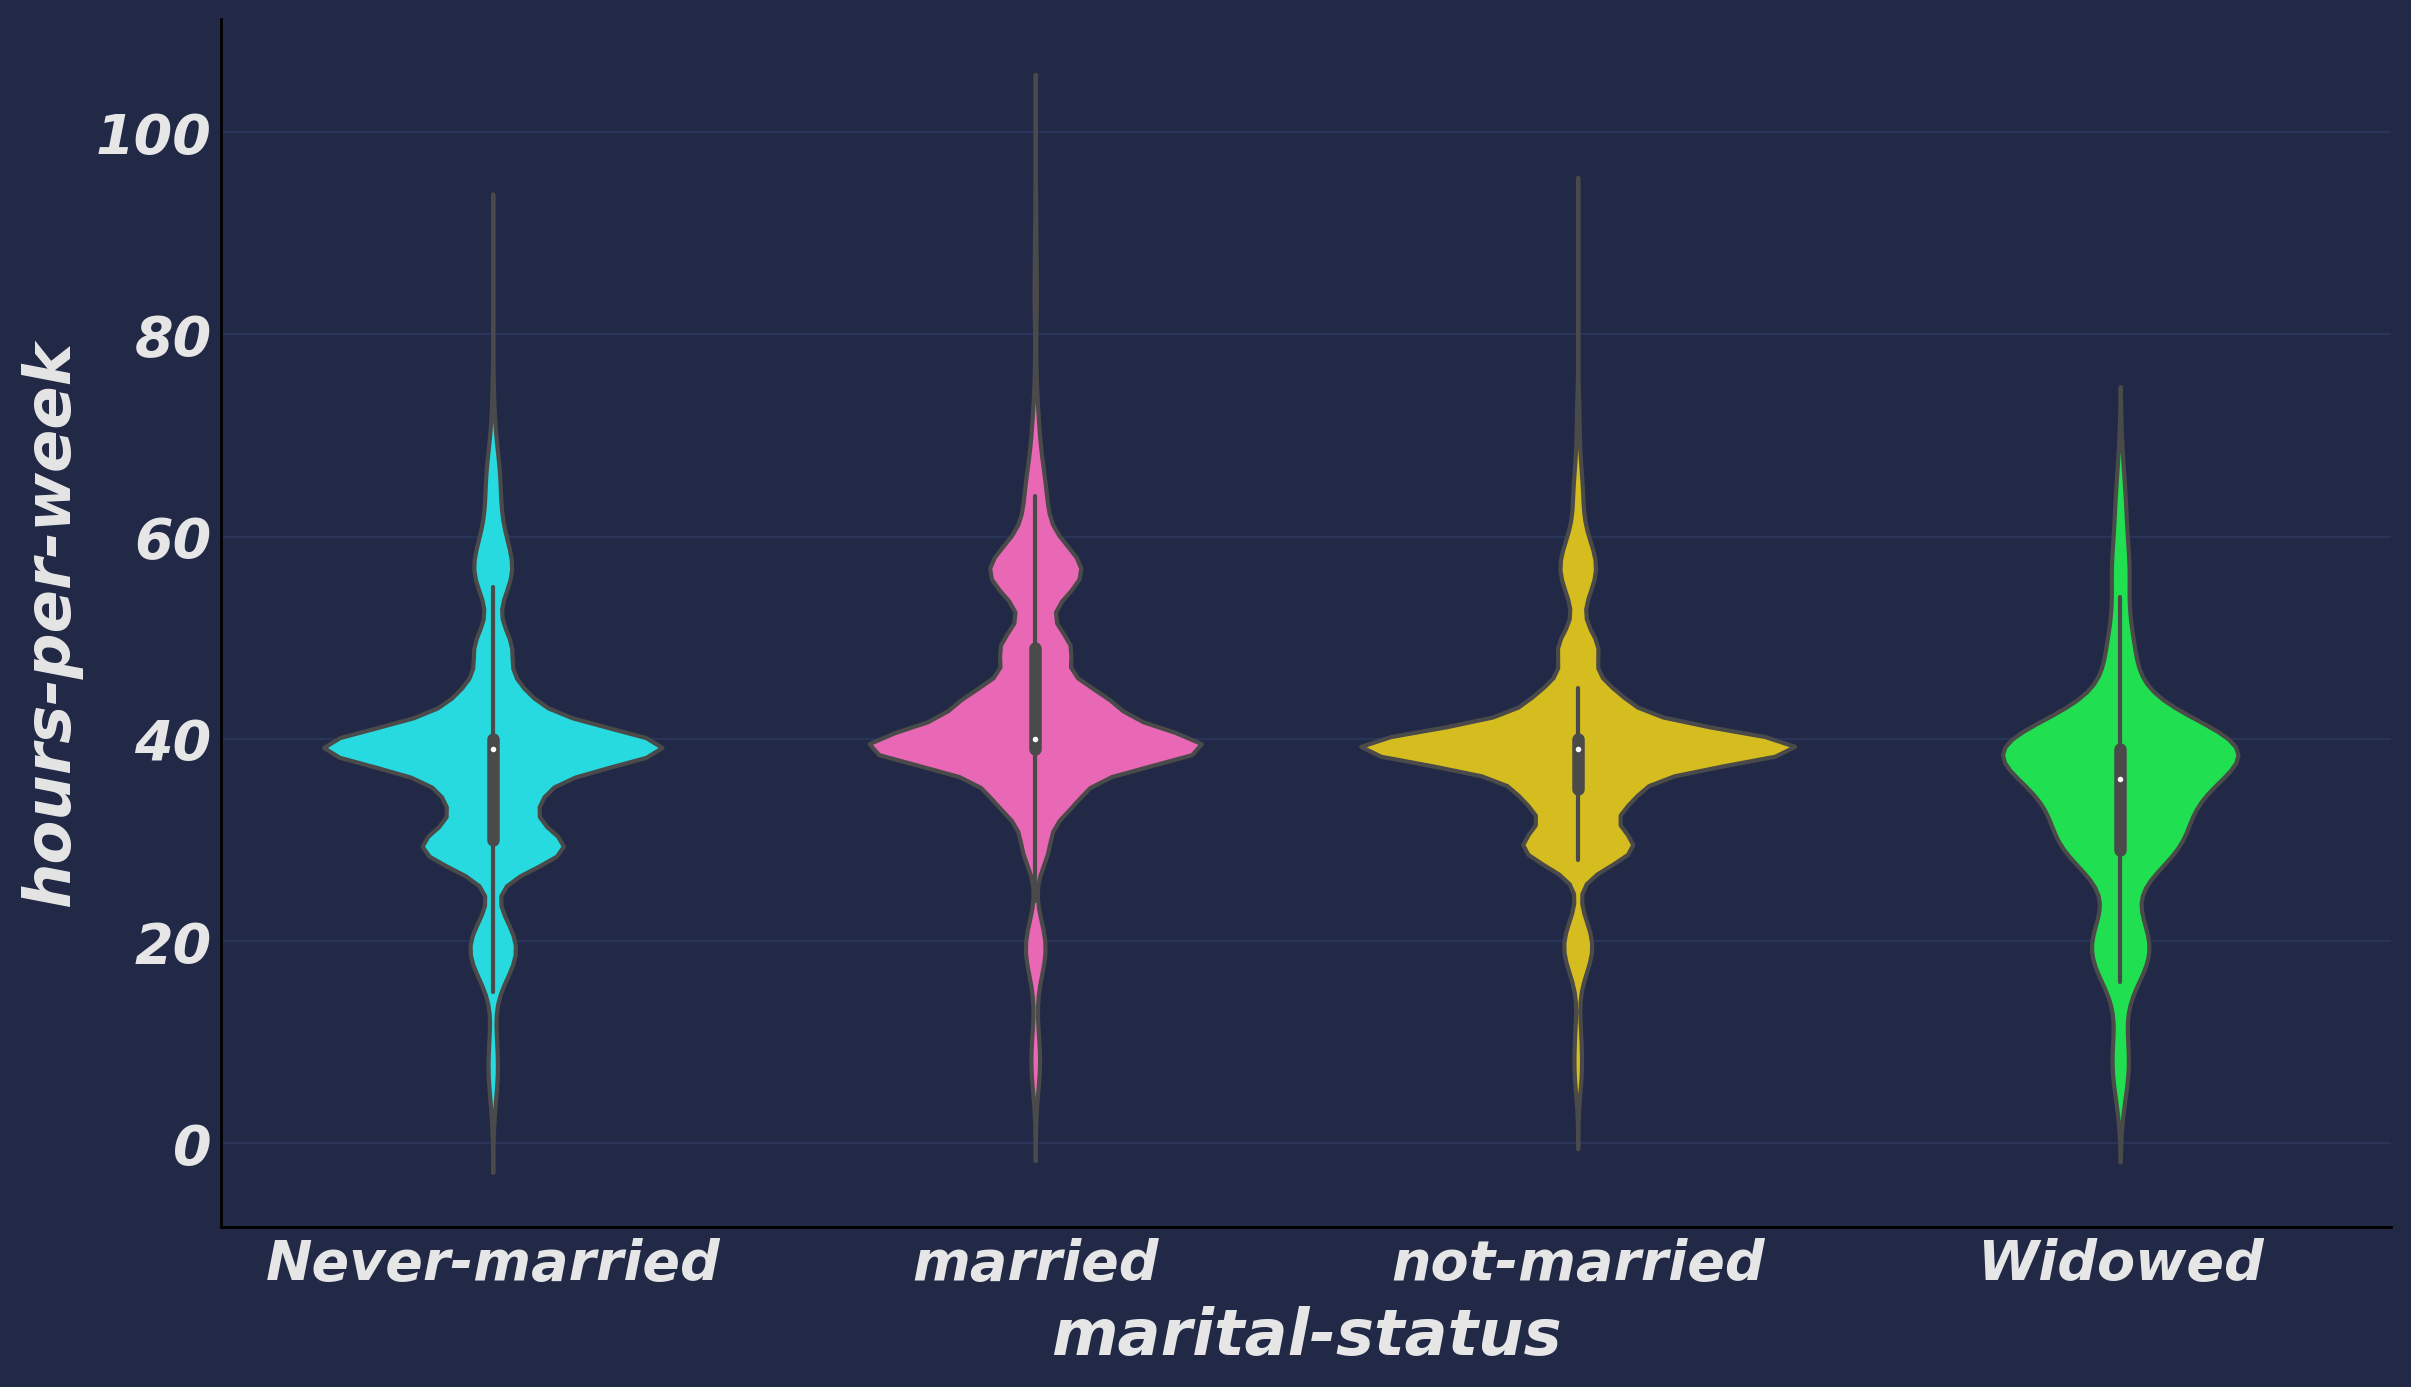

In [101]:
plt.figure(figsize=(14,8))

sns.violinplot(x = train["marital-status"], y=train["hours-per-week"]) 

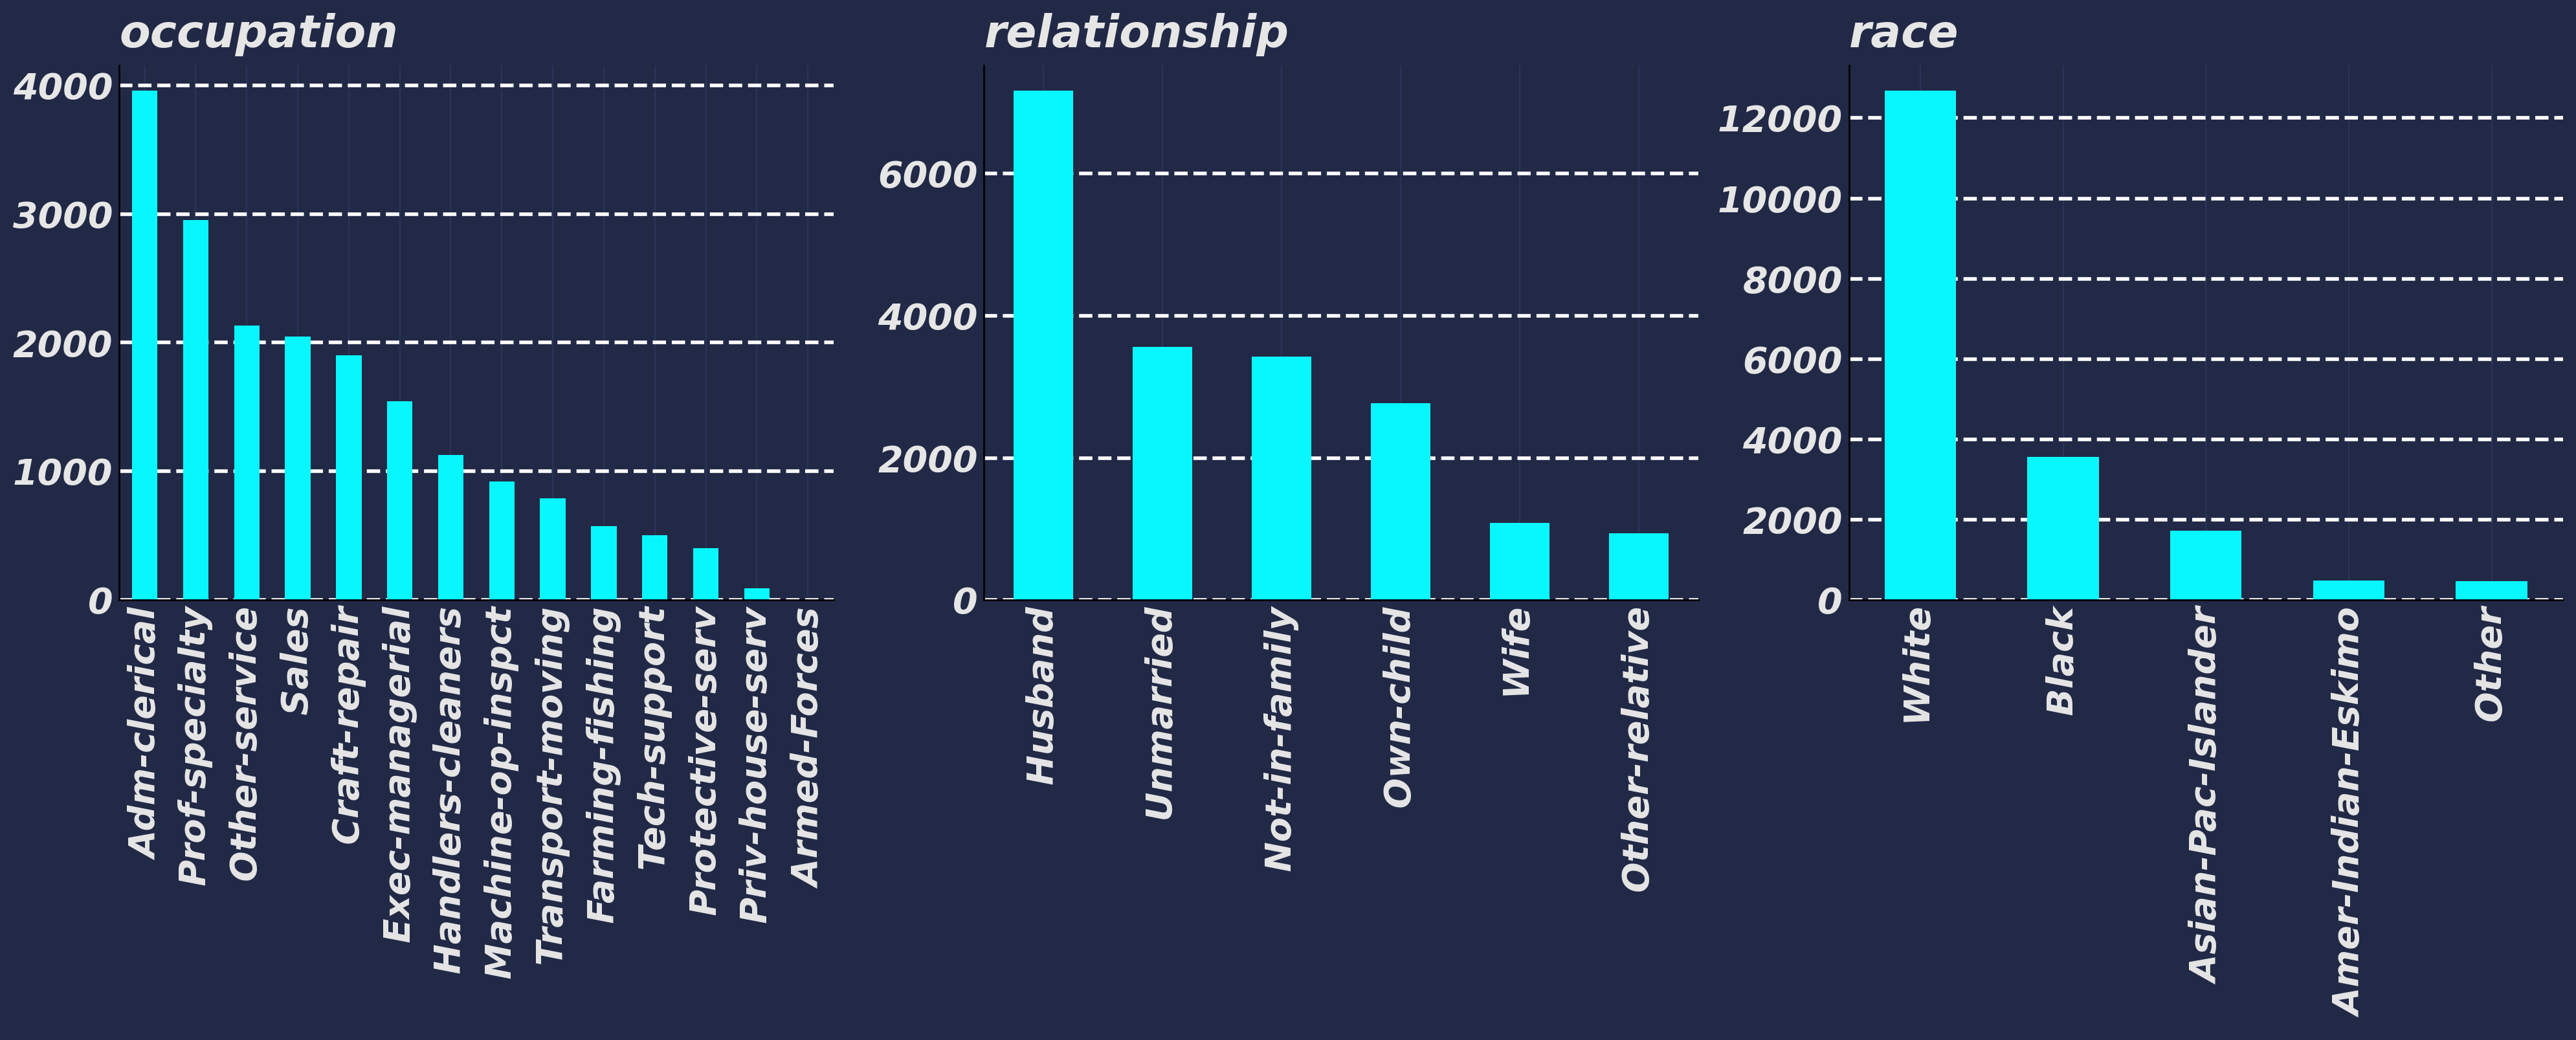

In [88]:
plt.figure(figsize=(20,20))
for i,j in enumerate(cater.iloc[:,3:6].columns):
    plt.subplot(3,3,i+1) 
    
    train[j].value_counts().plot(kind="bar")
    plt.grid(axis="y", linestyle="--",color="white",linewidth=2)
    plt.title(j) 
    plt.tight_layout()
    
plt.show() 

In [ ]:
# occupation

In [27]:
train.occupation.value_counts() 

Adm-clerical         3957
Prof-specialty       2951
Other-service        2134
Sales                2046
Craft-repair         1901
Exec-managerial      1543
Handlers-cleaners    1126
Machine-op-inspct     920
Transport-moving      790
Farming-fishing       574
Tech-support          504
Protective-serv       405
Priv-house-serv        91
Armed-Forces            2
Name: occupation, dtype: int64

In [29]:
train.groupby("occupation")["hours-per-week"].mean().to_frame()

hours-per-week
occupation                       
Adm-clerical            37.691180
Armed-Forces            44.000000
Craft-repair            41.743819
Exec-managerial         44.430331
Farming-fishing         43.890244
Handlers-cleaners       36.660746
Machine-op-inspct       37.833696
Other-service           34.505155
Priv-house-serv         33.923077
Prof-specialty          44.546594
Protective-serv         40.340741
Sales                   41.683284
Tech-support            38.460317
Transport-moving        41.029114

In [13]:
occup = {"Other-service":"service",
         "Priv-house-serv": "service", 
         "Protective-serv": "service",
         "Craft-repair": "blue-colar",
         "Farming-fishing": "blue-colar",
         "Handlers-cleaners": "blue-colar",
         "Machine-op-inspct": "blue-colar",
         "Transport-moving": "blue-colar", 
         "Armed-Forces": "other-occupation",
         "Tech-support": "other-occupation", 
        }

In [49]:
test_occup = train.occupation.replace(occup)

In [50]:
train.groupby(test_occup)["hours-per-week"].describe() 

count       mean        std  min   25%   50%   75%    max
occupation                                                                  
Adm-clerical      3957.0  37.691180   9.248488  1.0  34.0  39.0  40.0   84.0
Exec-managerial   1543.0  44.430331  10.821817  2.0  39.0  43.0  54.0   92.0
Prof-specialty    2951.0  44.546594  11.292676  4.0  39.0  40.0  50.0  102.0
Sales             2046.0  41.683284  12.605598  4.0  35.0  40.0  49.0   88.0
blue-colar        5311.0  40.114479  10.628838  2.0  39.0  39.0  43.0   99.0
other-occupation   506.0  38.482213   7.935924  6.0  35.0  39.0  40.0   74.0
service           2630.0  35.383650  10.986971  2.0  29.0  39.0  39.0   92.0

Text(0.0, 1.0, '(rate)hours-per-week by occupation')

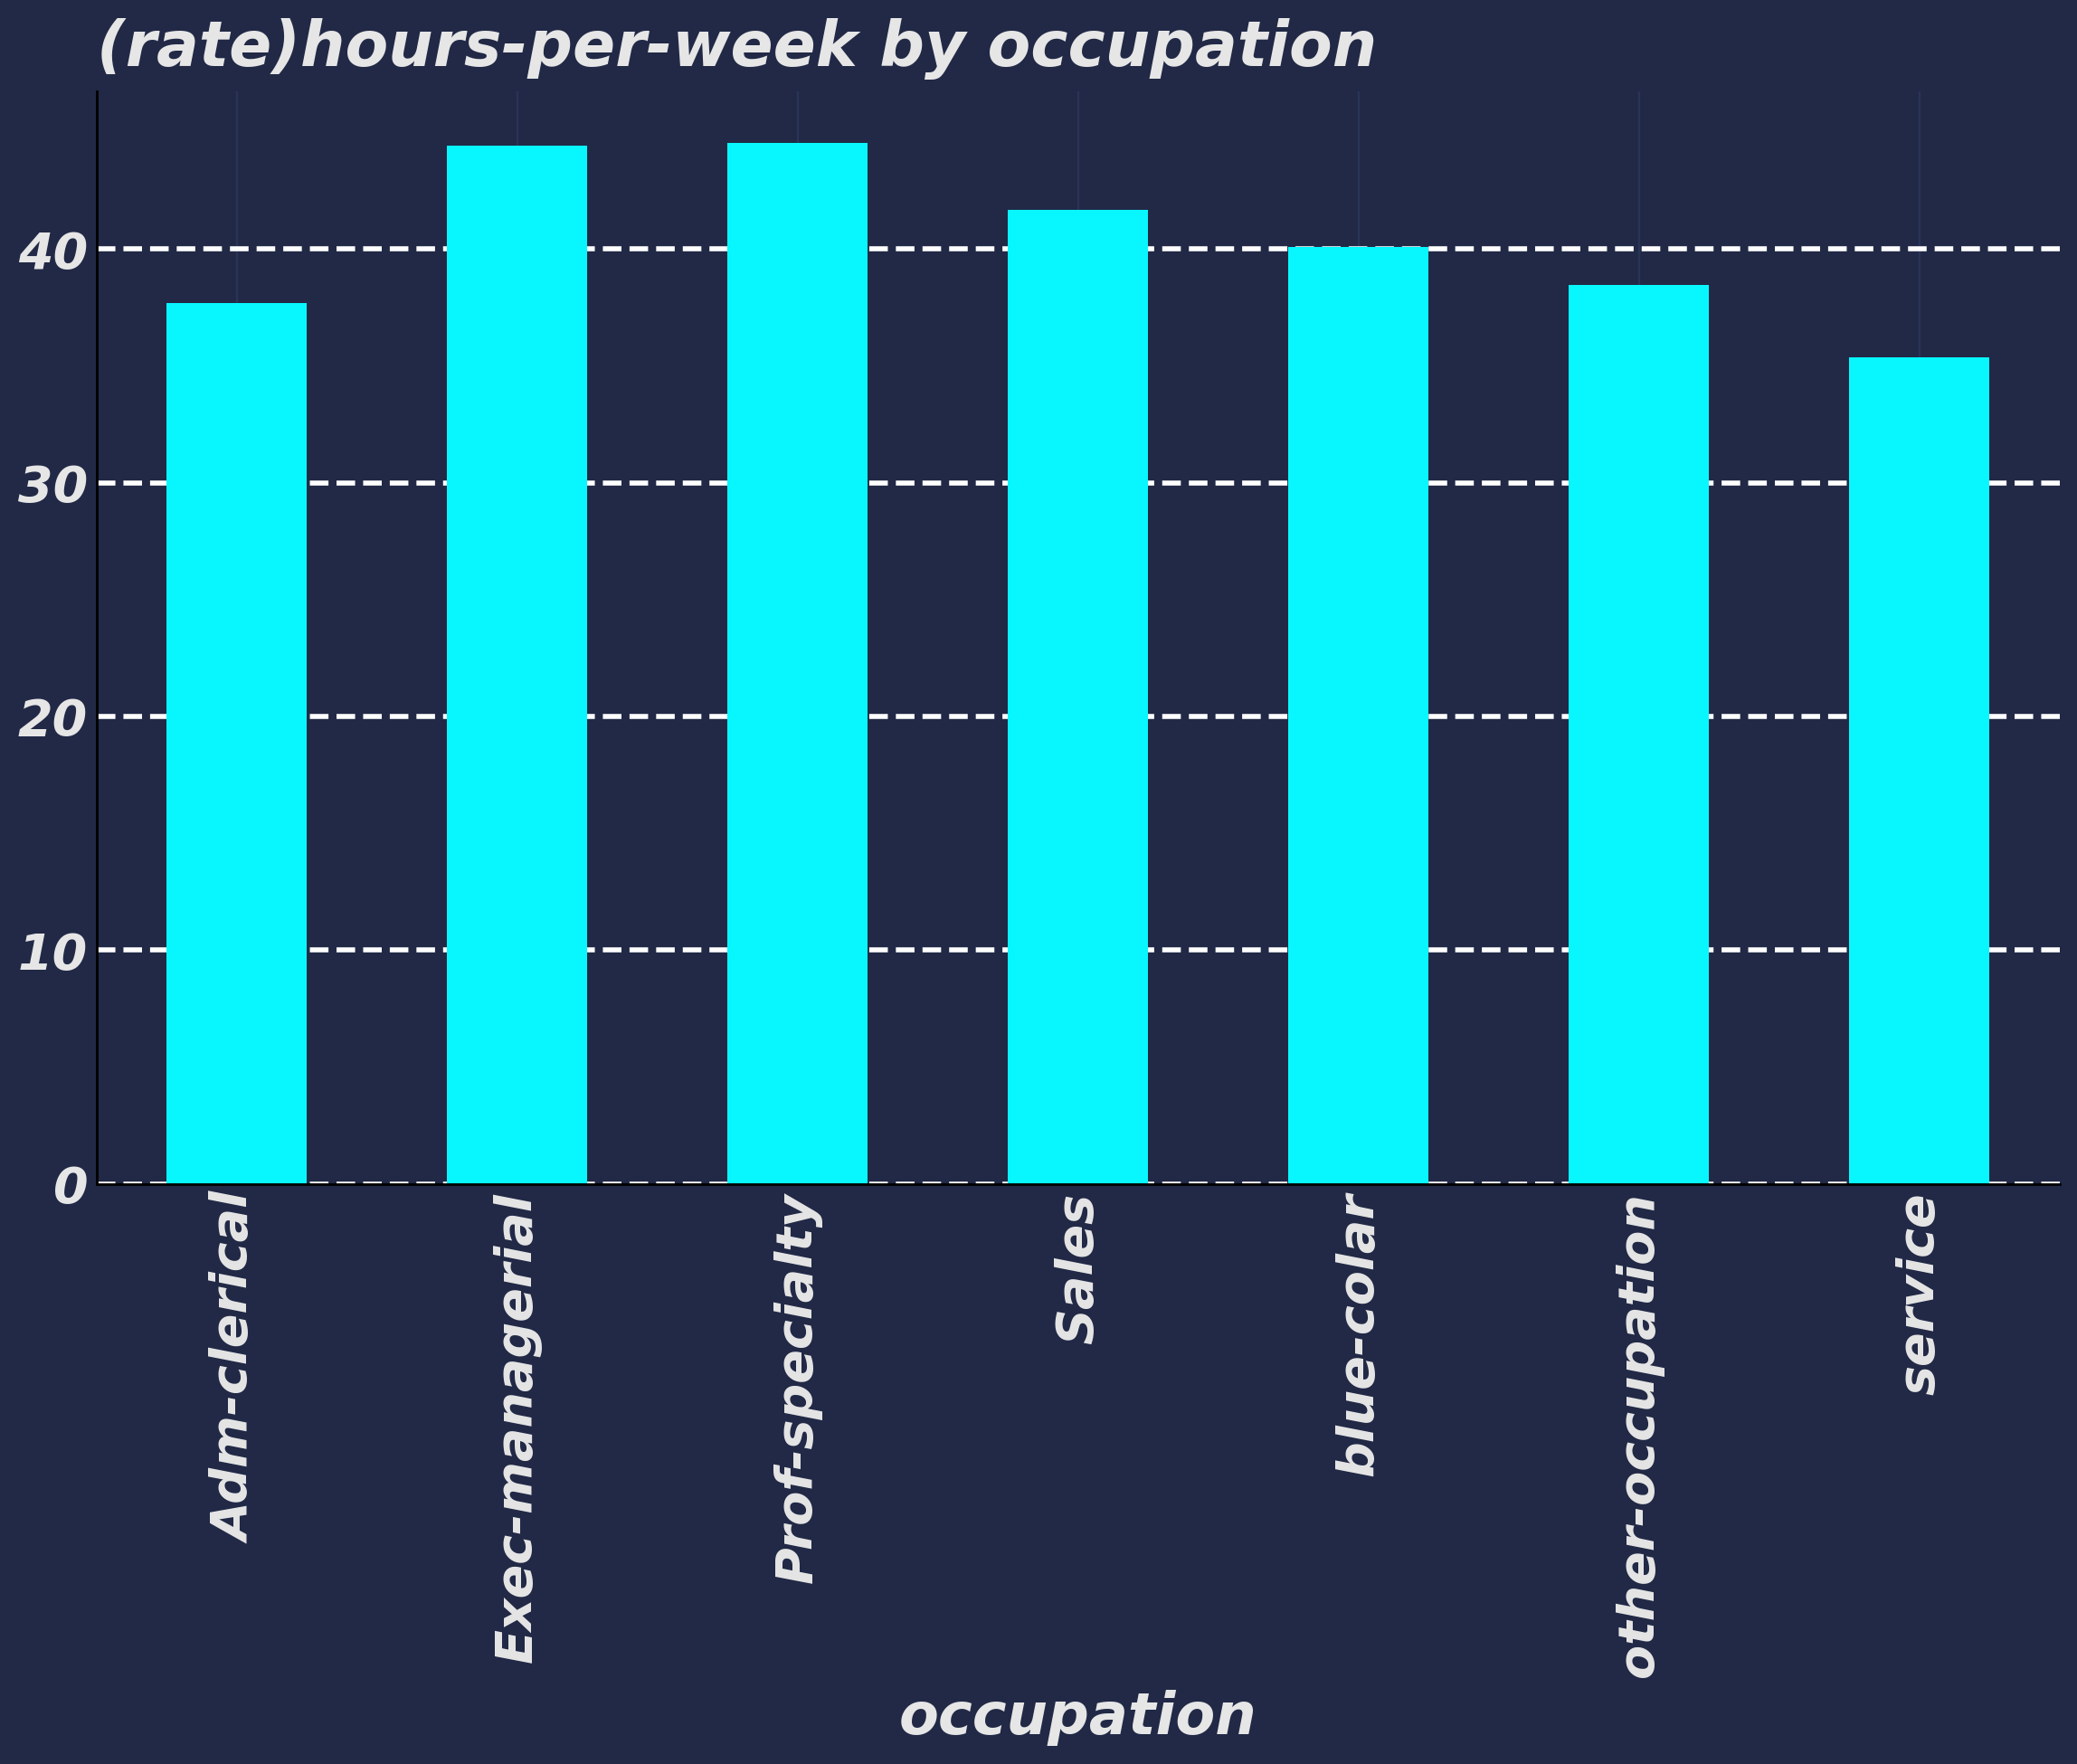

In [52]:
plt.figure(figsize=(14,8))

train.groupby(test_occup)["hours-per-week"].mean().plot(kind="bar")
plt.grid(axis="y", linestyle="--", color="white",linewidth=2) 
plt.title("(rate)hours-per-week by occupation") 

In [14]:
for i in [train,test]:
    i["occupation"] = i["occupation"].replace(occup) 

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

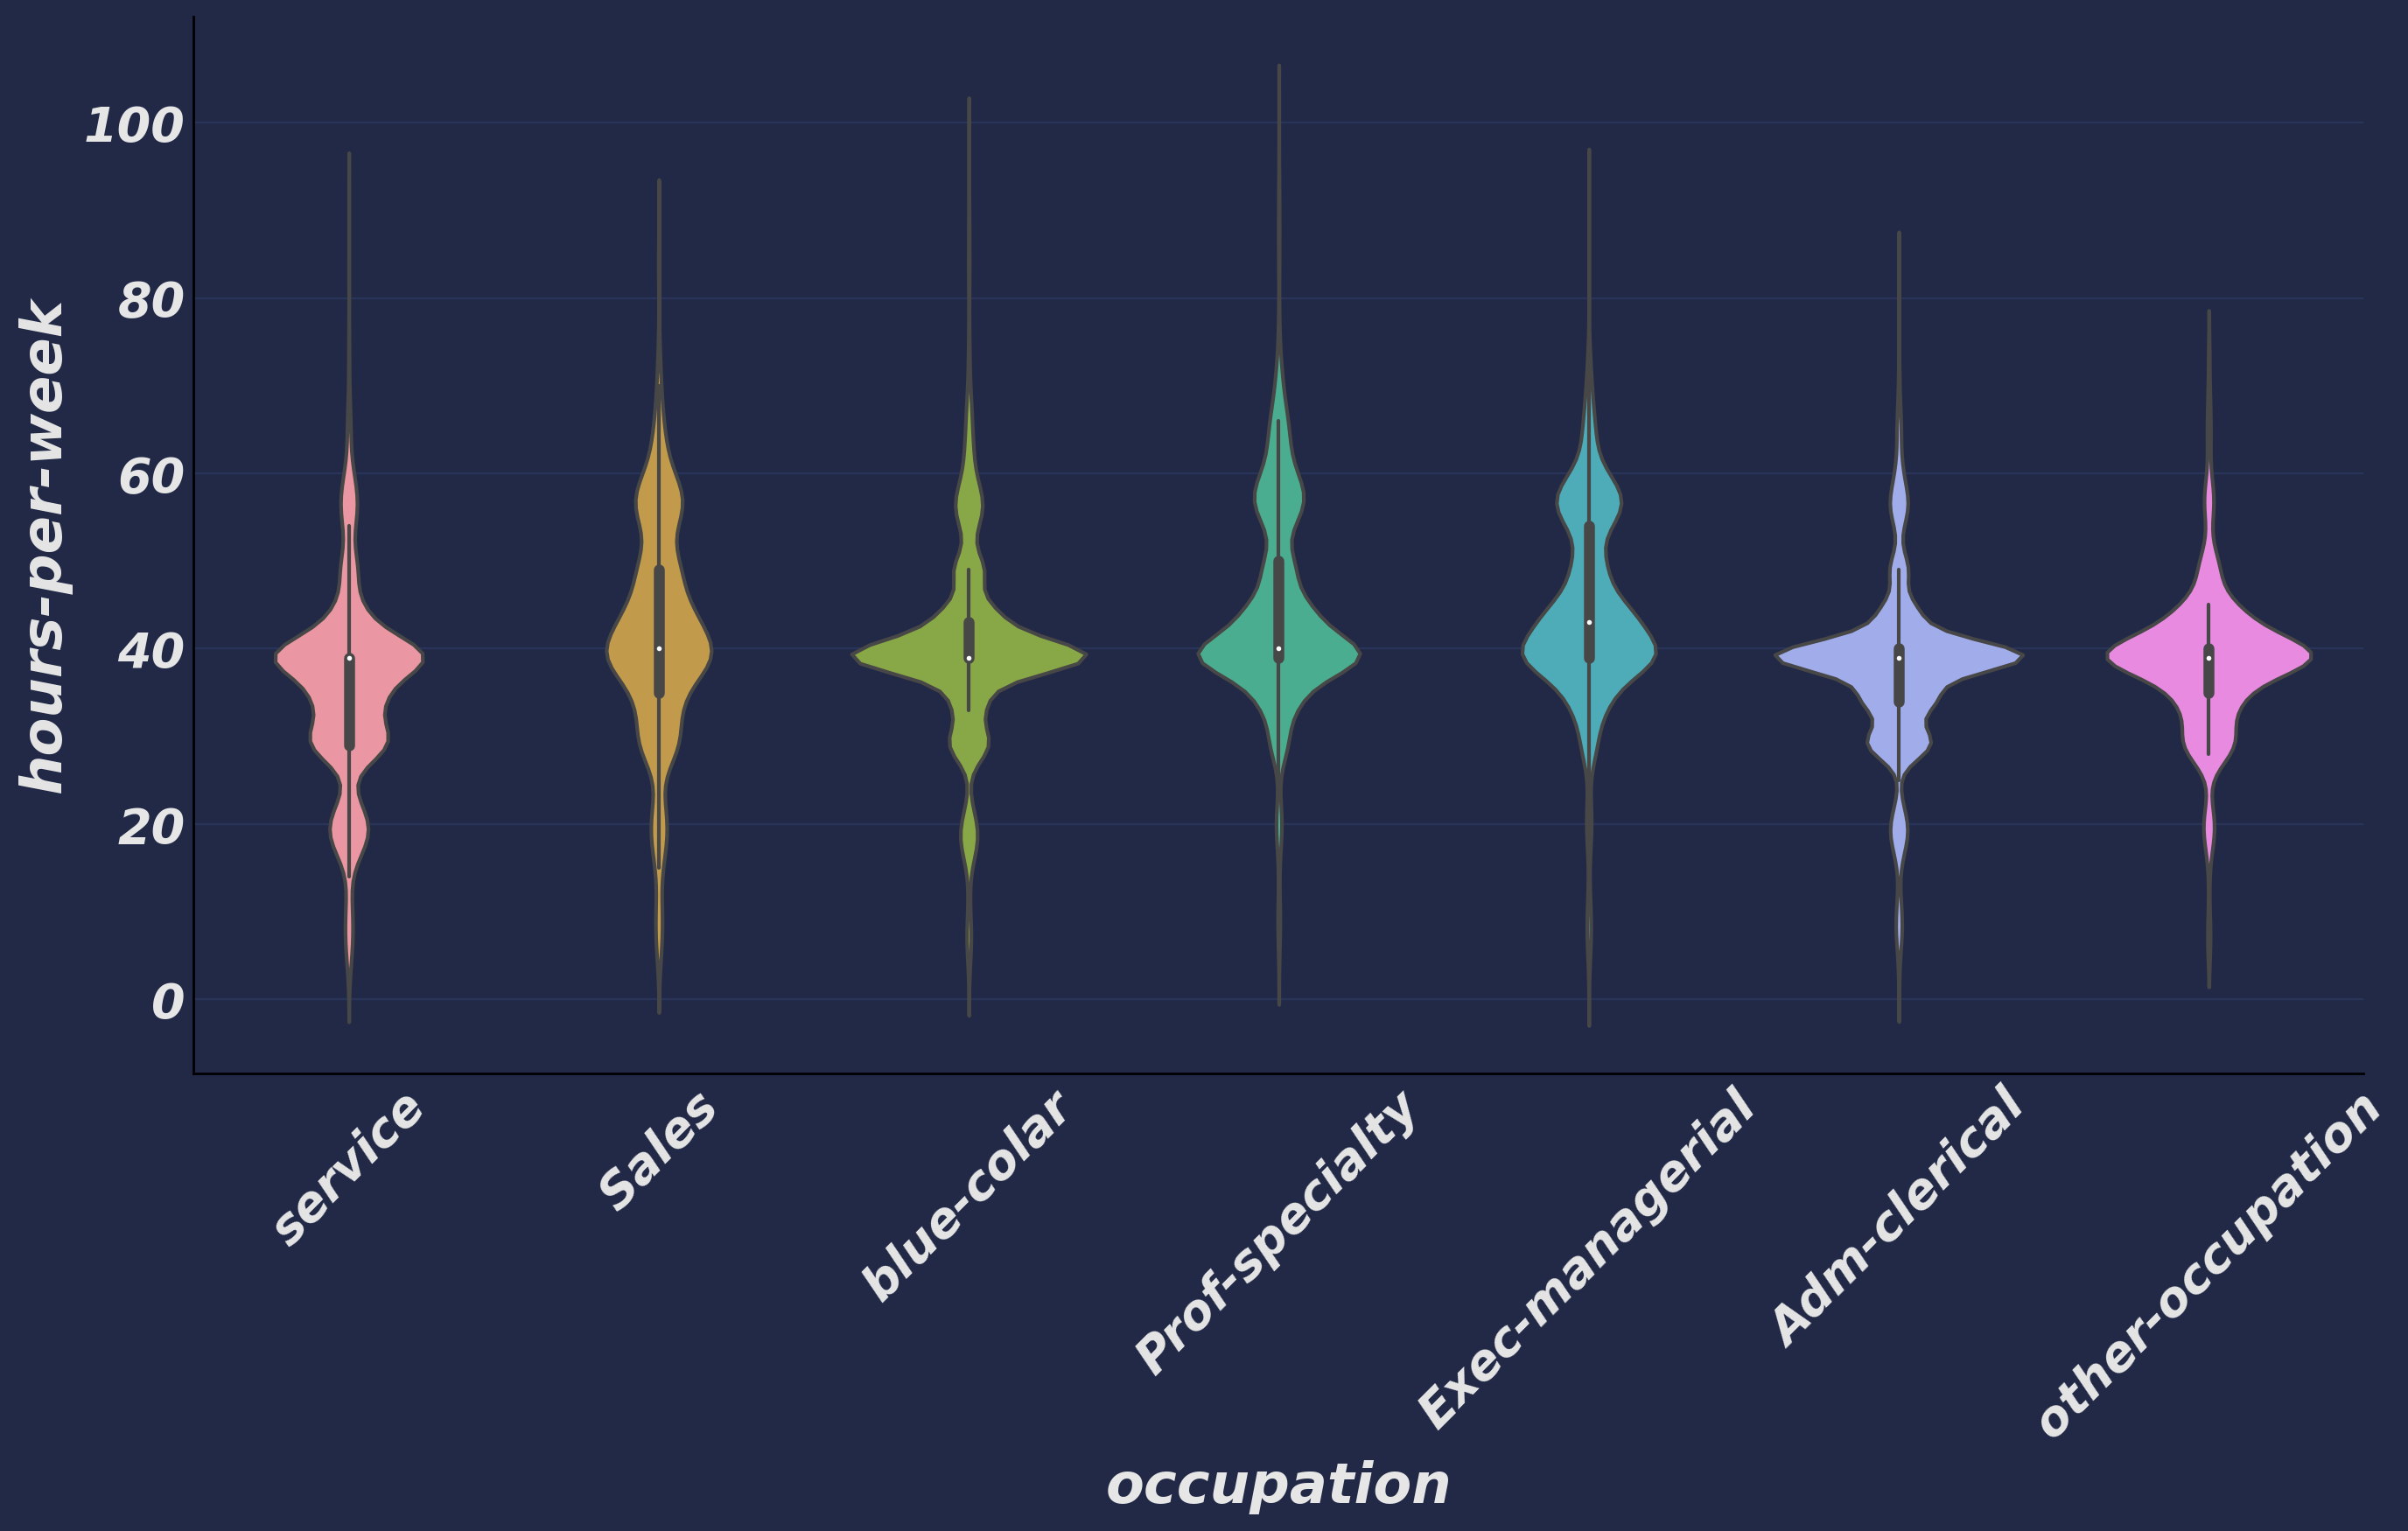

In [57]:
plt.figure(figsize=(16,8))

sns.violinplot(x=train["occupation"], y=train["hours-per-week"])
plt.xticks(rotation=45) 

In [ ]:
# relationship

In [24]:
train.relationship.value_counts()

Husband           7164
Unmarried         3557
Not-in-family     3428
Own-child         2768
Wife              1090
Other-relative     937
Name: relationship, dtype: int64

In [25]:
train.groupby("relationship")["hours-per-week"].mean().to_frame()

hours-per-week
relationship                  
Husband              44.296343
Not-in-family        41.455951
Other-relative       36.546425
Own-child            35.045159
Unmarried            36.593197
Wife                 35.925688

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

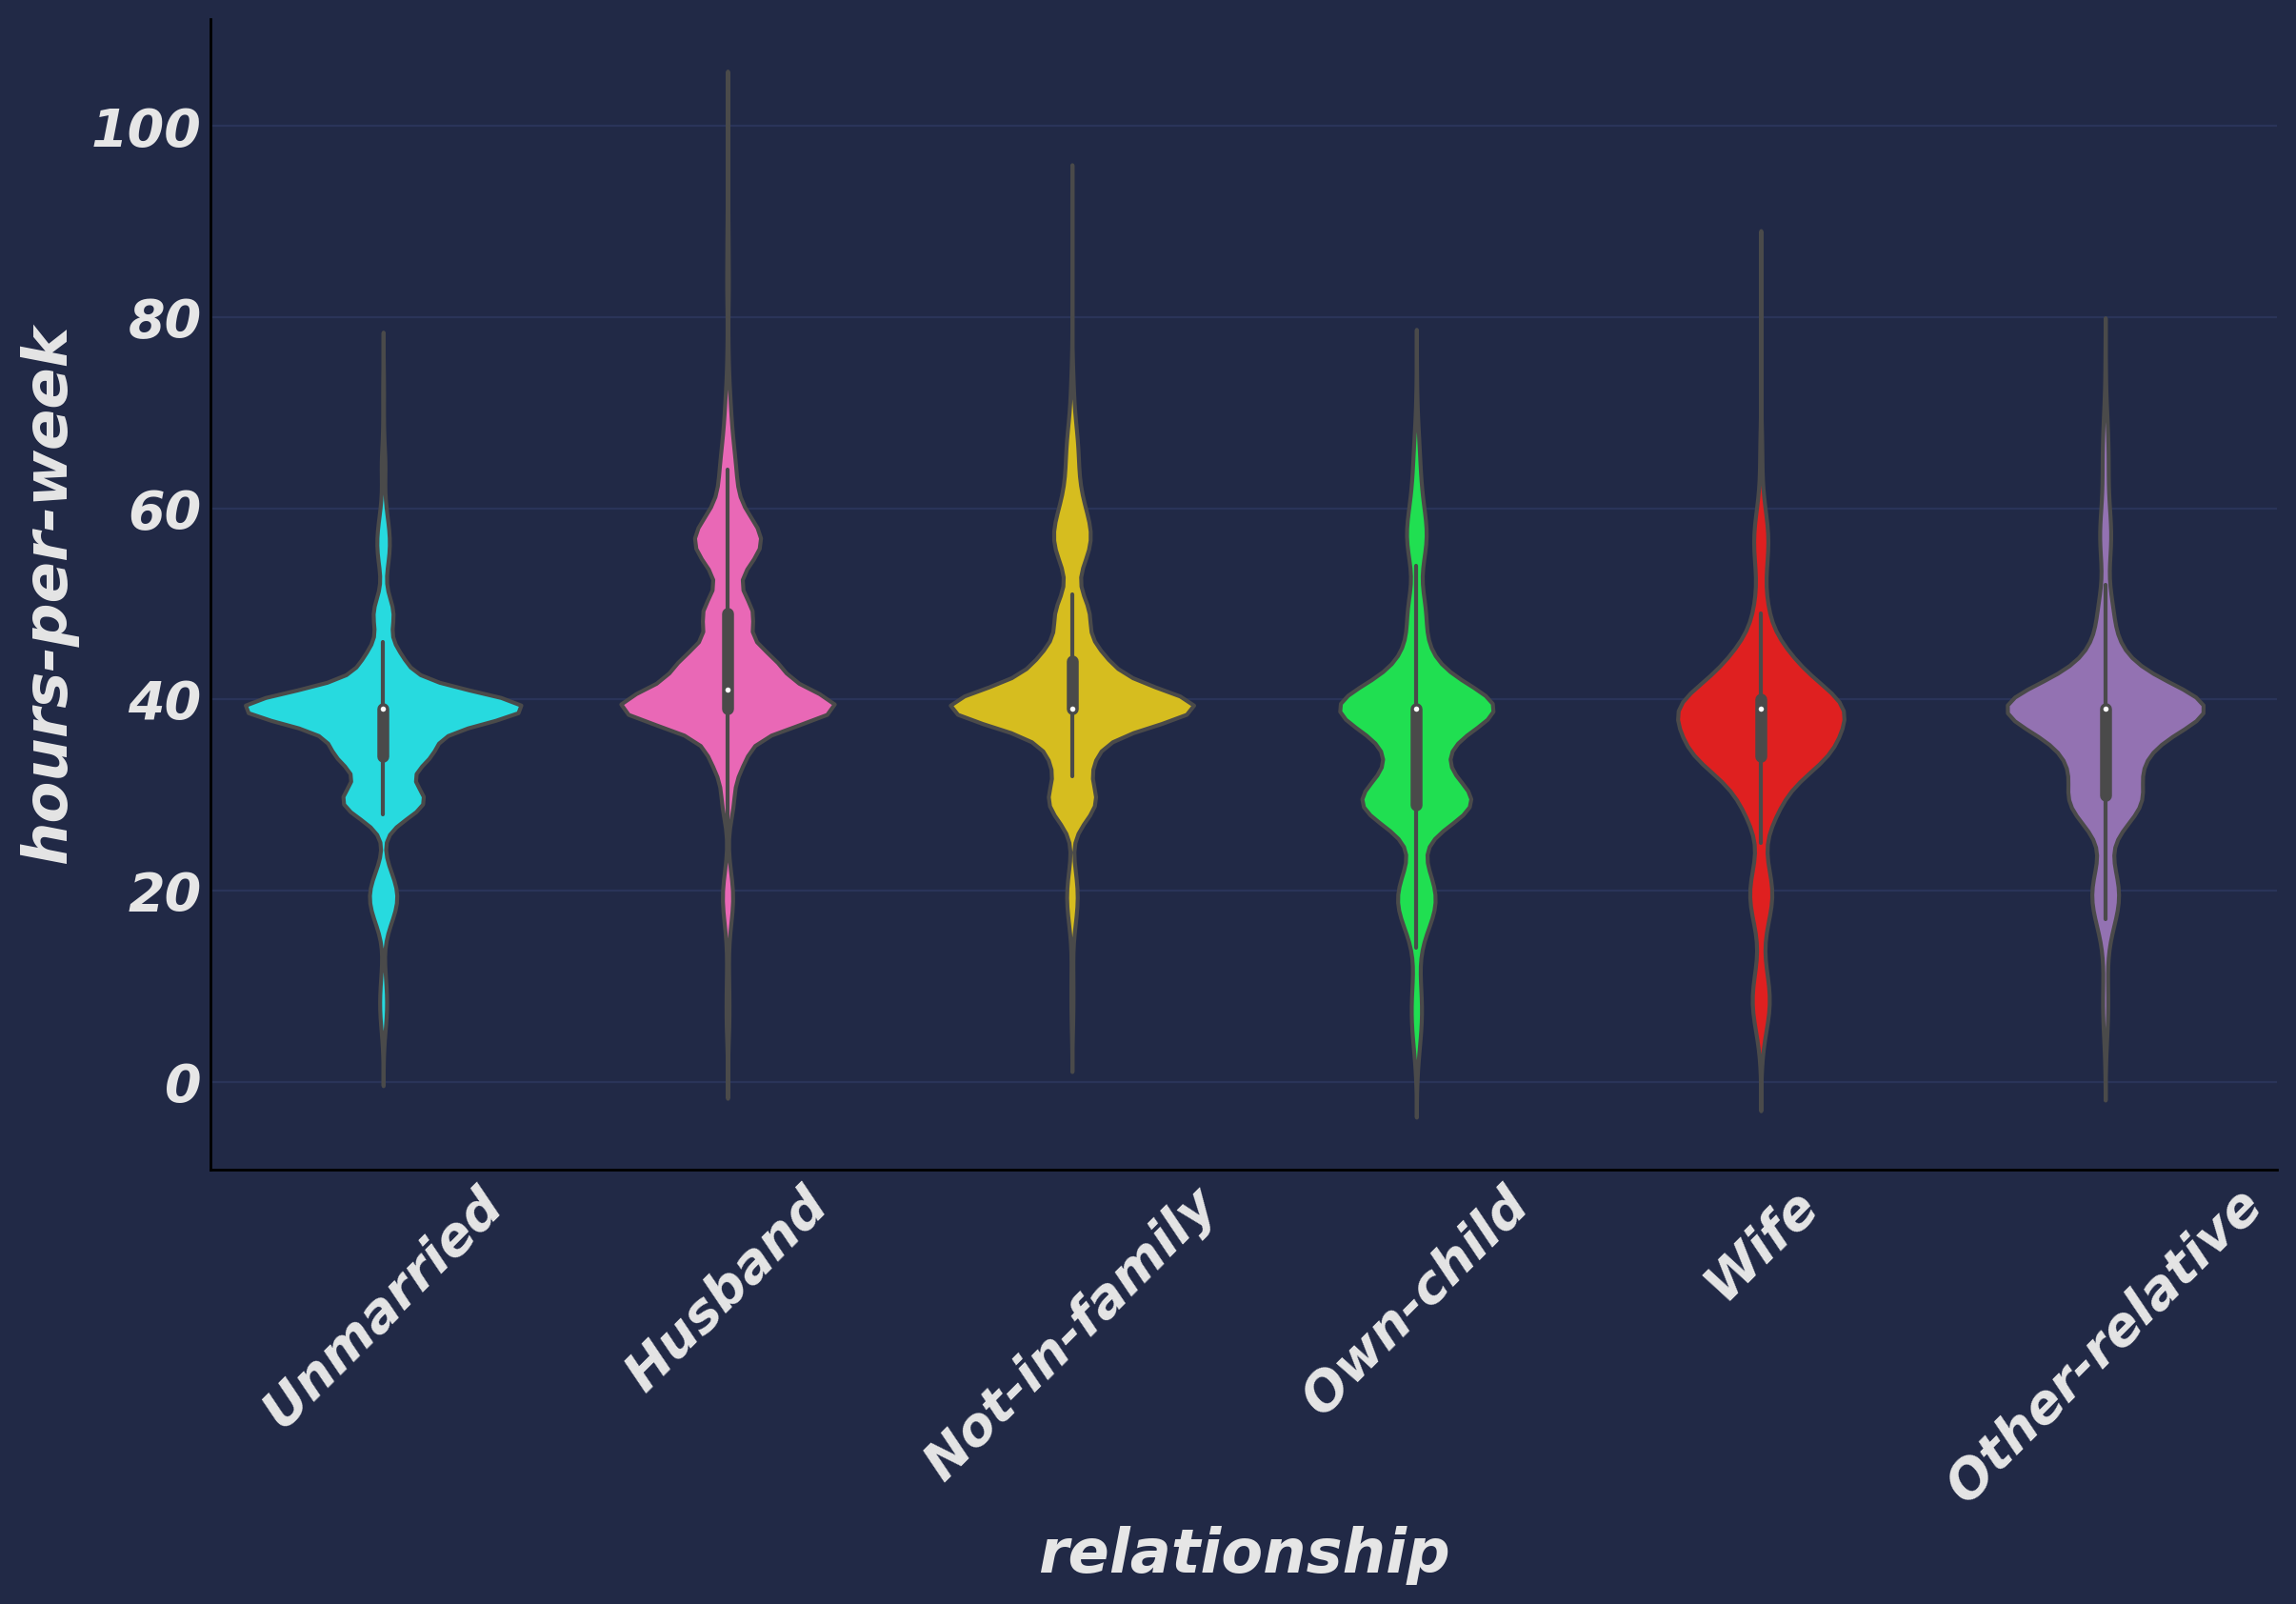

In [27]:
plt.figure(figsize=(14,8))

sns.violinplot(x=train["relationship"], y=train["hours-per-week"])
plt.xticks(rotation=45) 

In [ ]:
#race

In [28]:
train.race.value_counts()

White                 12682
Black                  3565
Asian-Pac-Islander     1728
Amer-Indian-Eskimo      491
Other                   478
Name: race, dtype: int64

In [30]:
train.groupby("race")["hours-per-week"].describe()

count       mean        std  min   25%   50%   75%  \
race                                                                       
Amer-Indian-Eskimo    491.0  40.470468  11.474045  6.0  35.5  39.0  44.0   
Asian-Pac-Islander   1728.0  39.932870  11.831773  2.0  35.0  39.0  44.0   
Black                3565.0  37.088640   9.070091  1.0  34.0  39.0  39.0   
Other                 478.0  37.813808  10.053570  5.0  34.0  39.0  40.0   
White               12682.0  41.069942  11.406121  2.0  39.0  39.0  44.0   

                      max  
race                       
Amer-Indian-Eskimo   92.0  
Asian-Pac-Islander   92.0  
Black                90.0  
Other                93.0  
White               102.0

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

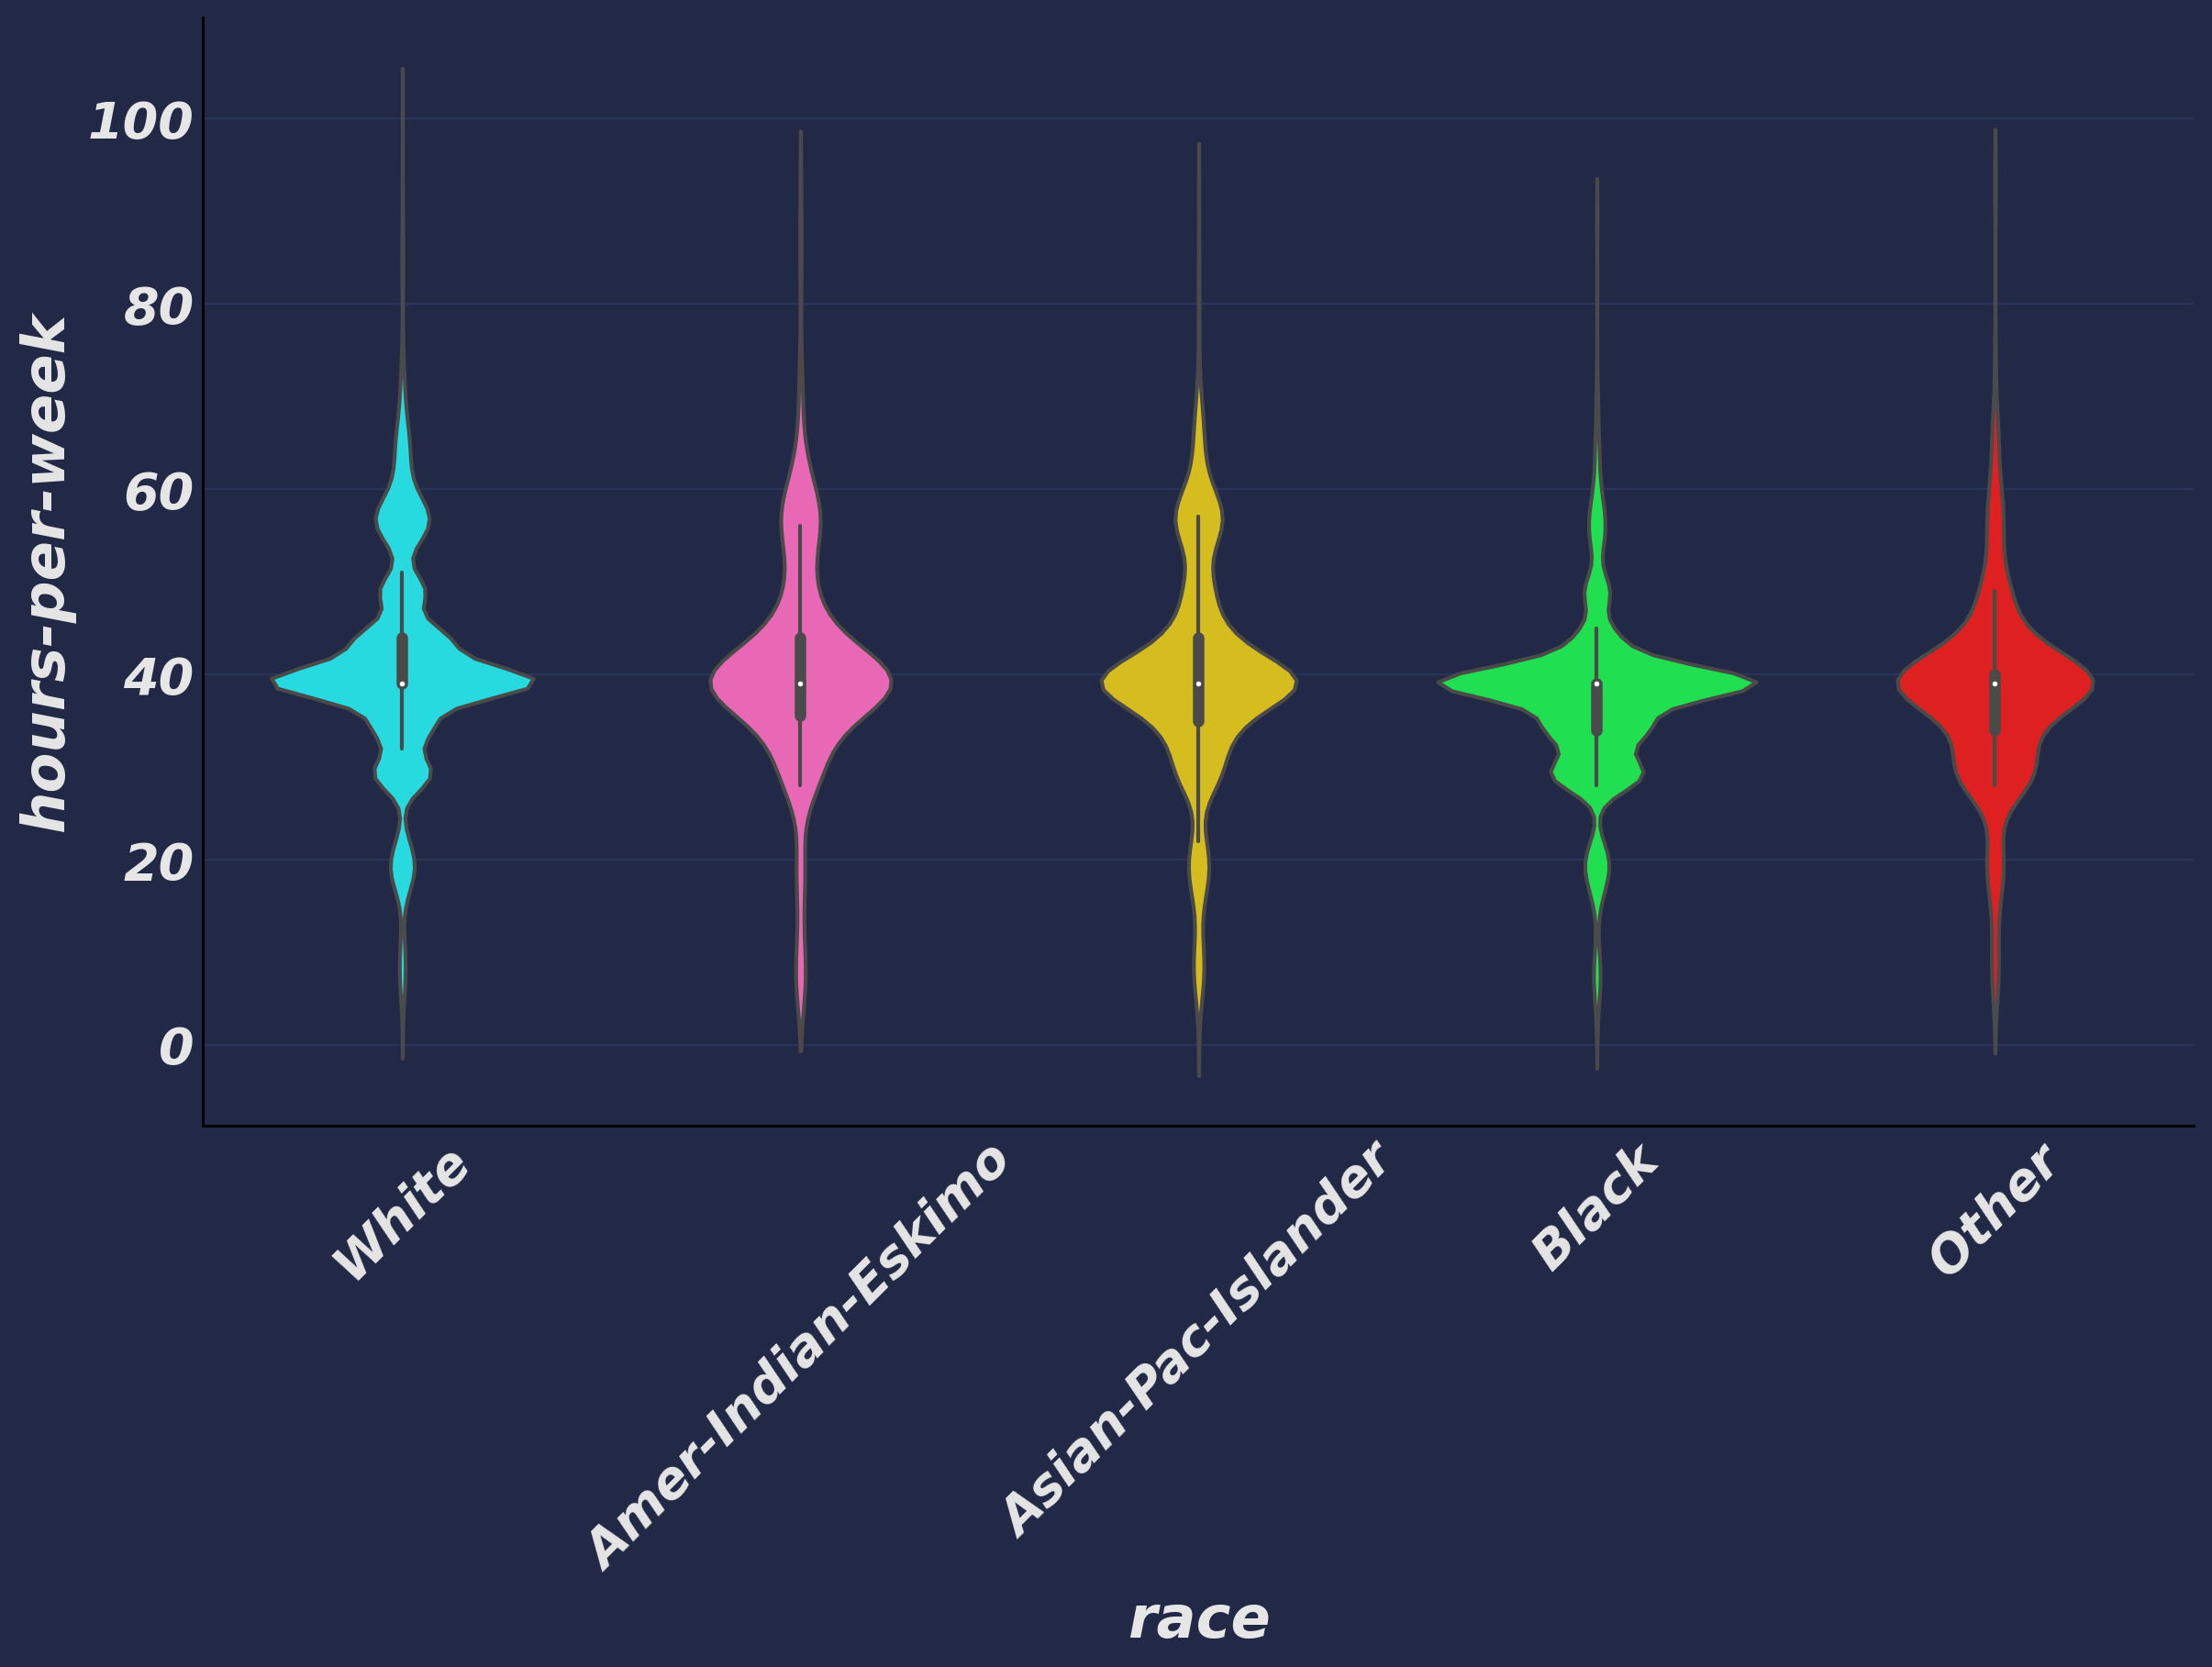

In [31]:
plt.figure(figsize=(14,8))

sns.violinplot(x=train["race"], y=train["hours-per-week"])
plt.xticks(rotation=45) 

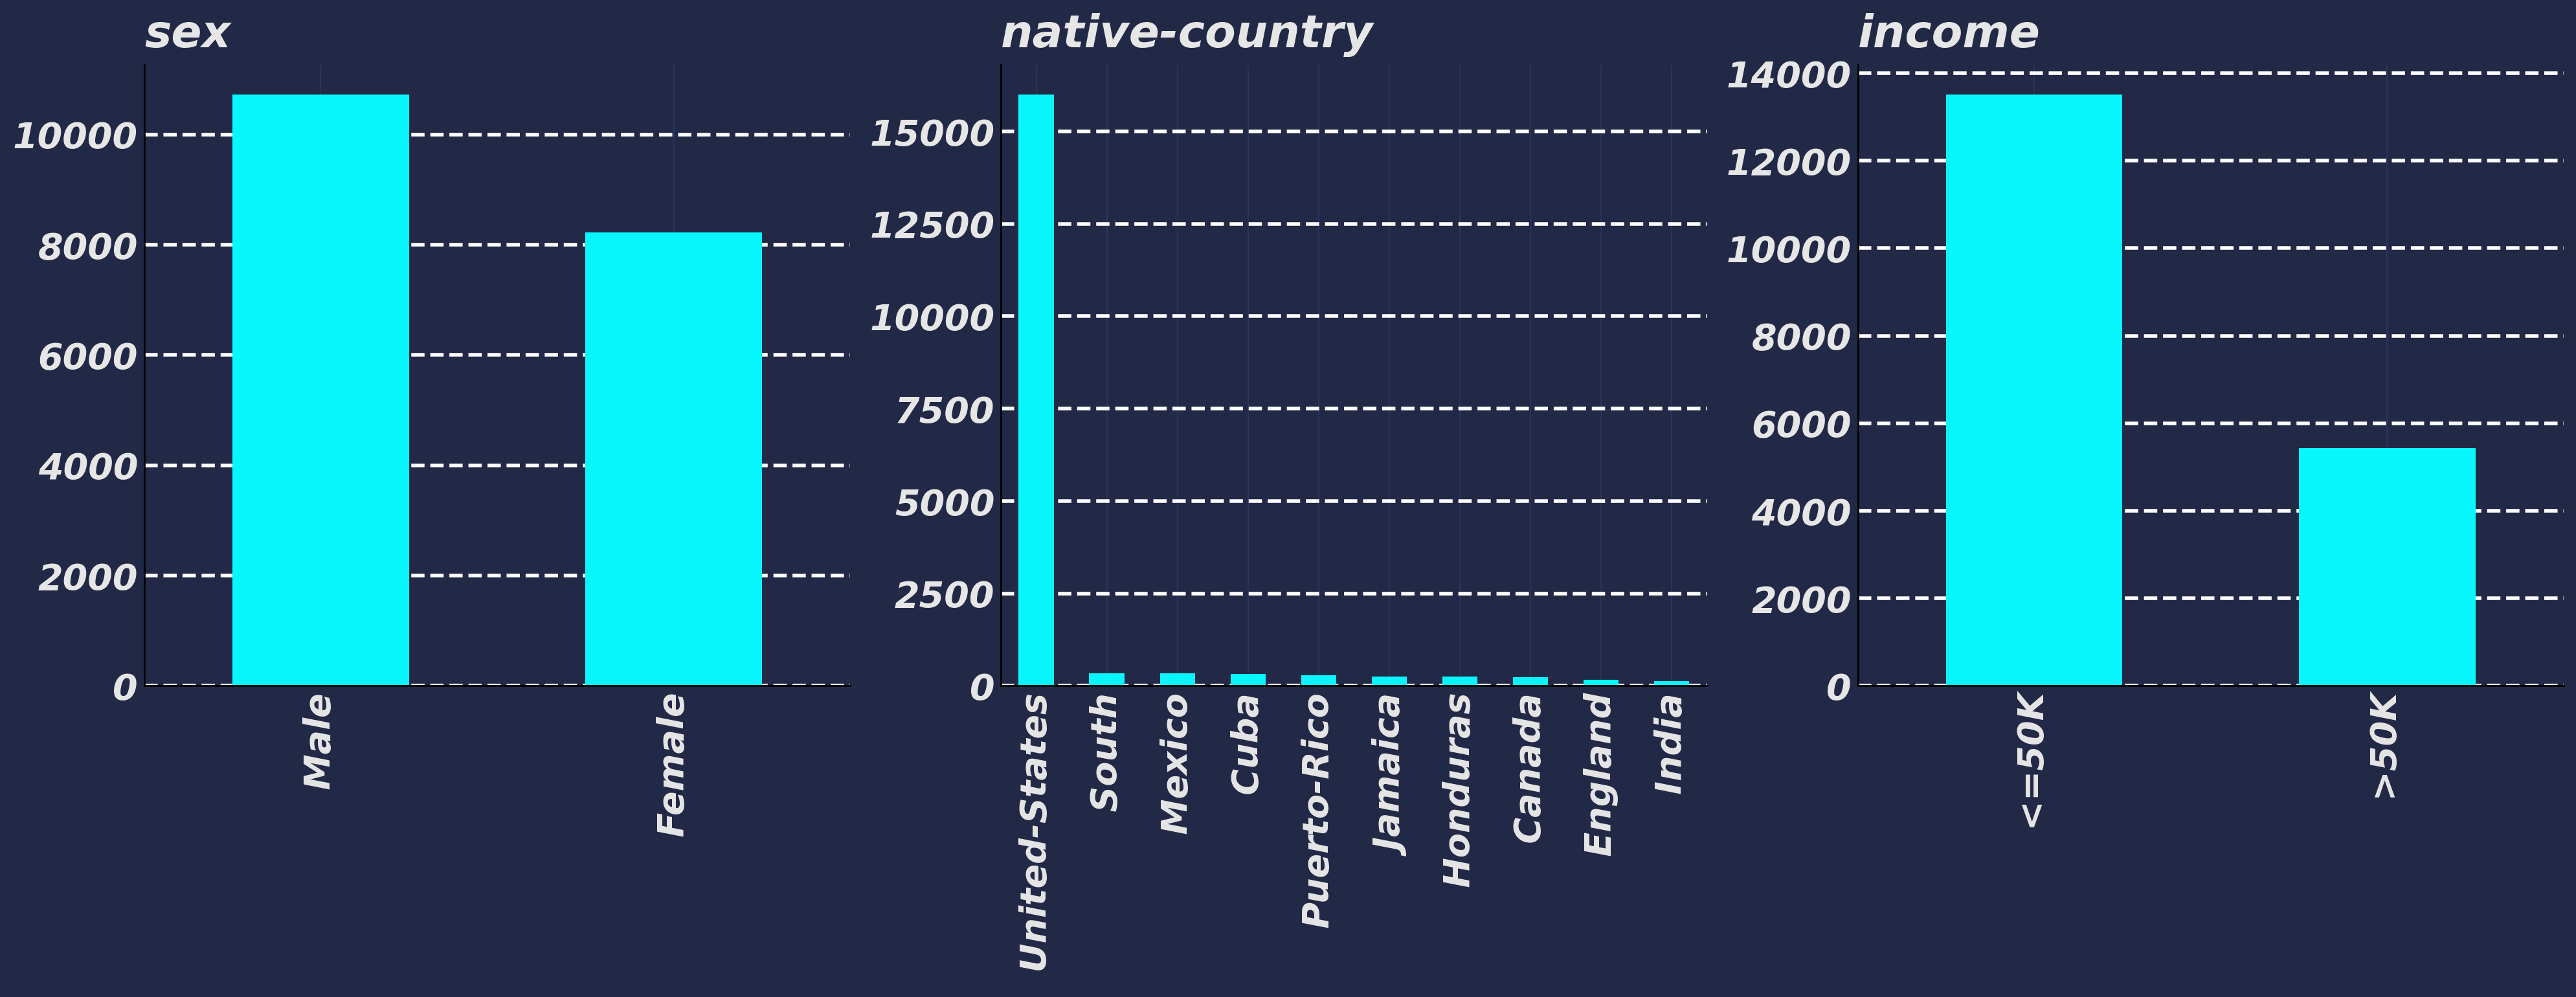

In [54]:
plt.figure(figsize=(20,20))
for i,j in enumerate(cater.iloc[:,6:9].columns):
    plt.subplot(3,3,i+1) 
    
    train[j].value_counts()[:10].plot(kind="bar")
    plt.grid(axis="y", linestyle="--",color="white",linewidth=2)
    plt.title(j) 
    plt.tight_layout()
    
plt.show() 

In [ ]:
#sex

In [32]:
train.sex.value_counts()

Male      10727
Female     8217
Name: sex, dtype: int64

In [37]:
train.groupby("sex")["hours-per-week"].describe()

count       mean        std  min   25%   50%   75%    max
sex                                                                
Female   8217.0  36.311428   9.584351  1.0  31.0  39.0  39.0   84.0
Male    10727.0  43.036170  11.339571  2.0  39.0  39.0  49.0  102.0

Text(0.0, 1.0, 'sex by hours-per-week')

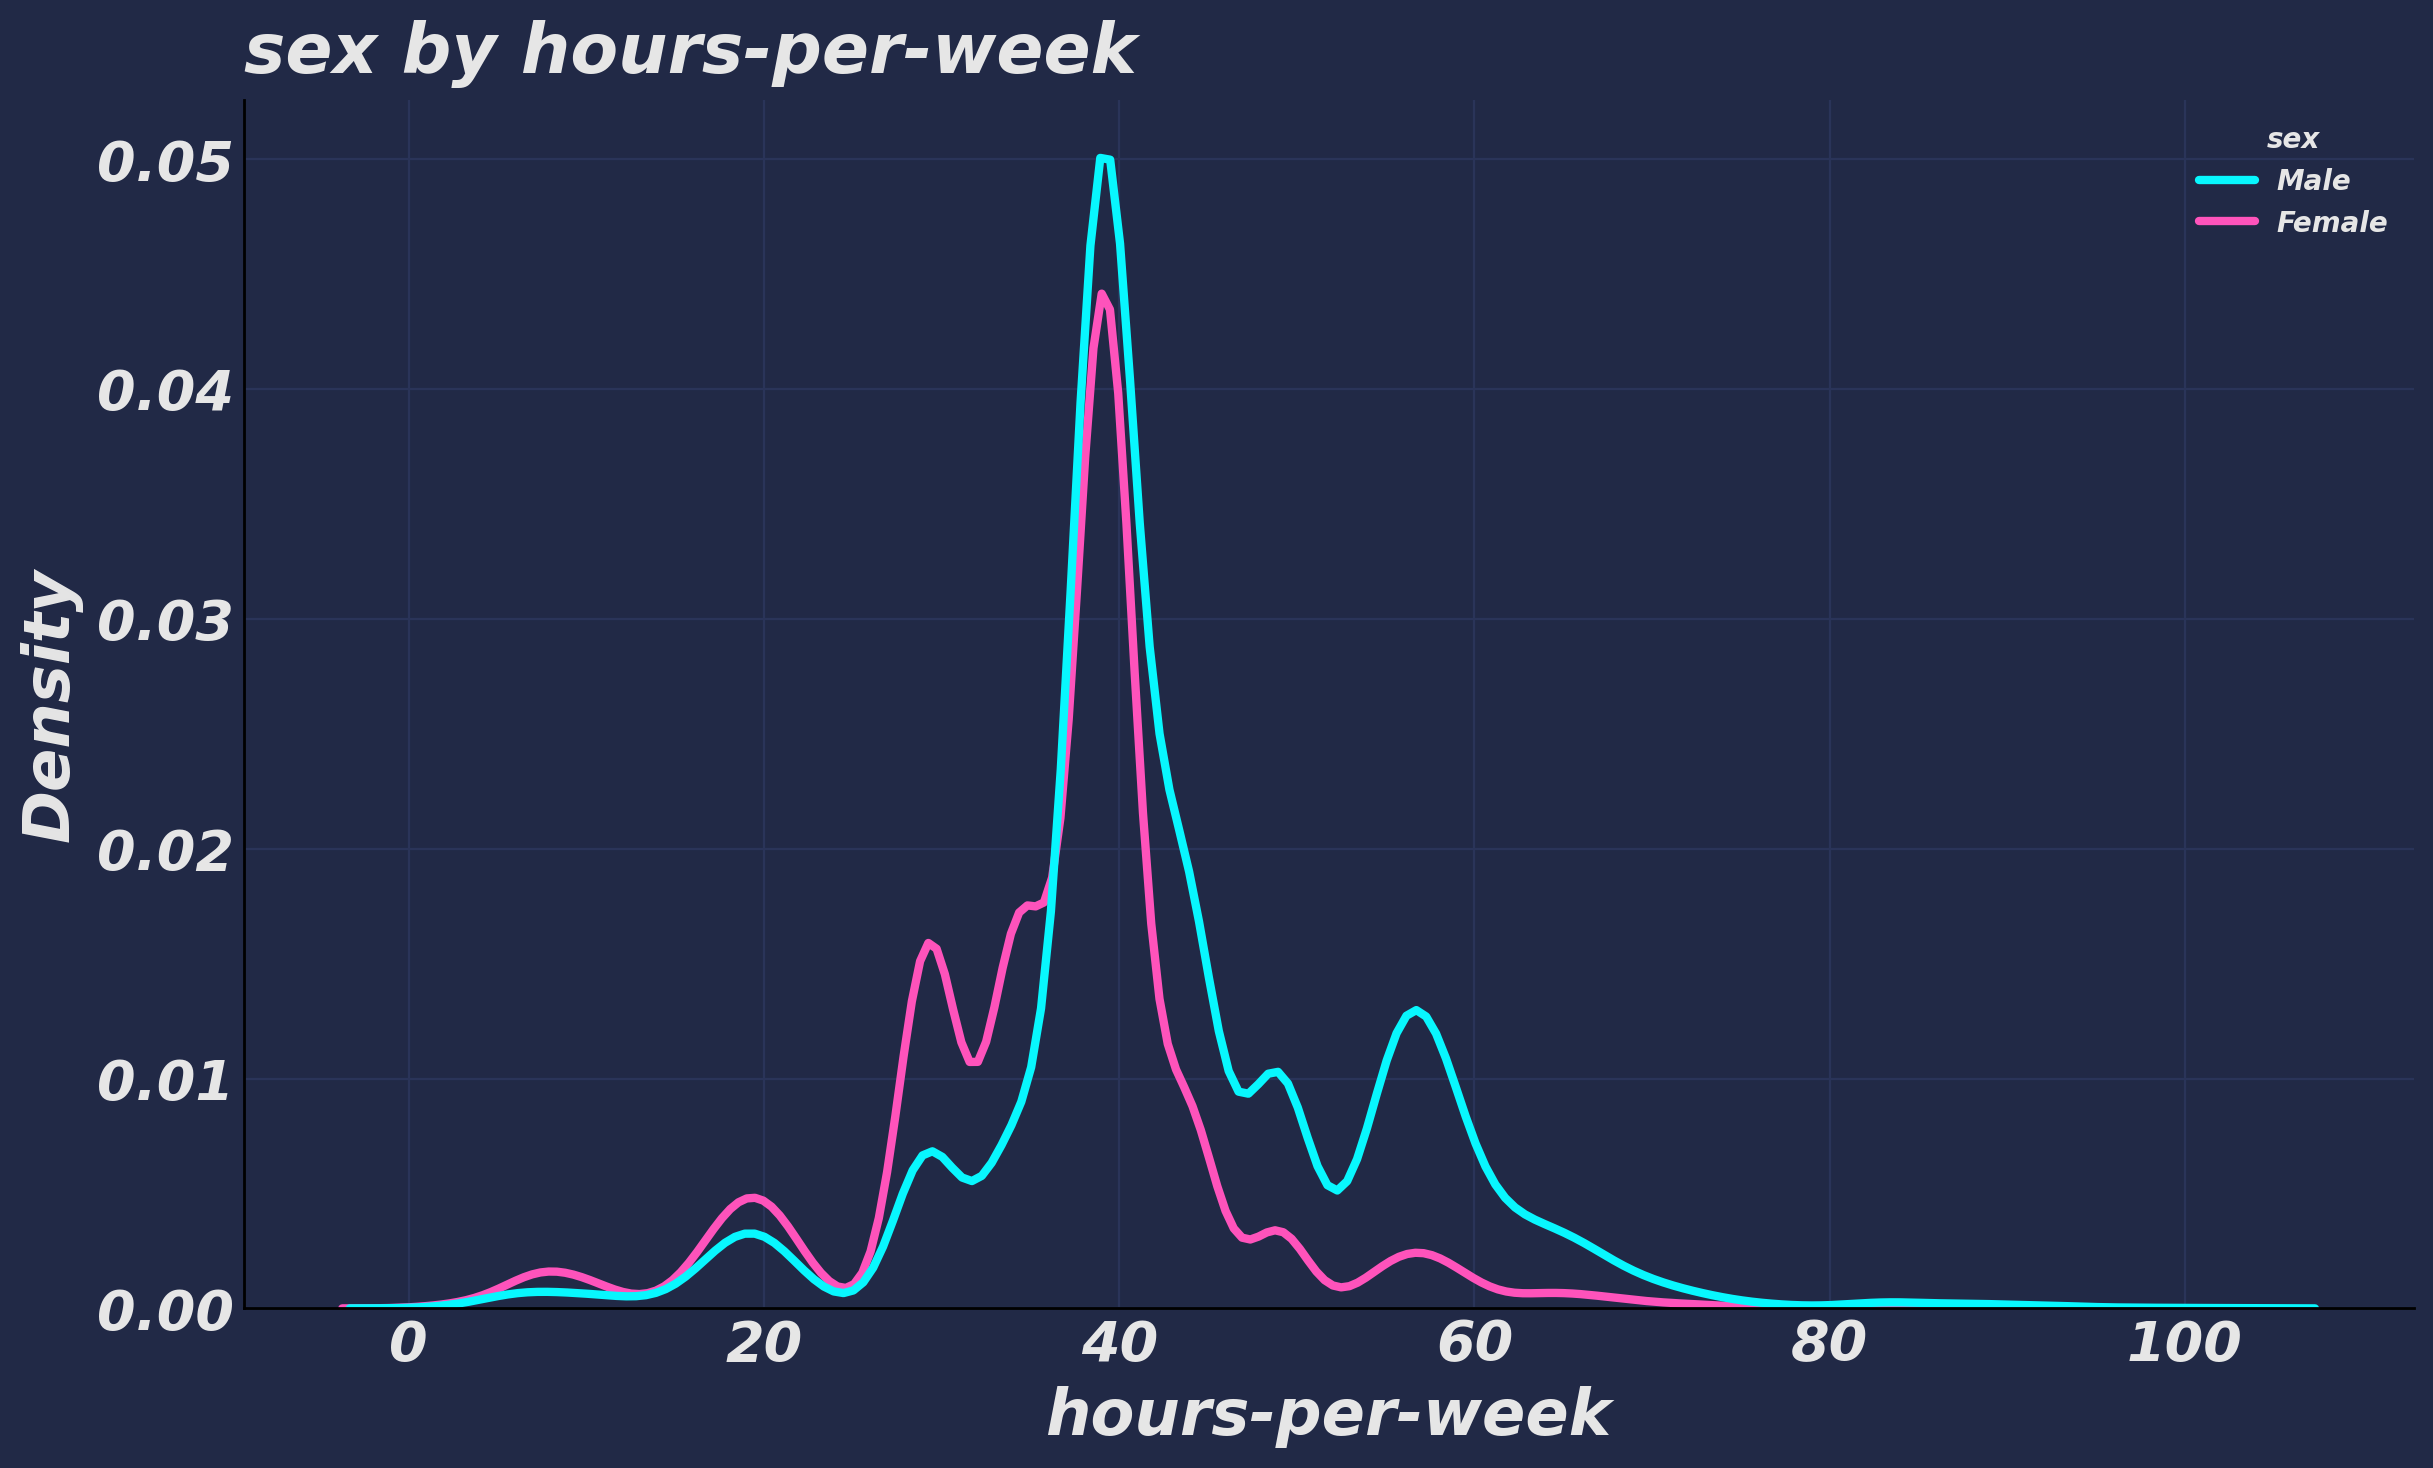

In [54]:
plt.figure(figsize=(14,8))

sns.kdeplot(train["hours-per-week"], hue=train.sex,linewidth=3)
plt.title("sex by hours-per-week") 

In [ ]:
# native country

In [38]:
train["native-country"].unique()

array(['United-States', 'Cuba', 'Philippines', 'Mexico', 'Honduras',
       'Jamaica', 'England', 'India', 'Canada', 'Puerto-Rico', 'South',
       'Guatemala', 'Haiti', 'Iran', 'Outlying-US(Guam-USVI-etc)',
       'El-Salvador', 'Italy', 'Cambodia', 'Germany', 'Portugal', 'Japan',
       'Yugoslavia', 'Ireland', 'China', 'Dominican-Republic', 'Taiwan',
       'Ecuador', 'Poland', 'Trinadad&Tobago', 'Vietnam', 'Thailand',
       'Columbia', 'Peru', 'France', 'Greece', 'Hungary', 'Laos',
       'Scotland', 'Hong', 'Nicaragua', 'Holand-Netherlands'],
      dtype=object)

In [15]:
country = {"Philippines":"SEA",
           "Cambodia": "SEA", 
           "Vietnam": "SEA", 
           "Thailand": "SEA", 
           "Laos": "SEA", 
           "Canada":"british-commonwealth",
           "England":"british-commonwealth",
           "India":"british-commonwealth",
           "Ireland":"british-commonwealth",
           "Scotland":"british-commonwealth",
           "Columbia":"south-america",
           "Ecuador":"south-america",
           "El-Salvador":"south-america",
           "Peru":"south-america",
           "Dominican-Republic":"latin-america",
           "Guatemala":"latin-america",
           "Haiti":"latin-america",
           "Honduras":"latin-america",
           "Jamaica":"latin-america",
           "Mexico":"latin-america",
           "Nicaragua":"latin-america",
           "Outlying-US(Guam-USVI-etc)":"latin-america",
           "Puerto-Rico":"latin-america",
           "Trinadad&Tobago":"latin-america",
           "France":"euro-1",
           "Germany":"euro-1",
           "Holand-Netherlands":"euro-1",
           "Italy":"euro-1",
           "Hong":"China", 
           "Taiwan":"China",
           "Greece":"euro-2",
           "Hungary":"euro-2",
           "Poland":"euro-2",
           "Portugal":"euro-2",
           "South":"euro-2",
           "Yugoslavia":"euro-2",
           "Japan":"other-country",
           "Iran":"other-country"}

In [39]:
train["native-country"].value_counts().head(10) 

United-States    16000
South              342
Mexico             329
Cuba               321
Puerto-Rico        283
Jamaica            254
Honduras           247
Canada             236
England            165
India              125
Name: native-country, dtype: int64

In [40]:
train["native-country"].value_counts().tail(10) 

Trinadad&Tobago               9
Ireland                       9
Ecuador                       7
Cambodia                      7
Outlying-US(Guam-USVI-etc)    6
Scotland                      5
Hungary                       4
Hong                          3
Holand-Netherlands            2
France                        1
Name: native-country, dtype: int64

In [46]:
#after combination
test_country = train["native-country"].replace(country)

In [56]:
train.groupby(test_country)["hours-per-week"].mean().to_frame() 

hours-per-week
native-country                      
China                      45.197531
Cuba                       40.361371
SEA                        39.276923
United-States              40.377938
british-commonwealth       39.788889
euro-1                     37.065574
euro-2                     38.726161
latin-america              37.530695
other-country              41.128205
south-america              34.066667

In [48]:
test_country.describe()

count             18944
unique               10
top       United-States
freq              16000
Name: native-country, dtype: object

Text(0.0, 1.0, 'native-country by hours-per-week')

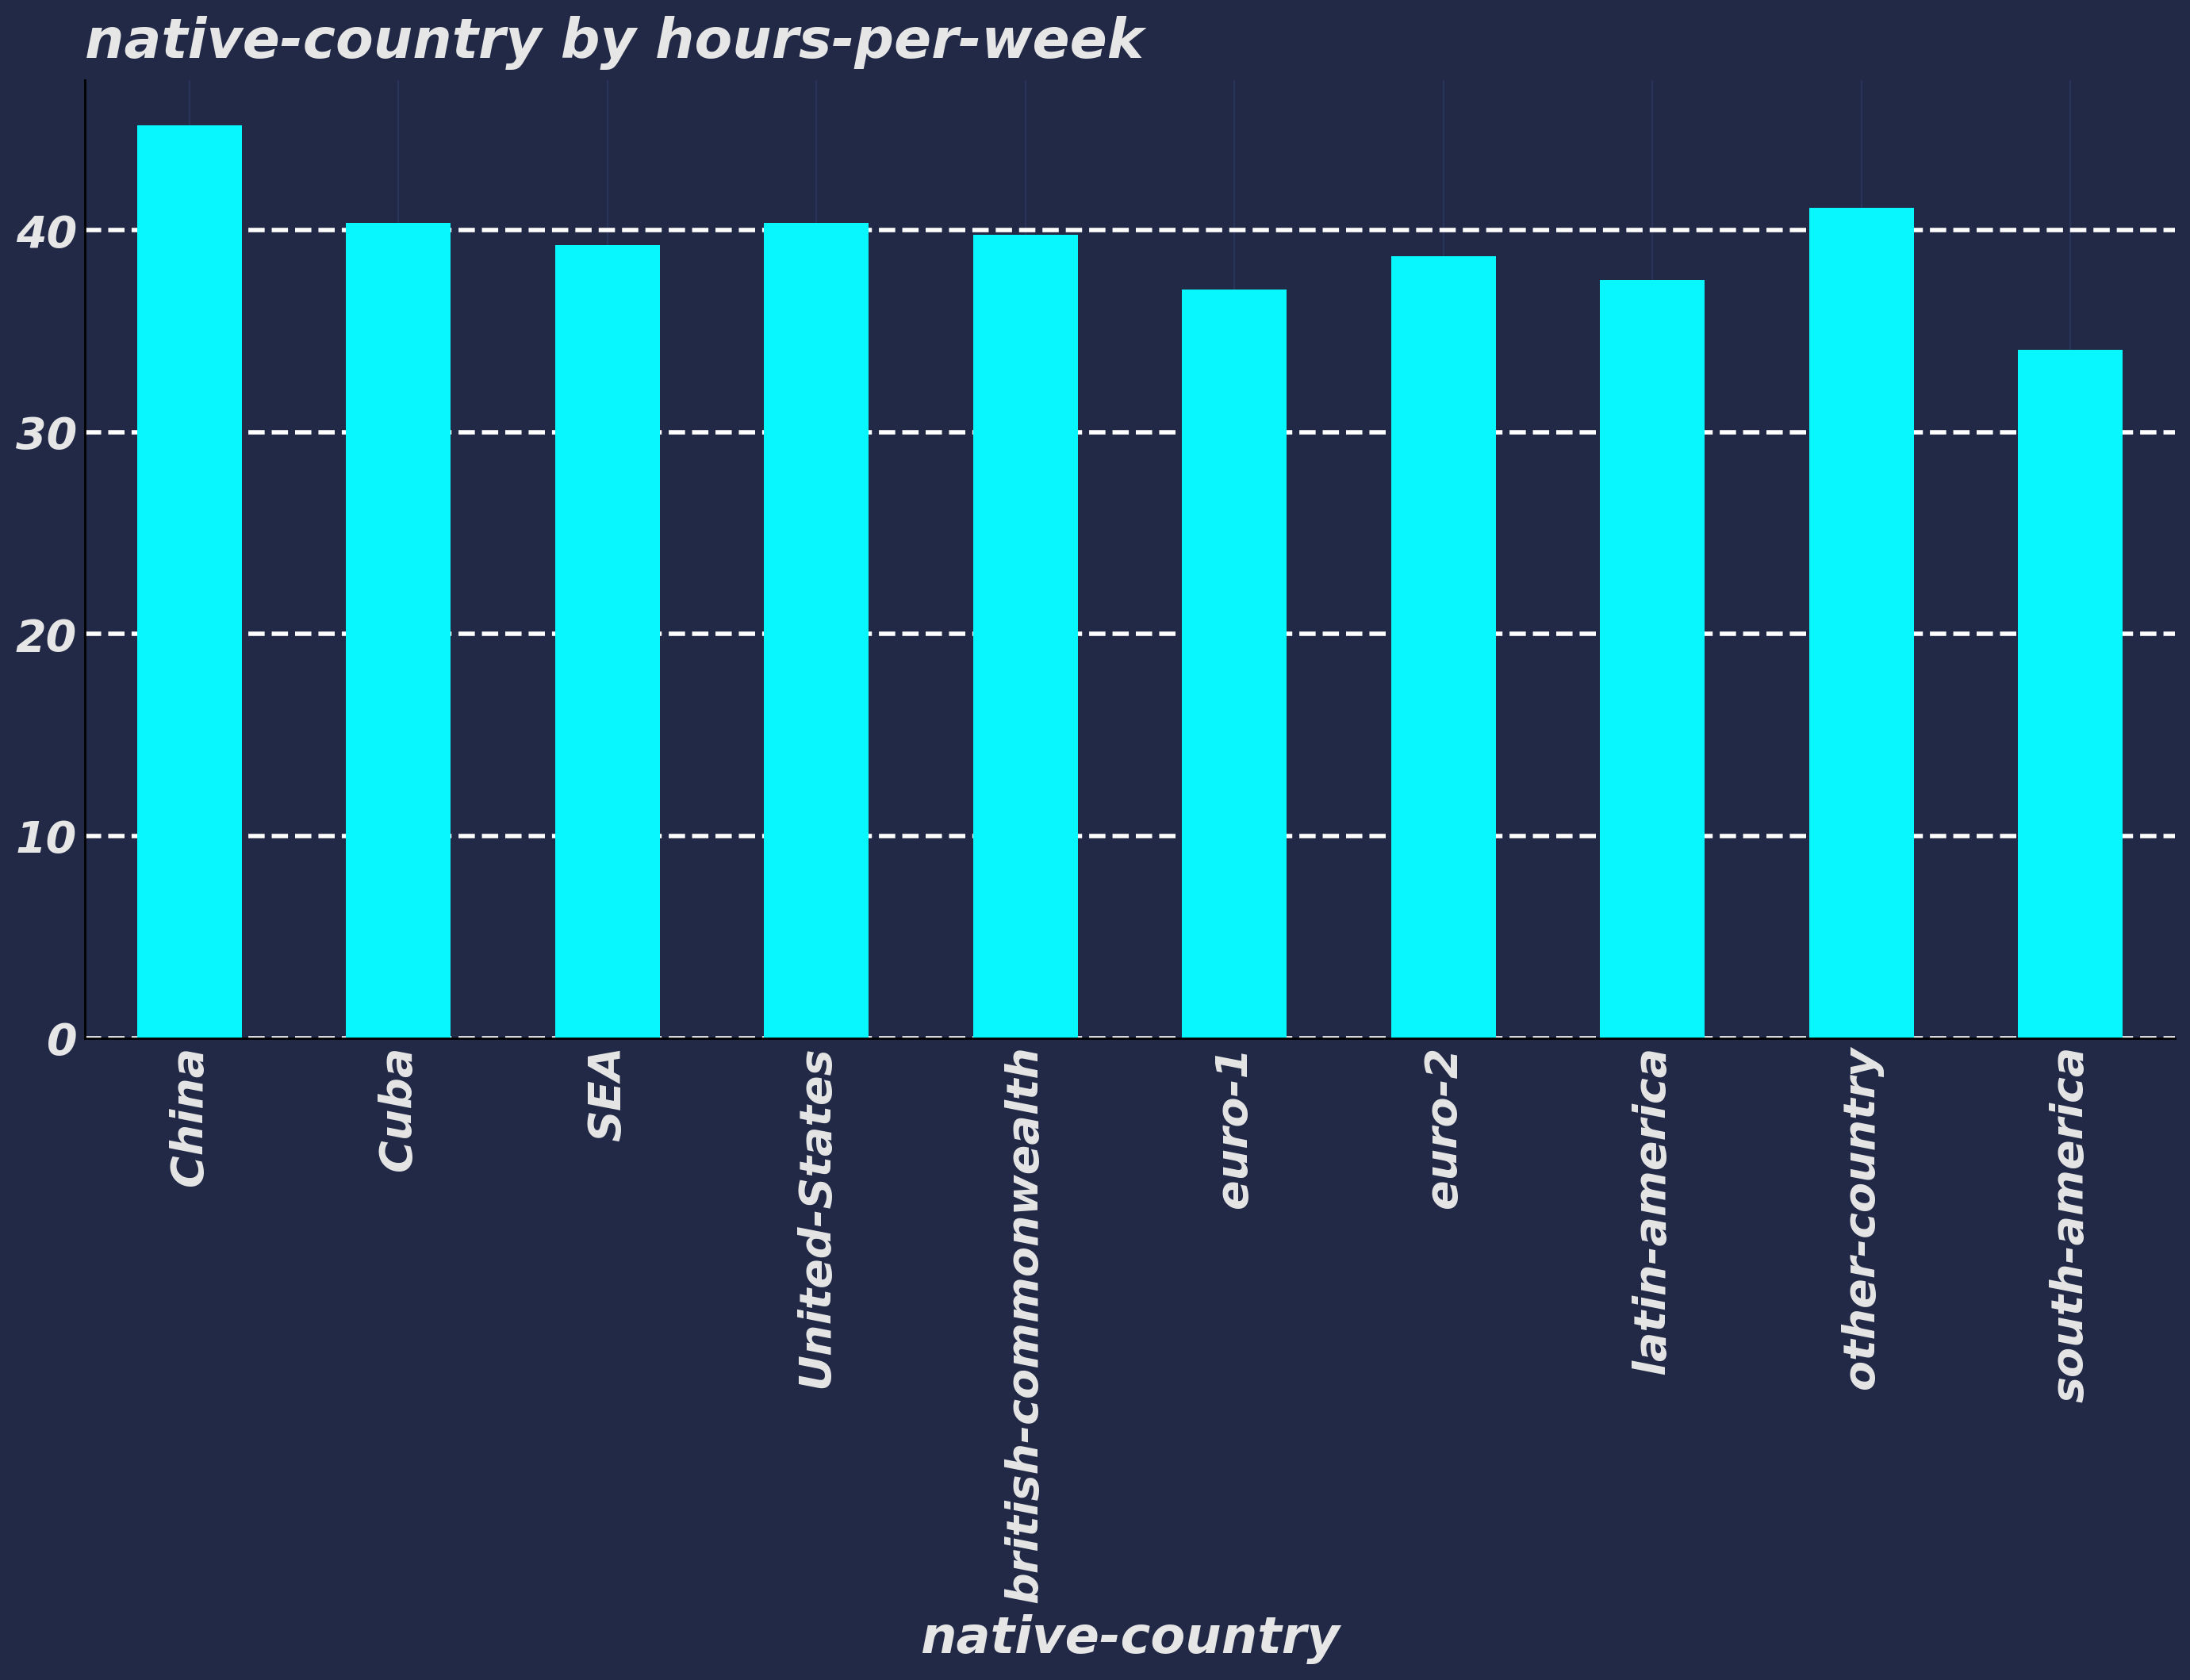

In [53]:
plt.figure(figsize=(17,8))

train.groupby(test_country)["hours-per-week"].mean().plot(kind="bar") 
plt.grid(axis="y",linestyle="--",linewidth=2,color="white")
plt.title("native-country by hours-per-week") 

In [16]:
for i in [train,test]:
    i["native-country"] = i["native-country"].replace(country) 

Text(0.0, 1.0, 'native-country by hours-per-week')

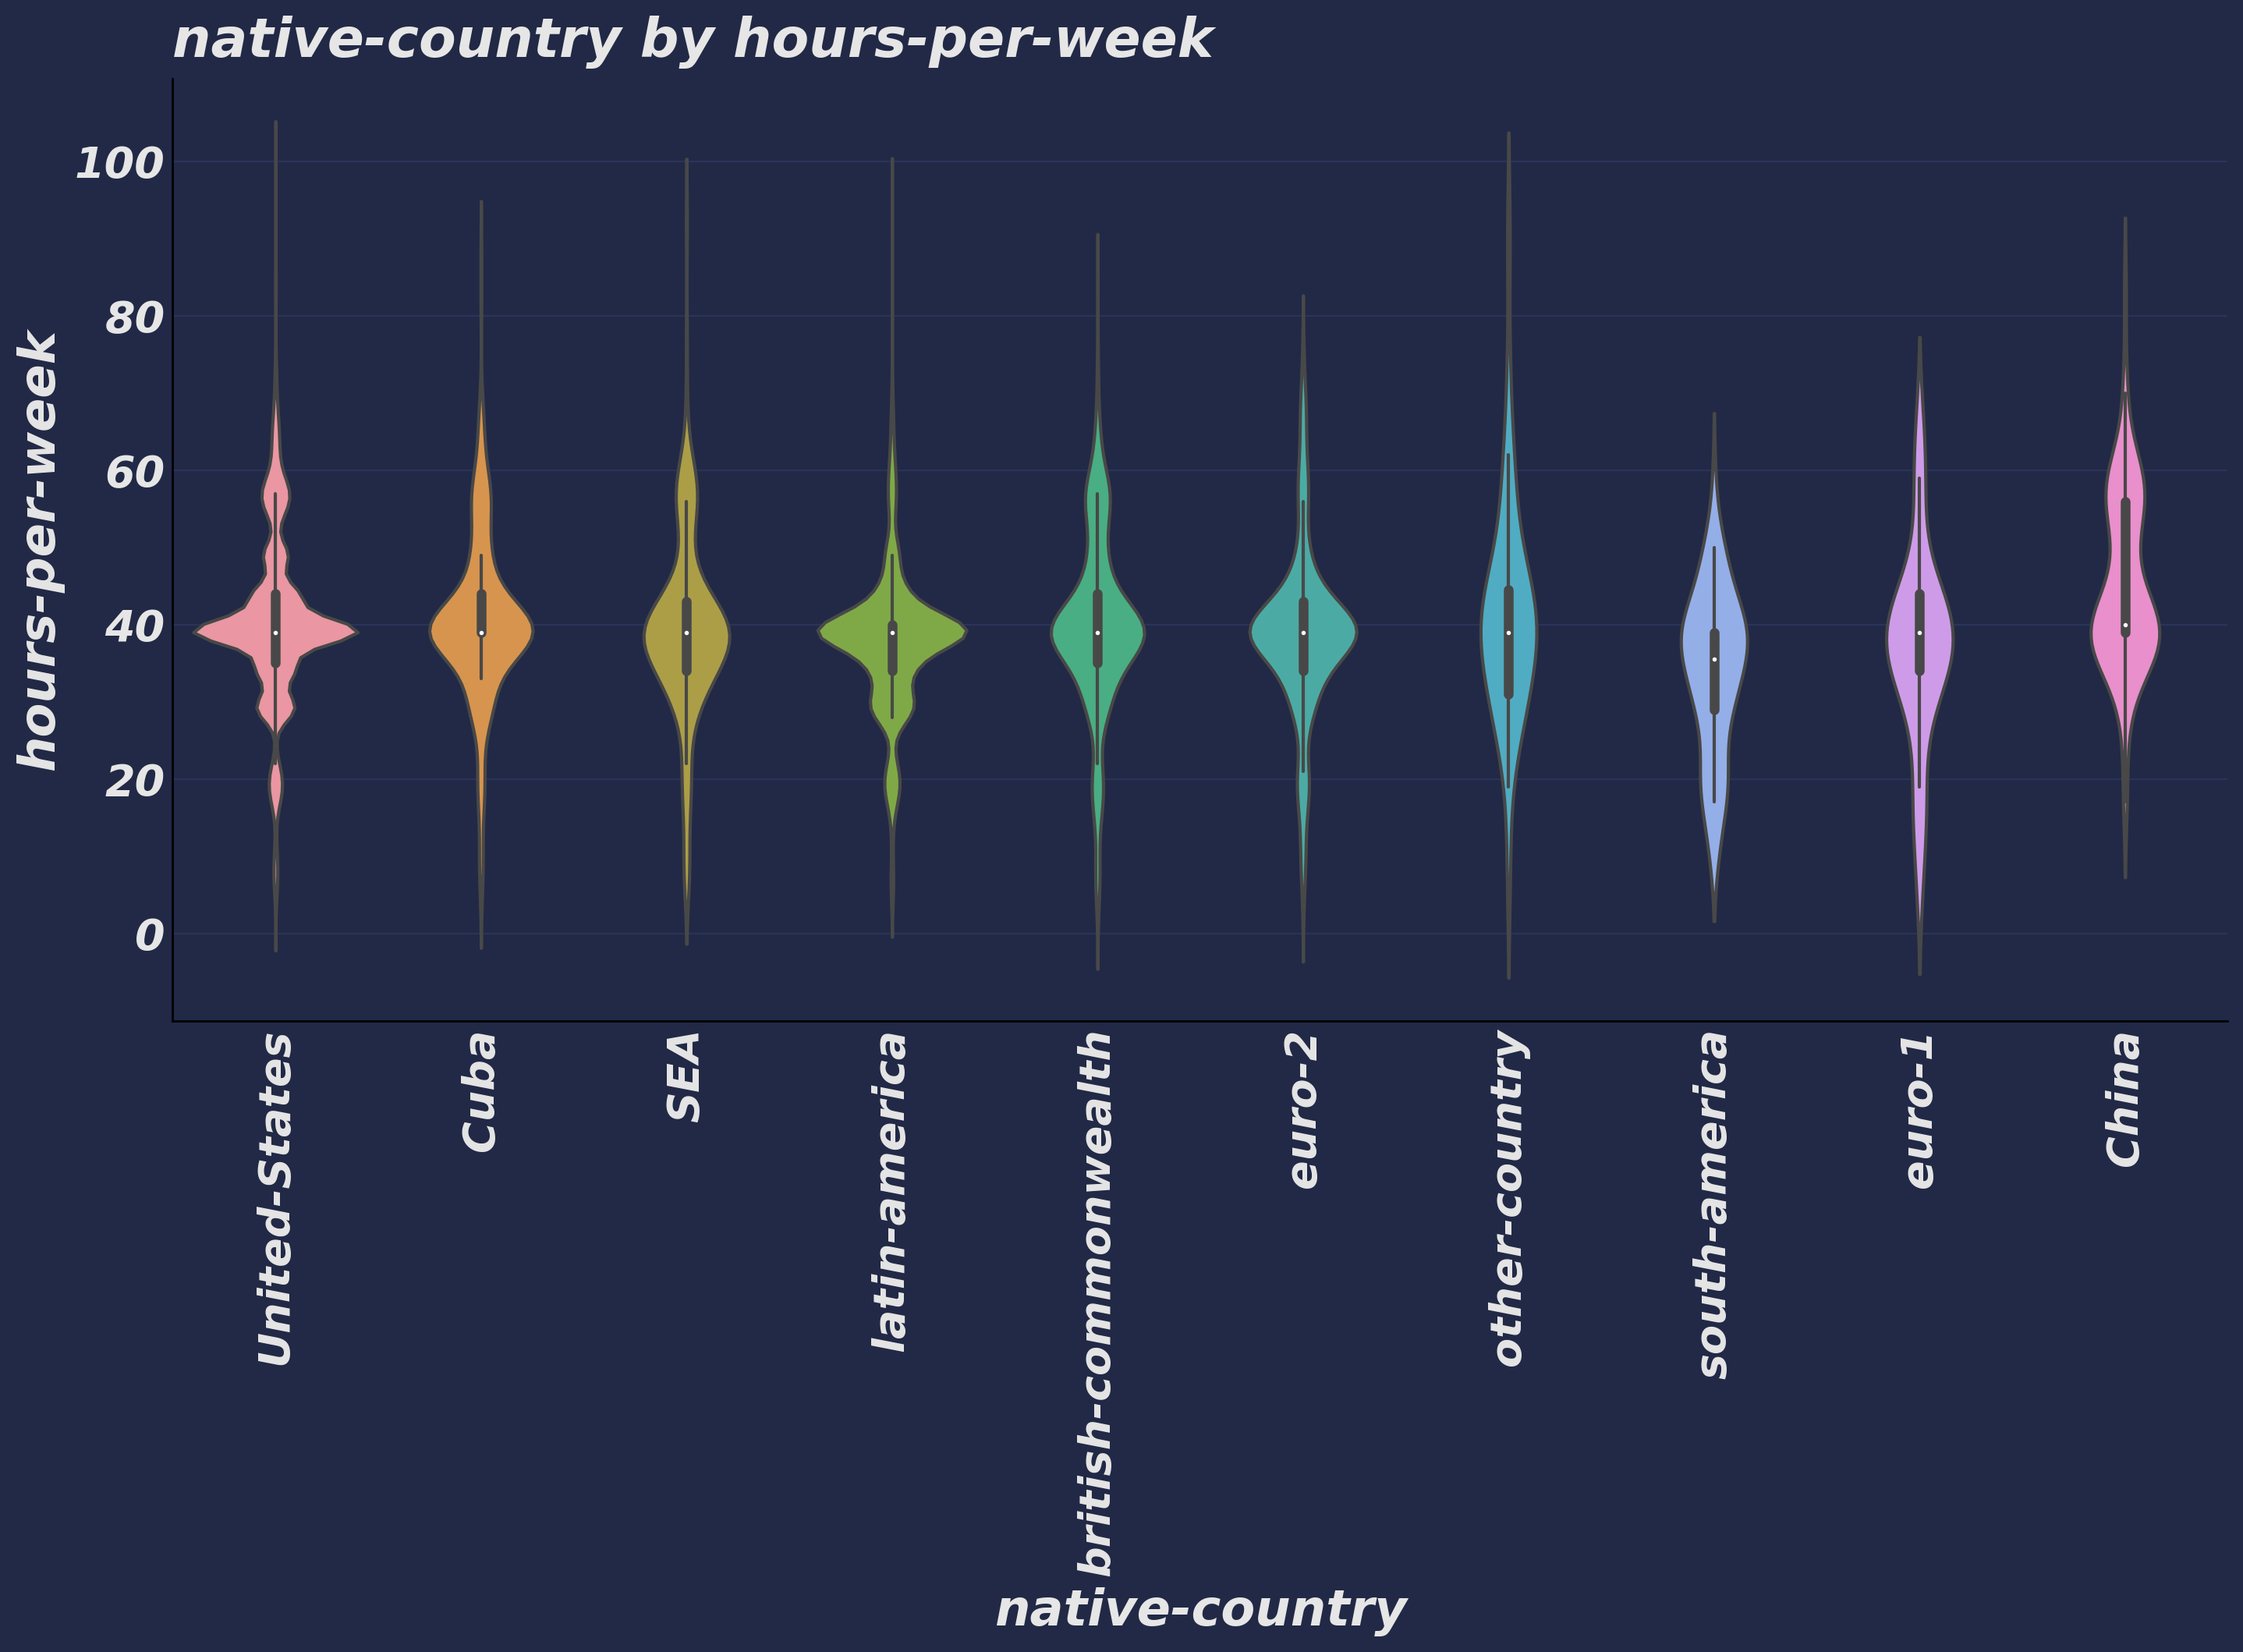

In [59]:
plt.figure(figsize=(17,8))
sns.violinplot(x=train["native-country"],y=train["hours-per-week"])
plt.xticks(rotation=90)
plt.title("native-country by hours-per-week")

In [ ]:
#income

In [60]:
train.income.value_counts()

<=50K    13517
>50K      5427
Name: income, dtype: int64

In [62]:
train.groupby("income")["hours-per-week"].describe()

count       mean        std  min   25%   50%   75%    max
income                                                             
<=50K   13517.0  38.429607  11.046440  1.0  34.0  39.0  42.0   99.0
>50K     5427.0  44.327805  10.162319  2.0  39.0  40.0  49.0  102.0

Text(0.0, 1.0, 'hours-per-week by income')

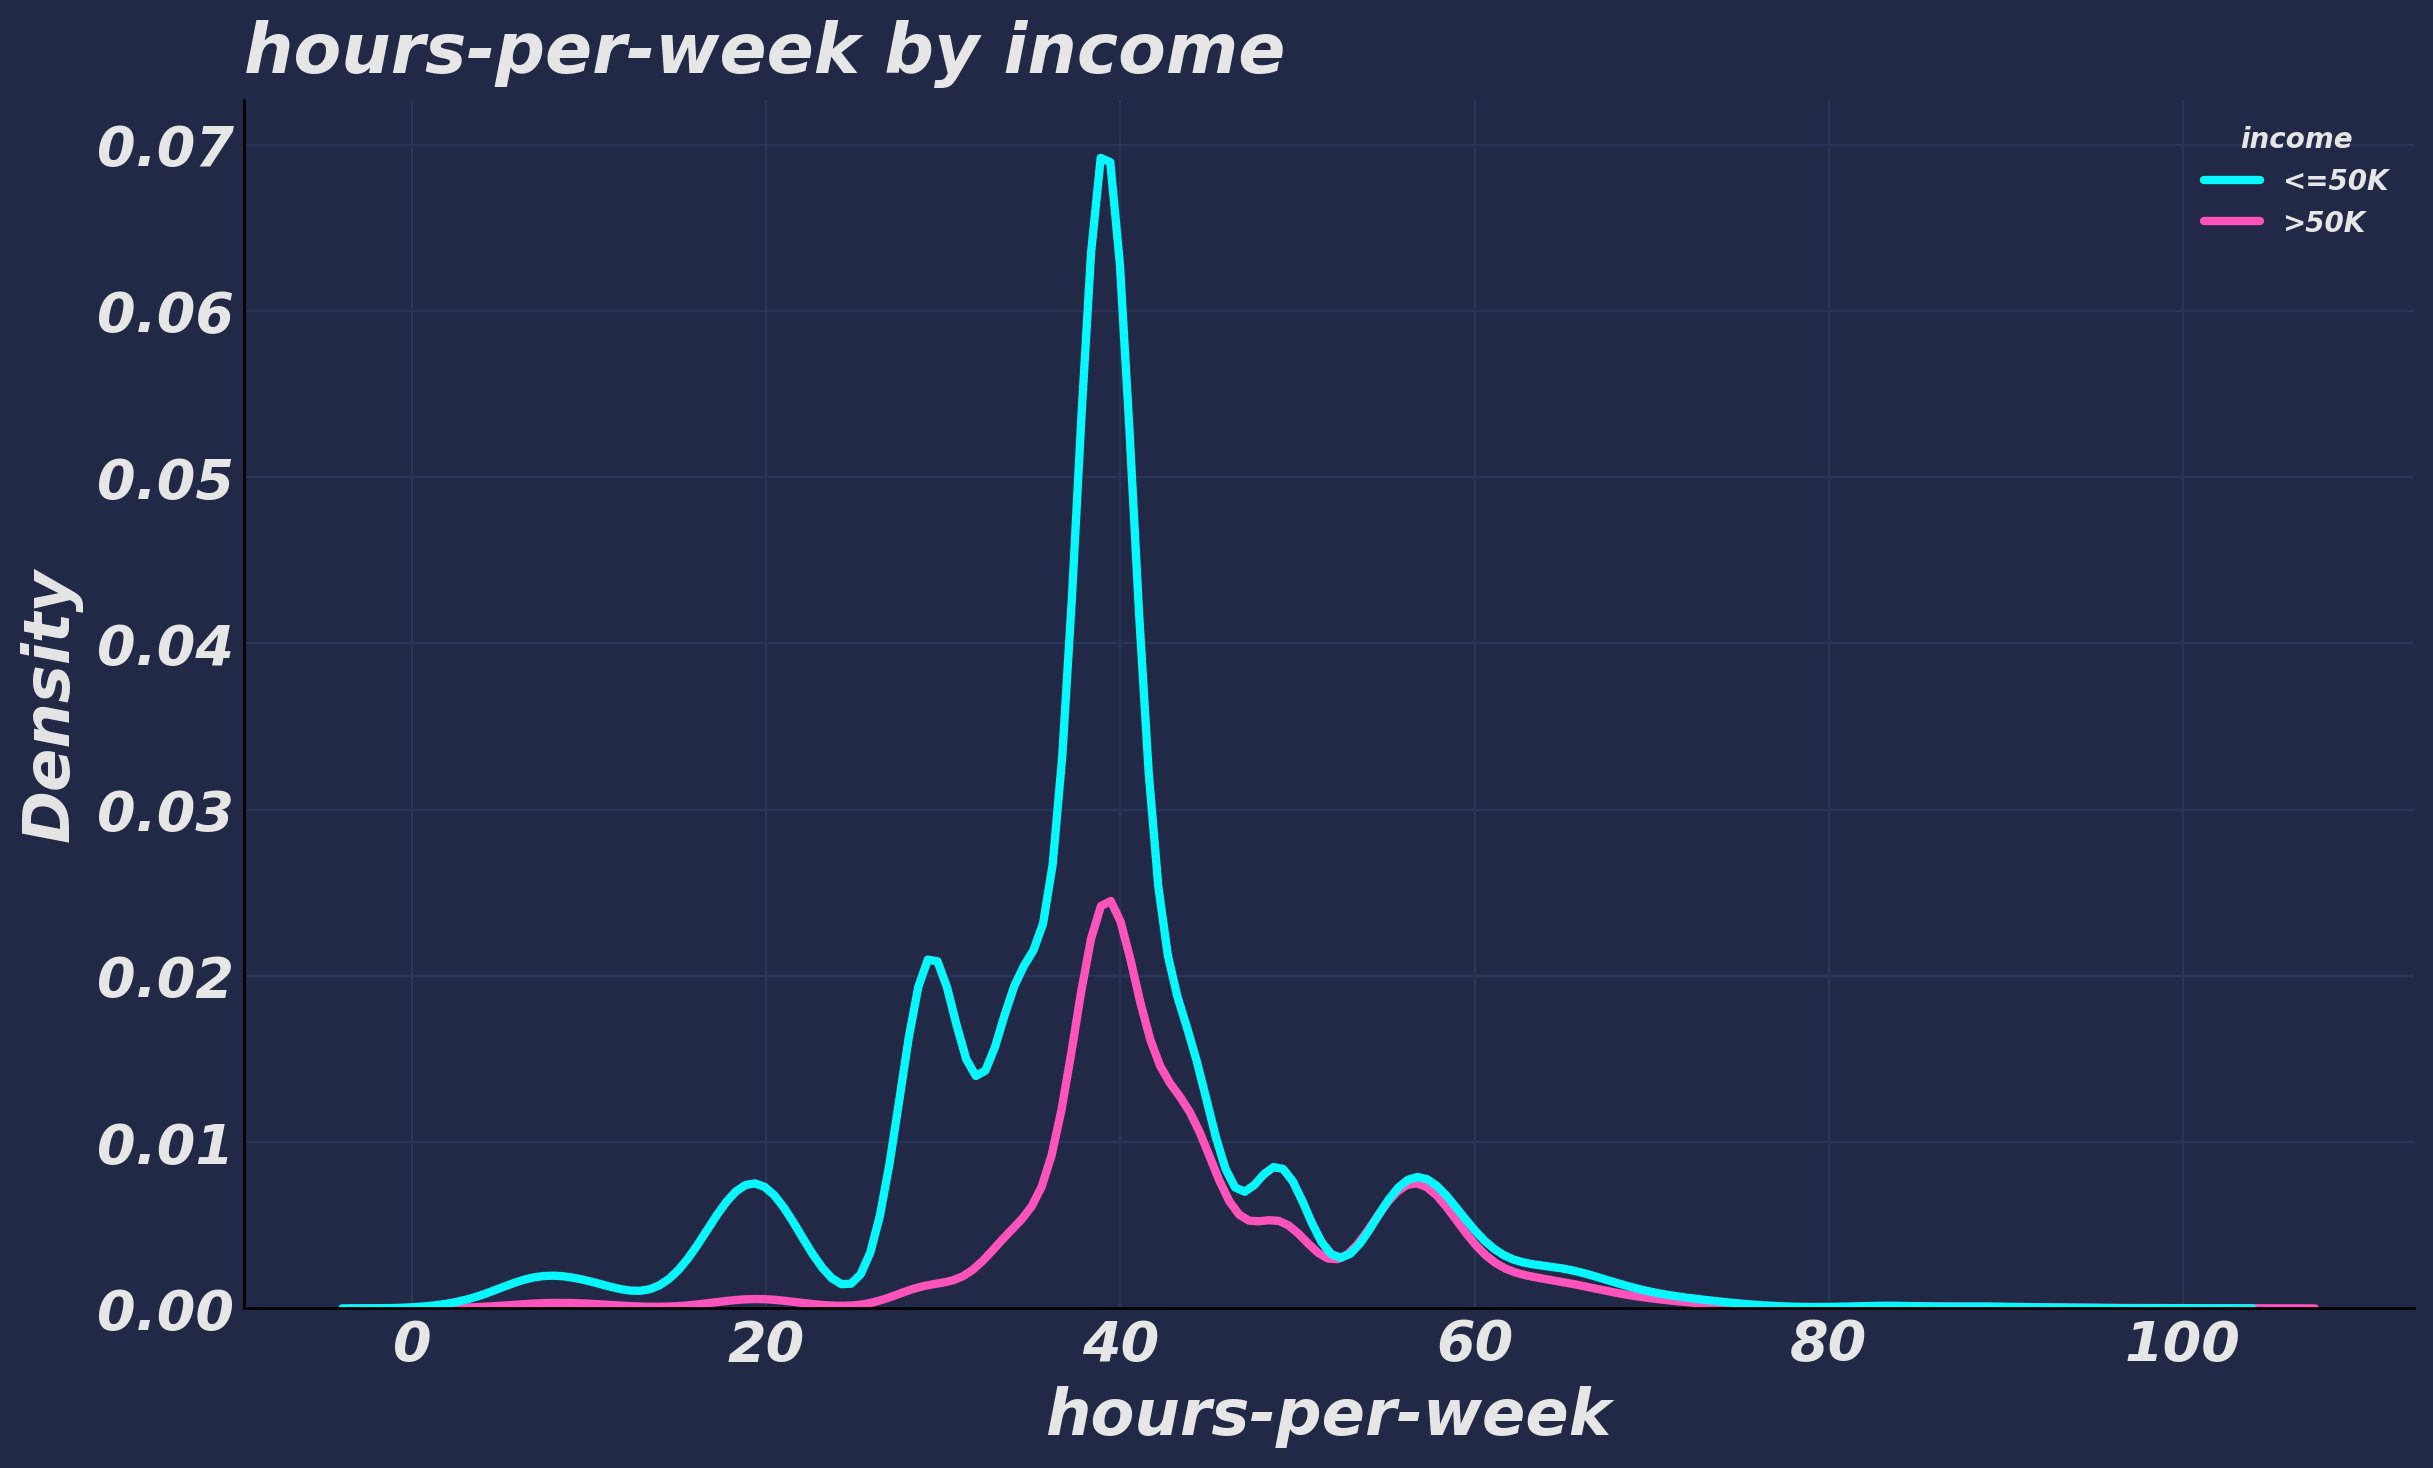

In [63]:
plt.figure(figsize=(14,8))

sns.kdeplot(train["hours-per-week"], hue=train.income, linewidth=3) 
plt.title("hours-per-week by income") 

In [ ]:
#numerical features


In [66]:
numer.describe() 

age         fnlwgt  education-num  capital-gain  capital-loss  \
count  18944.000000   18944.000000   18944.000000  18944.000000  18944.000000   
mean      39.266470  164292.035156       9.479043    577.476510     33.082823   
std       13.395878   93425.986084       2.830047   2414.473217    248.521486   
min       14.000000    8019.000000       2.000000    -58.000000     -2.000000   
25%       28.000000   98530.750000       8.000000     -5.000000      0.000000   
50%       40.000000  152895.500000       9.000000      5.000000      0.000000   
75%       47.000000  215541.000000      12.000000     17.000000      0.000000   
max       99.000000  772988.000000      16.000000  16193.000000   2437.000000   

       hours-per-week  
count    18944.000000  
mean        40.119299  
std         11.124649  
min          1.000000  
25%         35.000000  
50%         39.000000  
75%         44.000000  
max        102.000000

In [ ]:
#plot all 

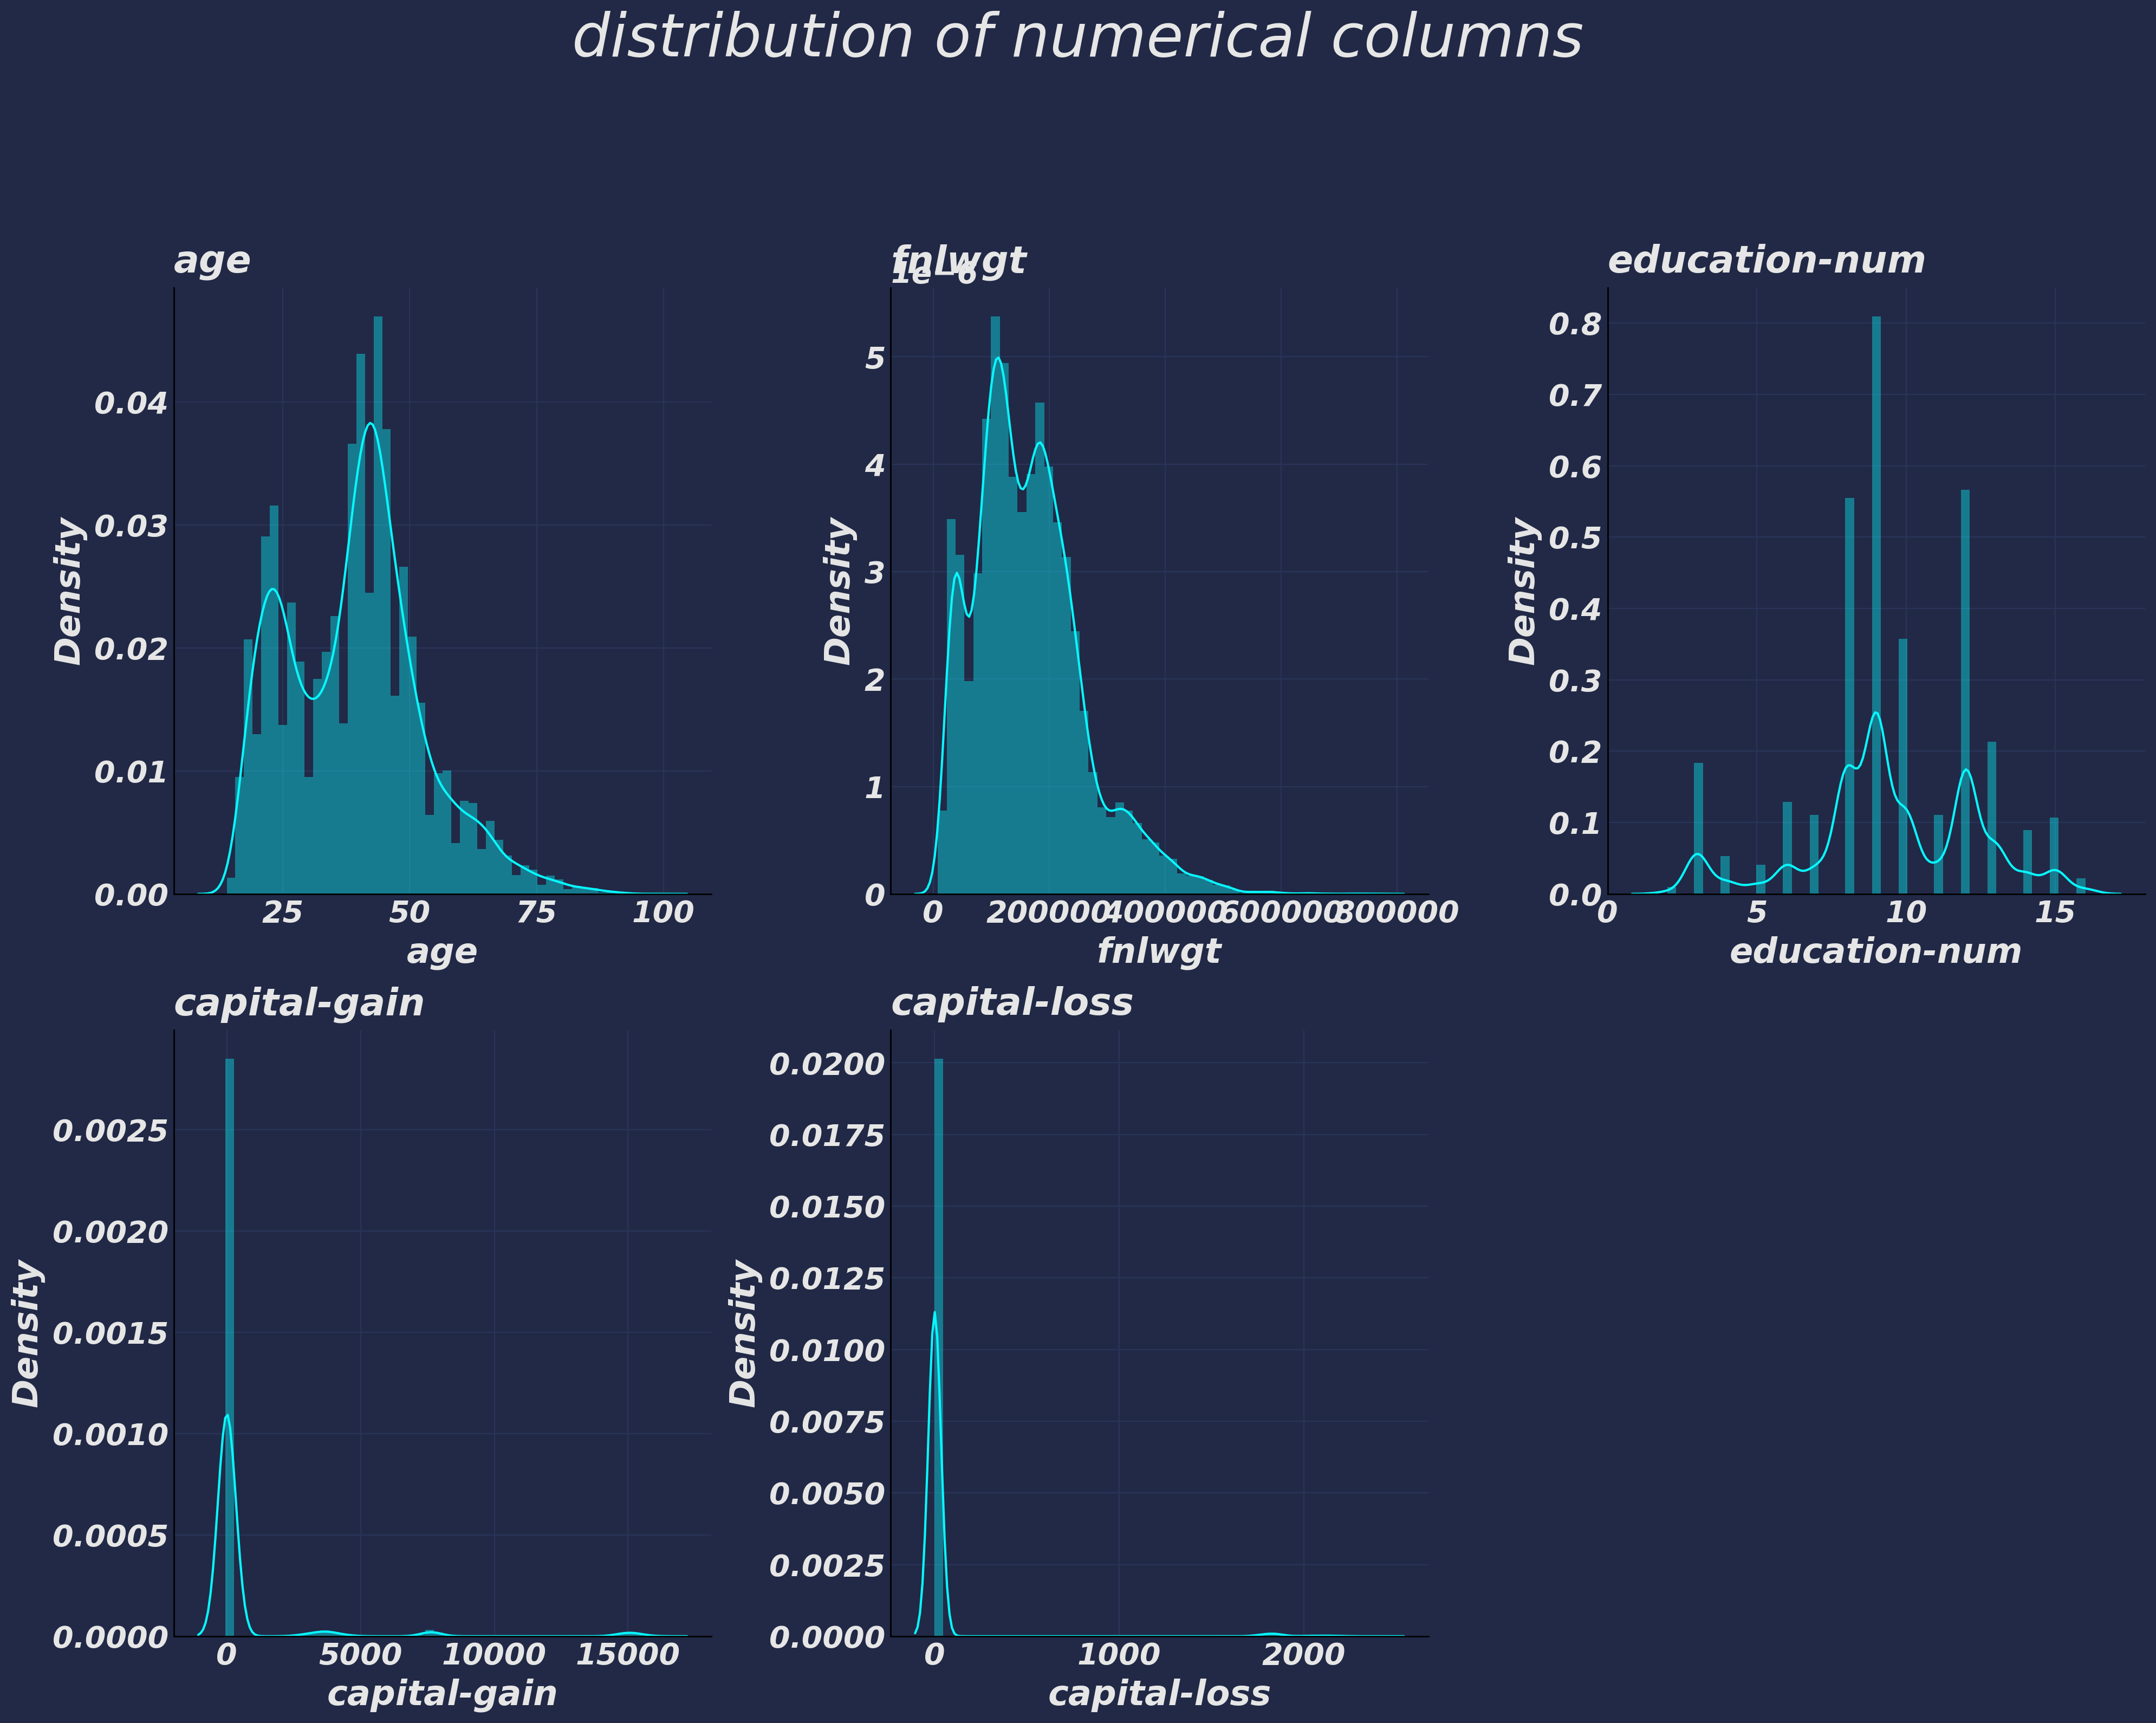

In [75]:
plt.figure(figsize=(20,20))

for i,j in enumerate(numer.iloc[:,:-1].columns):
    plt.subplot(3, 3, i+1)
    
    sns.distplot(train[j])
    plt.title(j)
    plt.tight_layout()
plt.suptitle("distribution of numerical columns",size=40, y=1.1) 
plt.show() 

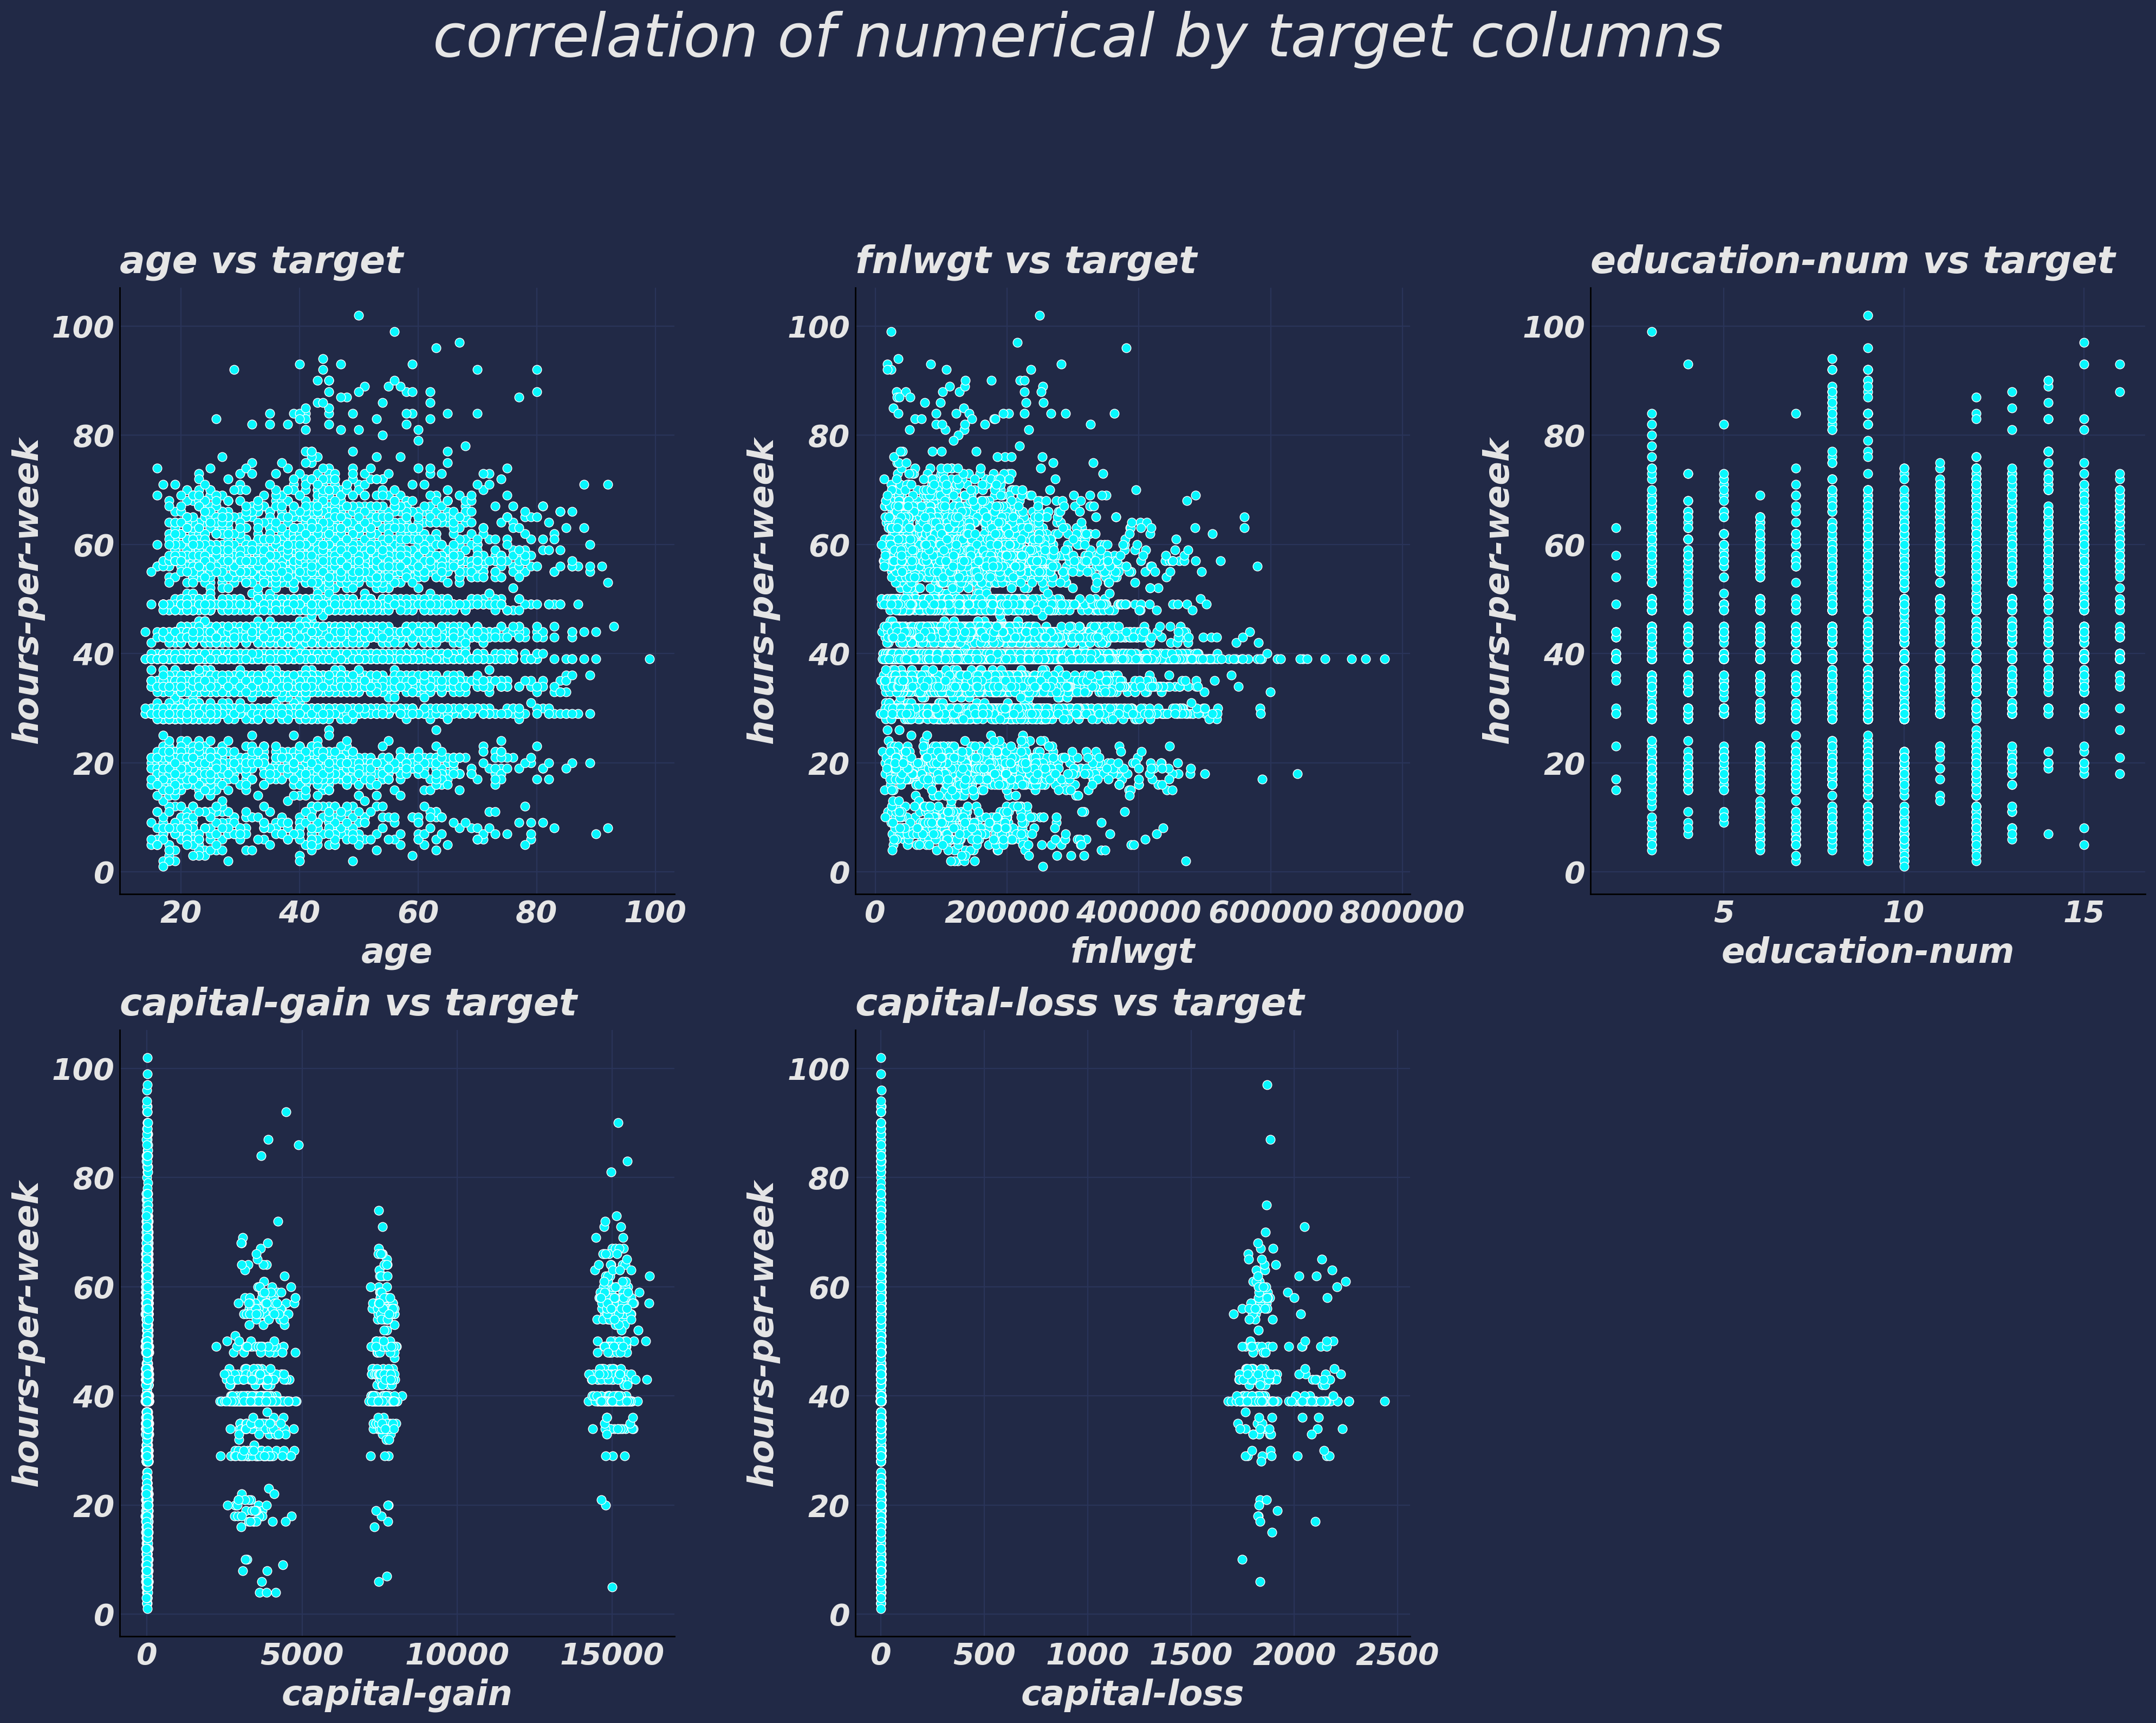

In [79]:
plt.figure(figsize=(20,20))

for i,j in enumerate(numer.iloc[:,:-1].columns):
    plt.subplot(3, 3, i+1)
    
    sns.scatterplot(x = train[j], y = train["hours-per-week"])
    plt.title(j + " vs target")
    plt.tight_layout()
plt.suptitle("correlation of numerical by target columns",size=40, y=1.1) 
plt.show() 

In [ ]:
#age

In [18]:
age_bins = [0,25,50,75,100]
age_labels = ["0-25","25-50","50-75","75-100"]
test_age = pd.cut(train.age, bins=age_bins,labels=age_labels)
test_age.value_counts() 

25-50     11909
0-25       3829
50-75      3011
75-100      195
Name: age, dtype: int64

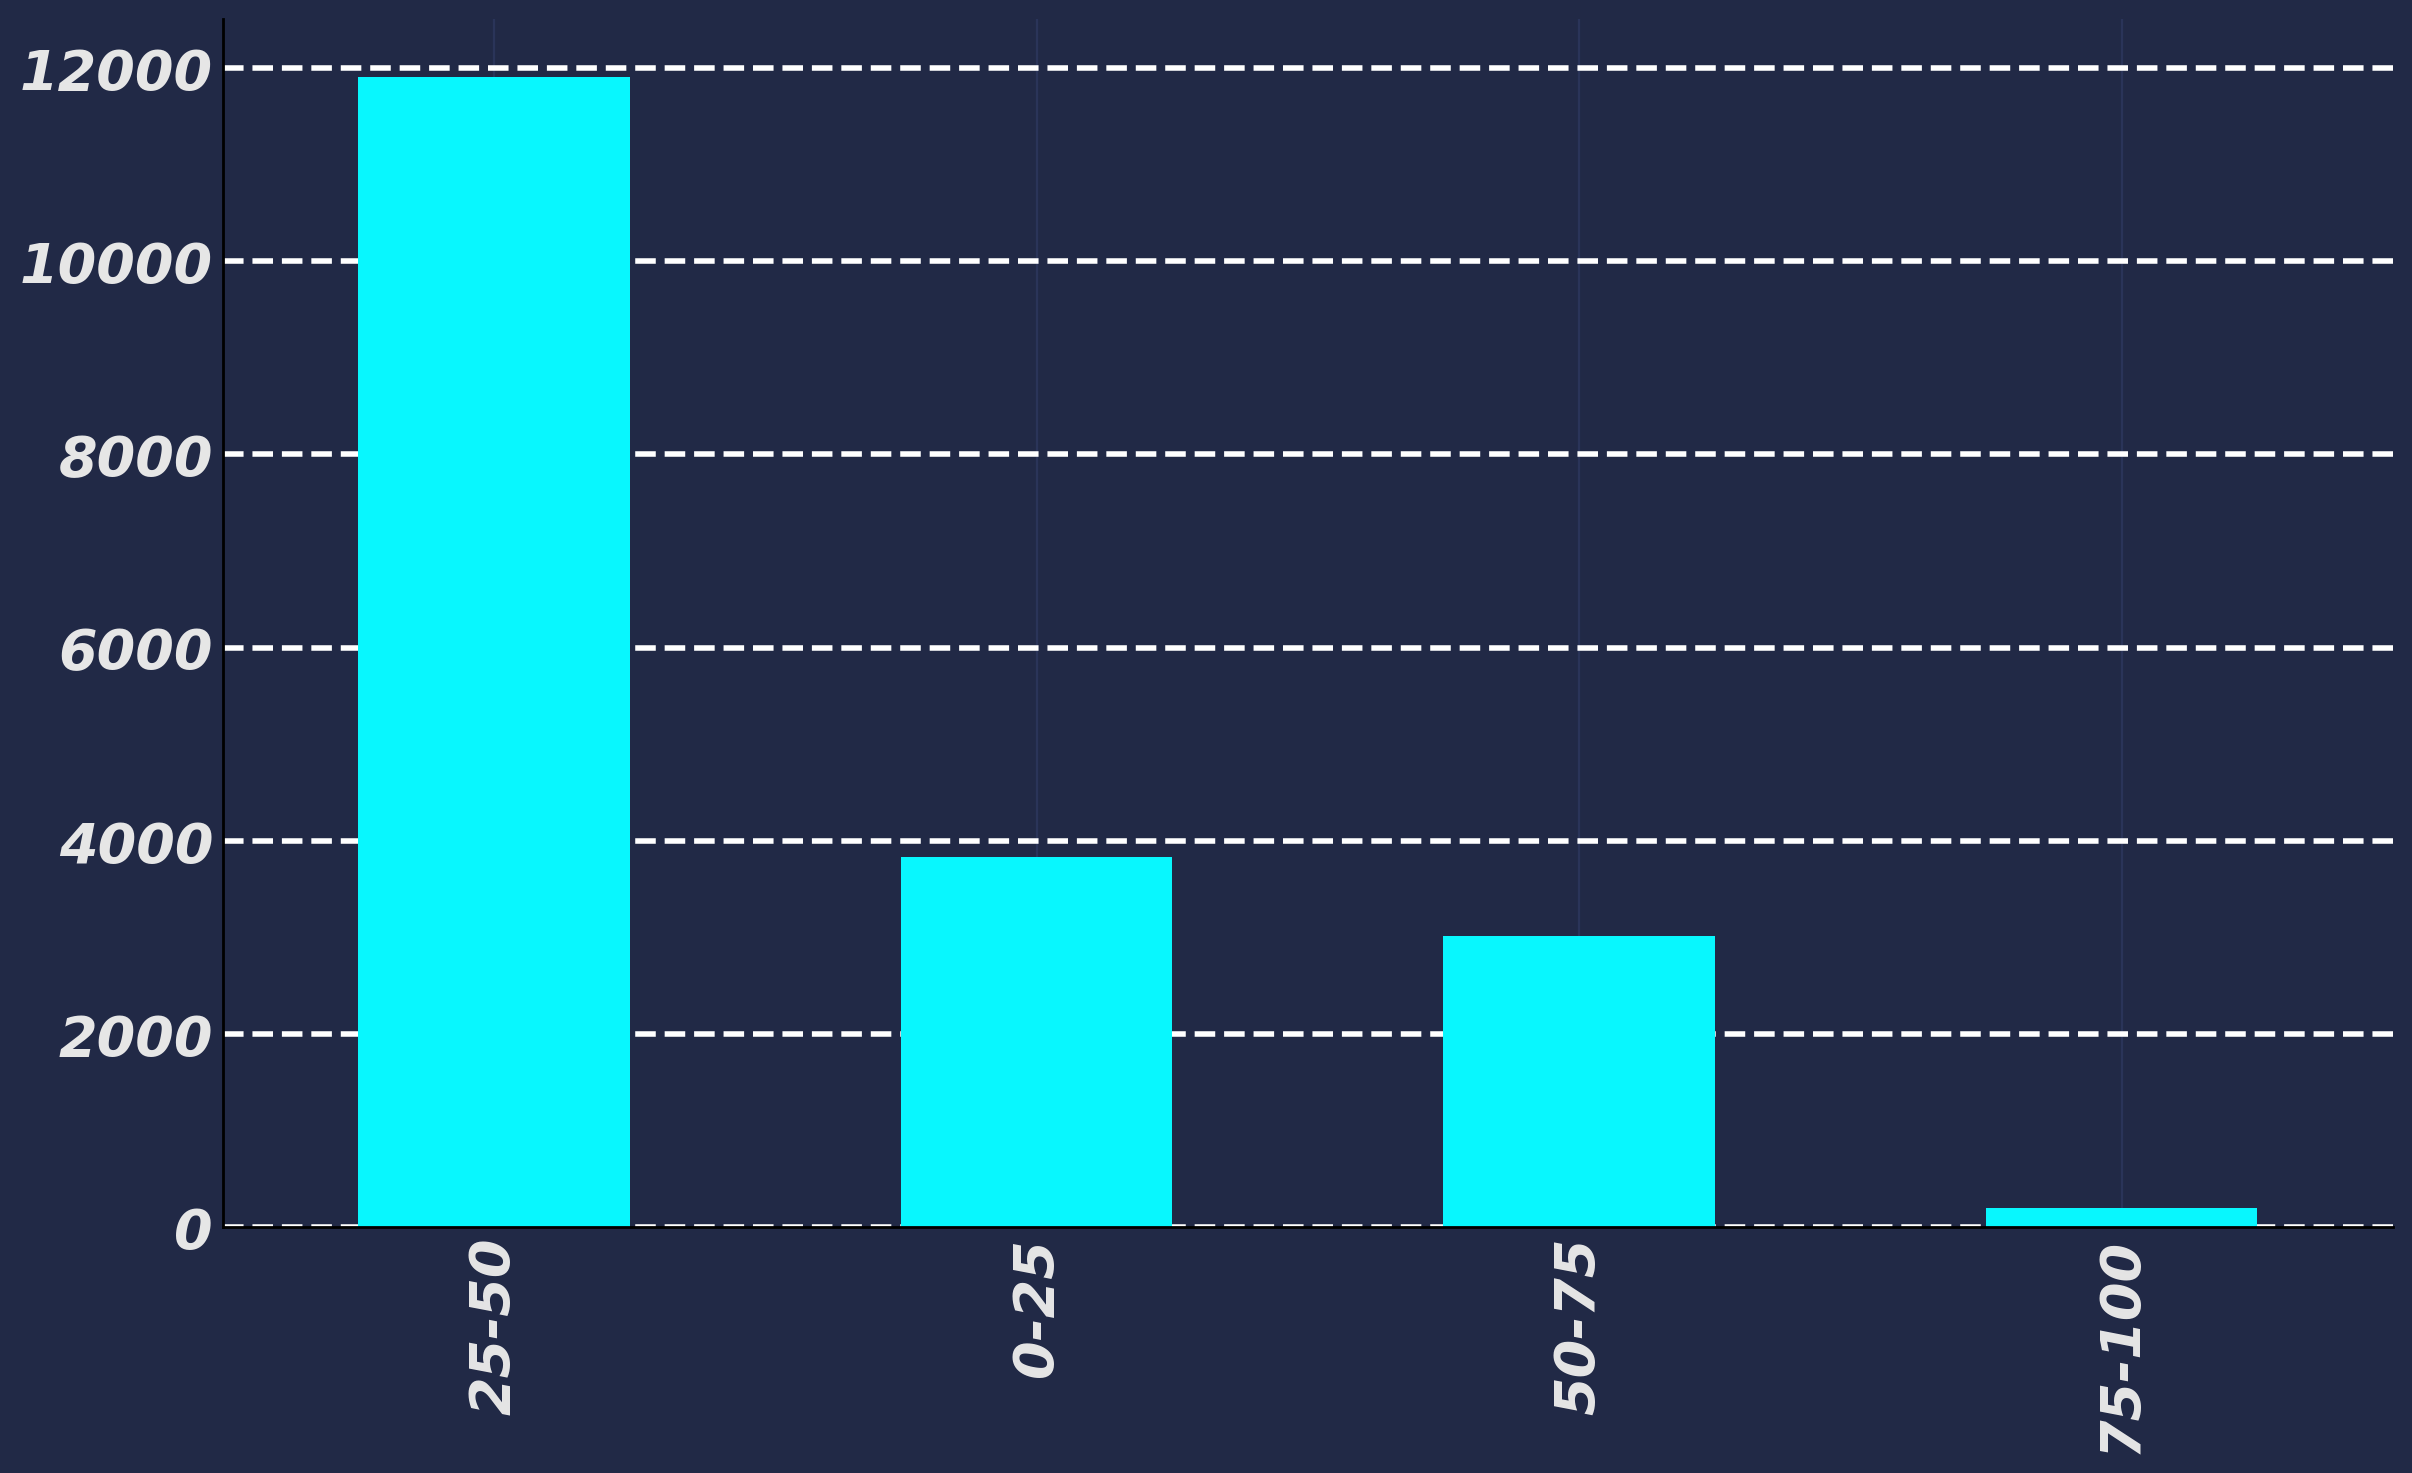

In [24]:
plt.figure(figsize=(14,8))

test_age.value_counts().plot(kind="bar")
plt.grid(axis="y", linestyle ="--", linewidth=2, color="white") 

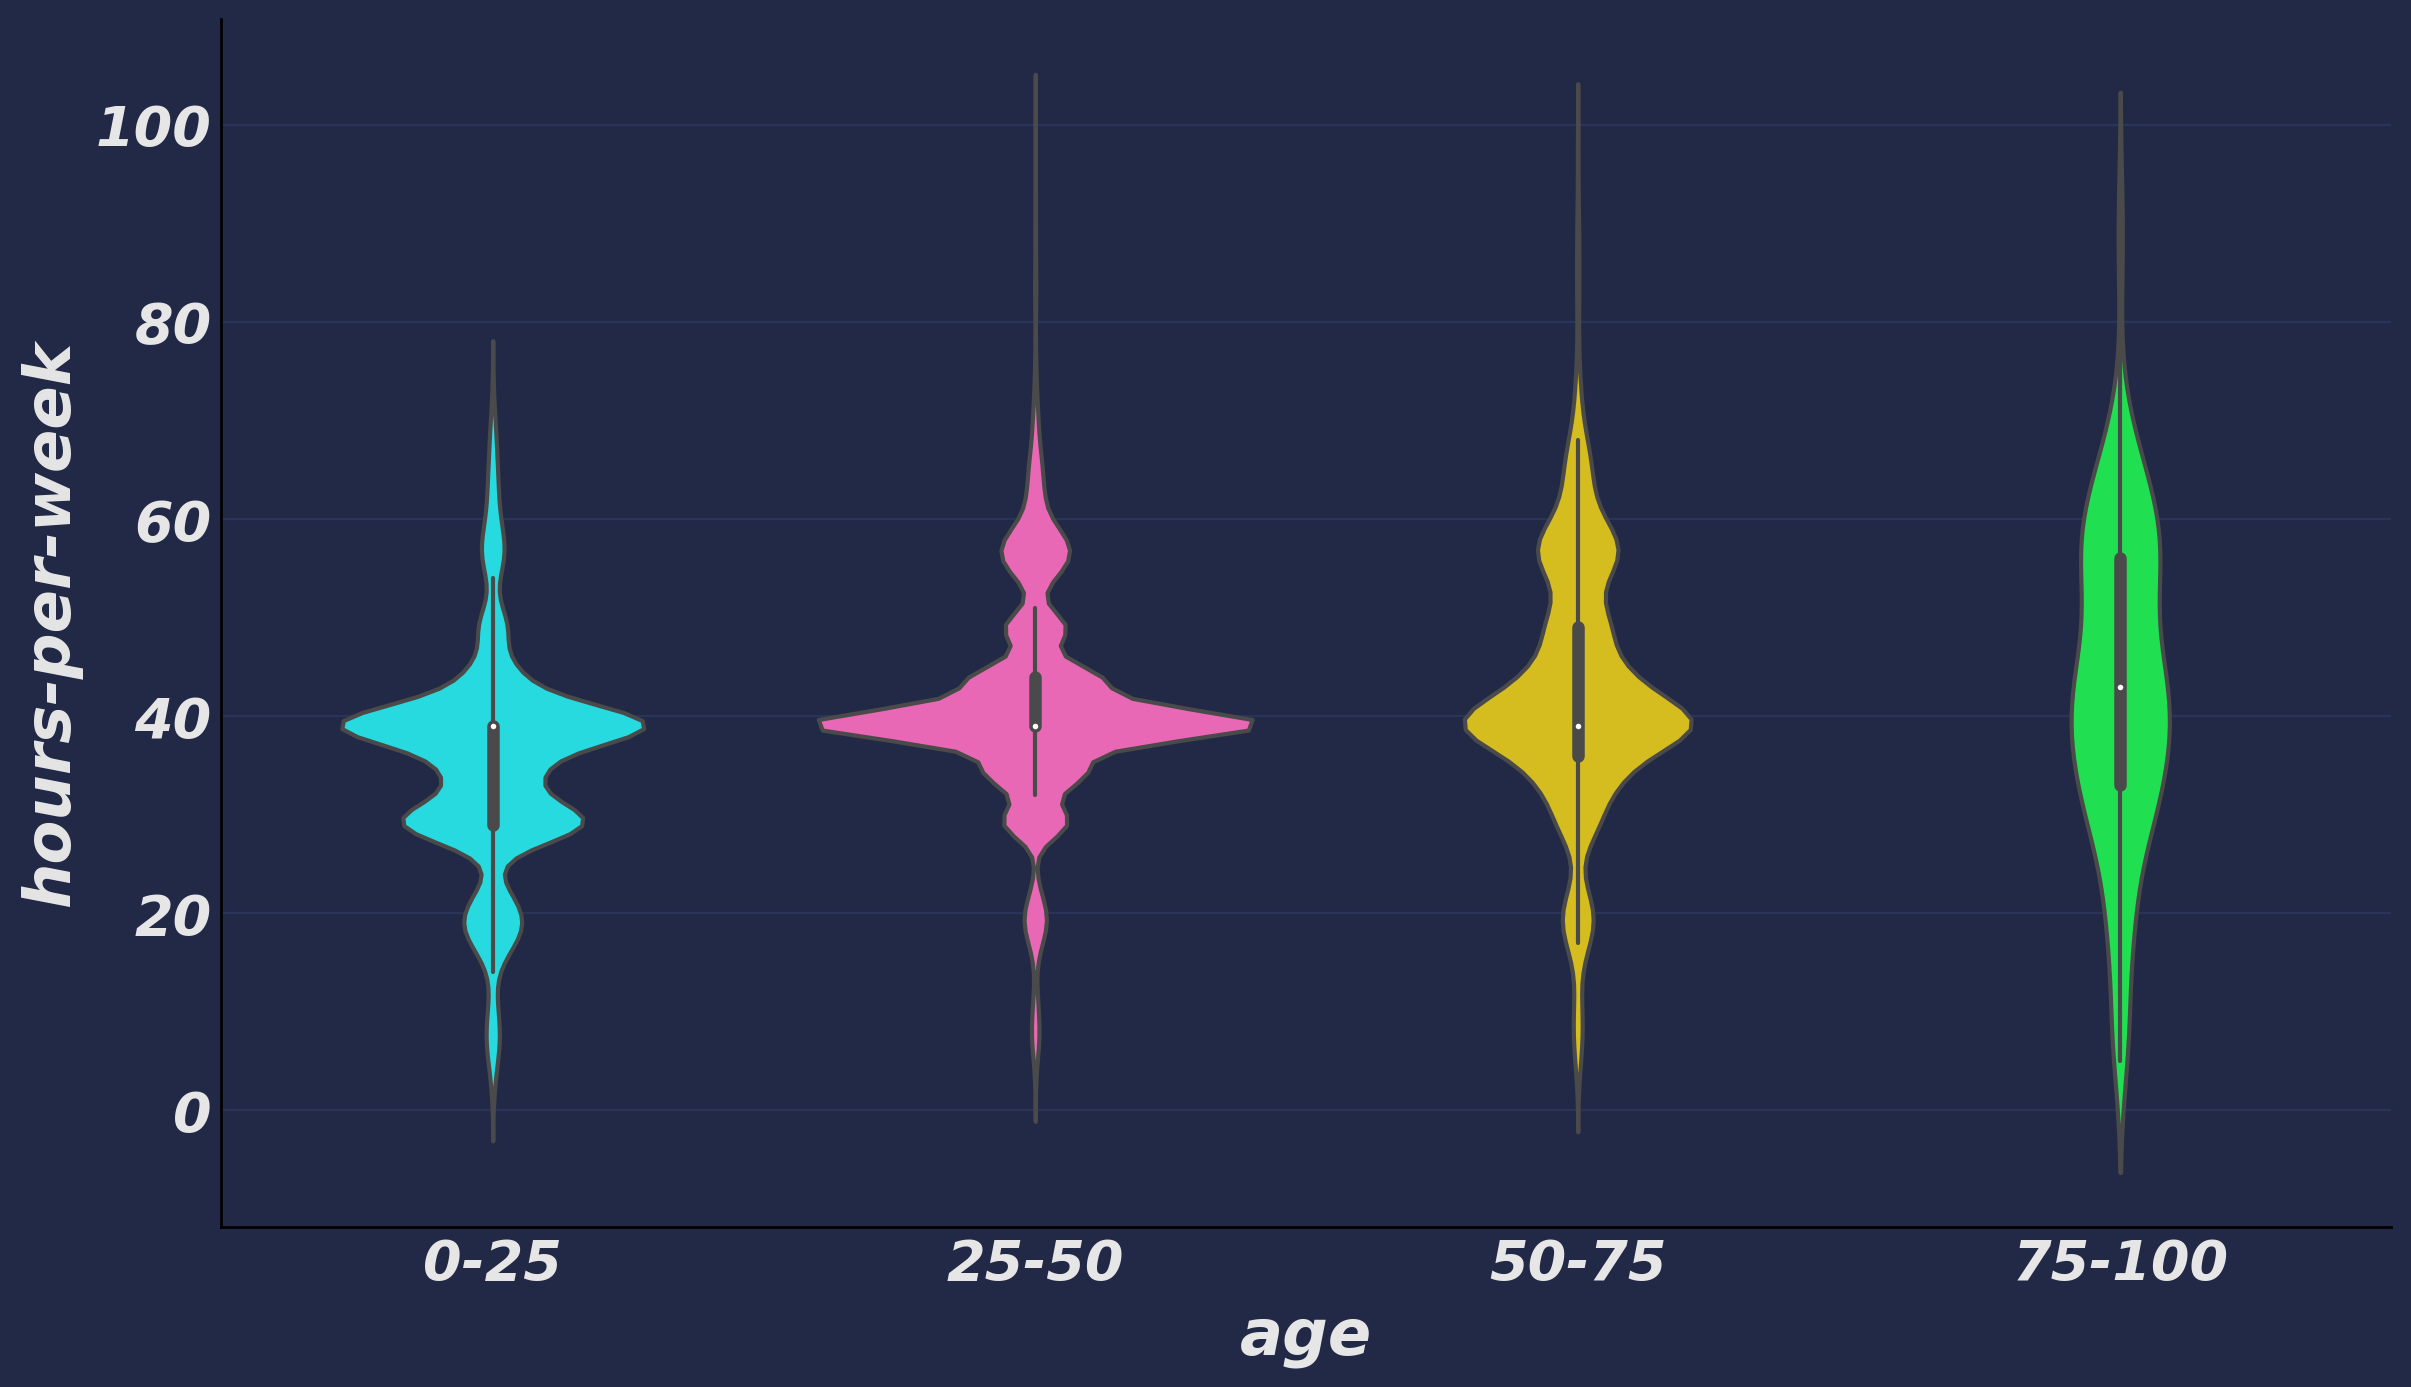

In [40]:
plt.figure(figsize=(14,8))

sns.violinplot(x=test_age, y=train["hours-per-week"]) 

In [41]:
train.groupby(test_age)["hours-per-week"].mean().to_frame()

hours-per-week
age                   
0-25         35.328284
25-50        41.005794
50-75        42.515775
75-100       43.051282

In [19]:
for i in [train,test]:
    i["age_bins"] = pd.cut(i.age, bins=age_bins, labels=age_labels) 

In [ ]:
#capital gain and loss 

In [20]:
capital = train[(train["capital-loss"] < 0) & (train["capital-gain"] < 0)]

In [22]:
capital[["capital-loss","capital-gain"]].sample(10) 

capital-loss  capital-gain
15213            -1            -3
17373            -1           -21
17788            -1           -17
1769             -1           -23
4804             -1           -23
12119            -1           -24
5232             -1            -9
11038            -1            -9
13992            -1           -15
7566             -1            -1

In [25]:
def capital(capital_data):
    if capital_data > 0:
        return "max"
    elif capital_data < 0:
        return "min"
    else: 
        return "none"
    return capital_data

In [26]:
cl = train["capital-loss"].apply(capital) 

In [27]:
cl.value_counts() 

none    17370
min       818
max       756
Name: capital-loss, dtype: int64

Text(0.0, 1.0, 'capital loss by hours-per-week')

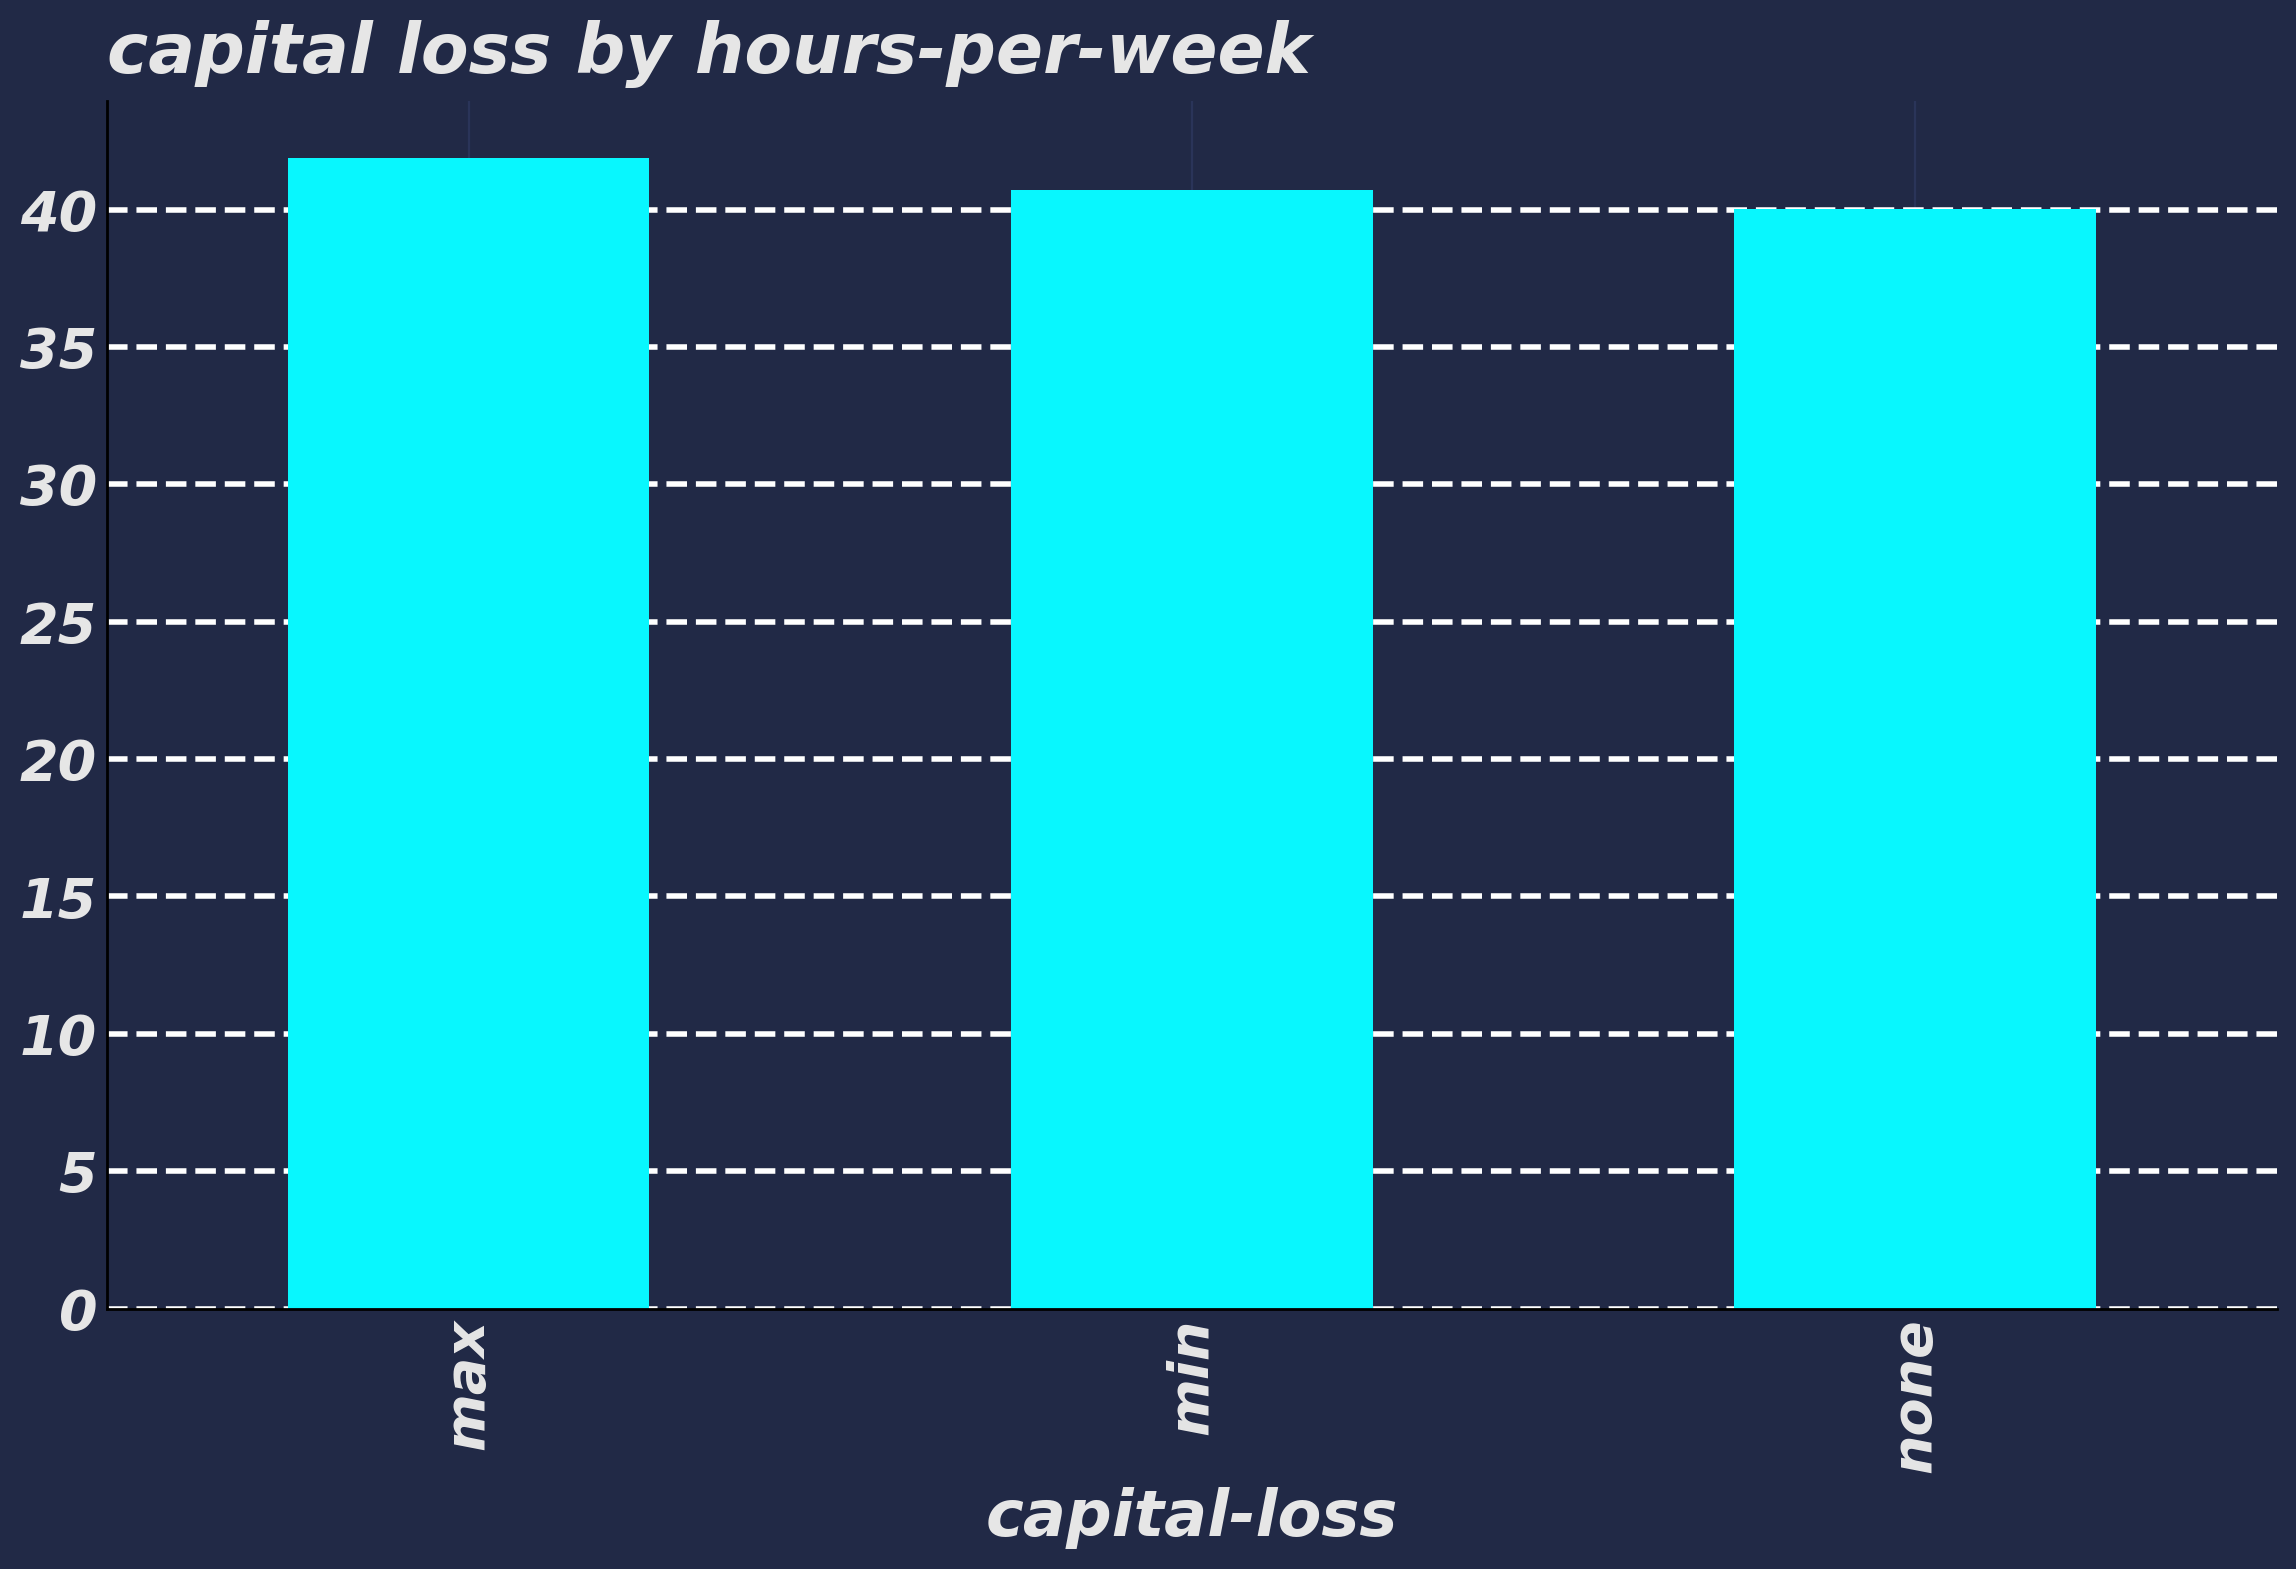

In [28]:
plt.figure(figsize=(14,8))

train.groupby(cl)["hours-per-week"].mean().plot(kind="bar")
plt.grid(axis="y", linestyle="--", linewidth=2, color="white")
plt.title("capital loss by hours-per-week")

In [32]:
cg = train["capital-gain"].apply(capital)

In [36]:
cg.value_counts()

max     11523
min      6557
none      864
Name: capital-gain, dtype: int64

Text(0.0, 1.0, 'capital gain by hours-per-week')

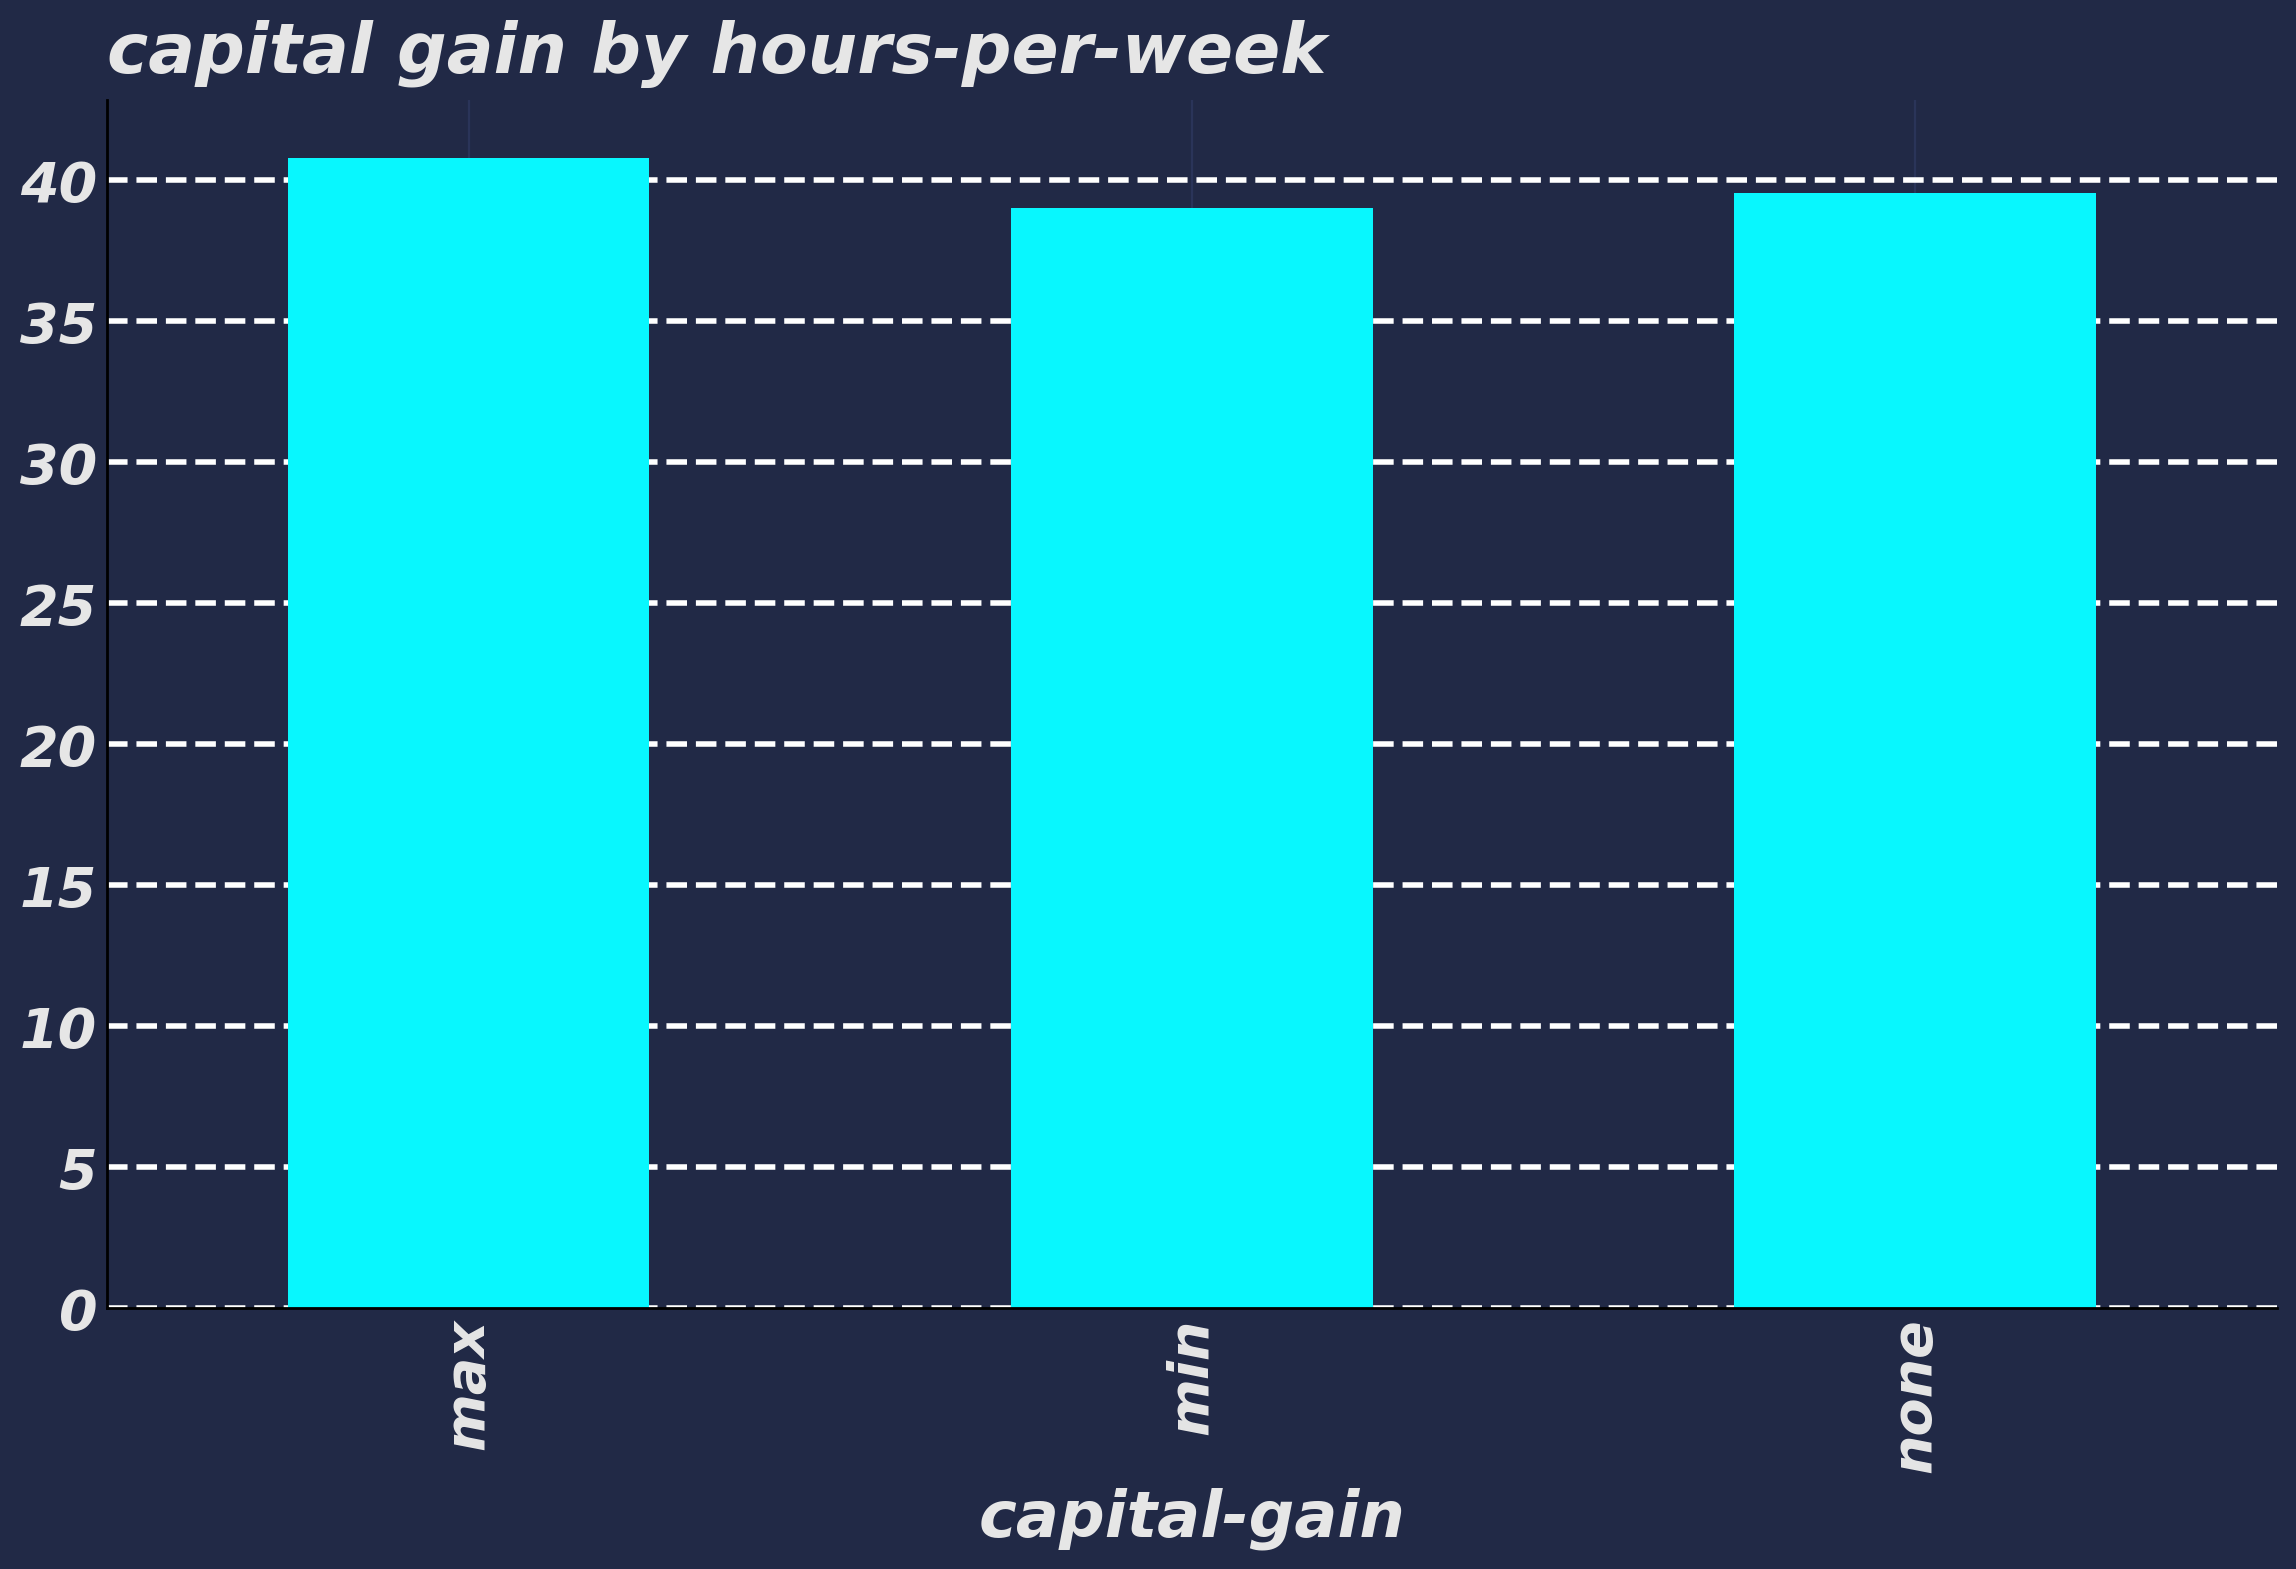

In [38]:
plt.figure(figsize=(14,8))

train.groupby(cg)["hours-per-week"].mean().plot(kind="bar")
plt.grid(axis="y", linestyle="--", linewidth=2, color="white")
plt.title("capital gain by hours-per-week")

In [39]:
for i in [train,test]:
    i["capital-loss"] = i["capital-loss"].apply(capital) 
    i["capital-gain"] = i["capital-gain"].apply(capital) 

In [ ]:
#multivariat analysis

In [40]:
train.sample(10)

age workclass  fnlwgt     education  education-num marital-status  \
4954    25   Private   82601  Some-college             12  Never-married   
6768    42   Private  142172    associates             13    not-married   
17254   45  self_emp   23338       HS-grad              8        married   
11185   20   Private  304882      1st-12th              5  Never-married   
15900   38    to_gov  229201  Some-college              9    not-married   
9182    28   Private  130158     Bachelors             12    not-married   
4123    57   Private  145691      1st-12th              7        Widowed   
11842   46  self_emp  204044       HS-grad              9        married   
9944    26   Private  233307      1st-12th             13    not-married   
9850    43   Private  209655      1st-12th              7        married   

            occupation   relationship                race     sex  \
4954      Adm-clerical  Not-in-family               White  Female   
6768    Prof-specialty      Unmarried               Black  Female   
17254  Exec-managerial        Husband               White    Male   
11185          service      Own-child               Other  Female   
15900  Exec-managerial  Not-in-family  Asian-Pac-Islander  Female   
9182      Adm-clerical      Unmarried               White  Female   
4123           service      Unmarried               White  Female   
11842     Adm-clerical           Wife               White  Female   
9944           service      Own-child               Black    Male   
9850        blue-colar        Husband               White    Male   

      capital-gain capital-loss  hours-per-week native-country income age_bins  
4954           min         none              39  United-States  <=50K     0-25  
6768           max         none              40  United-States  <=50K    25-50  
17254          max         none              56  United-States   >50K    25-50  
11185          max         none              29         euro-1  <=50K     0-25  
15900          max         none              39  other-country   >50K    25-50  
9182          none         none              40  United-States  <=50K    25-50  
4123           max         none              19  United-States  <=50K    50-75  
11842          max         none              33  United-States  <=50K    25-50  
9944           max         none              30  United-States  <=50K    25-50  
9850           max         none              40  United-States   >50K    25-50

Text(0.0, 1.0, 'workclass by hours-per-week vs sex')

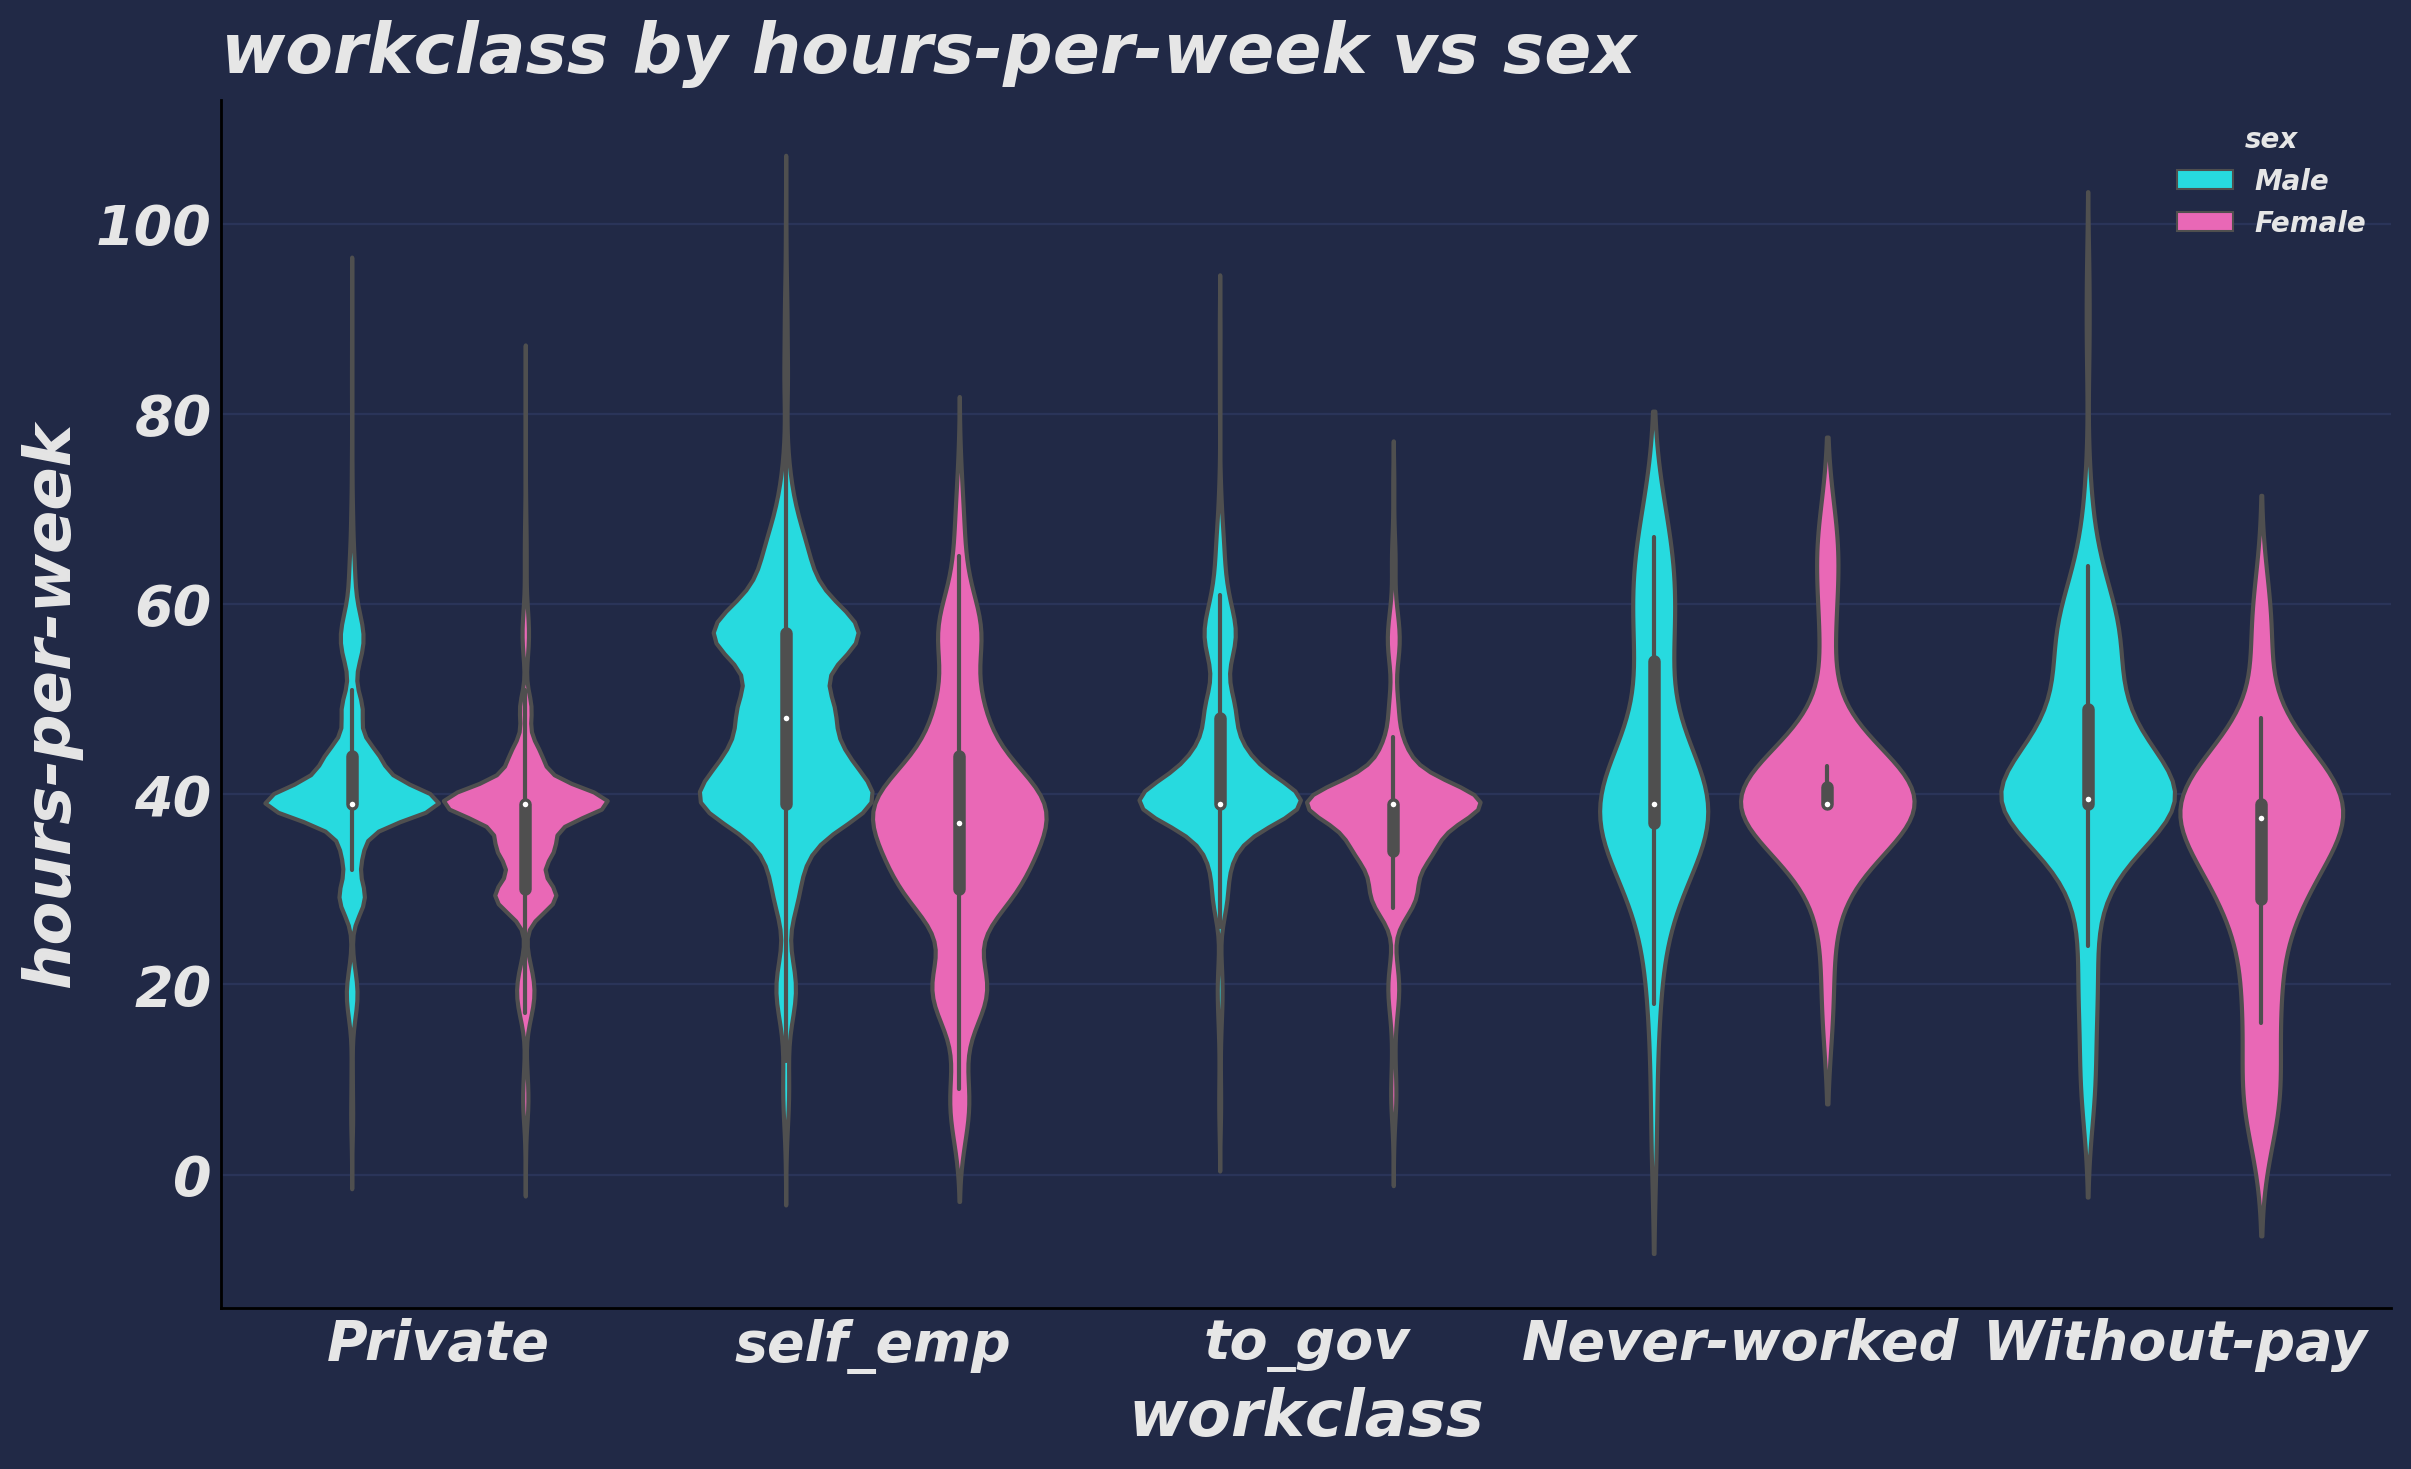

In [42]:
plt.figure(figsize=(14,8))

sns.violinplot(x=train["workclass"], y=train["hours-per-week"], hue=train["sex"])
plt.title("workclass by hours-per-week vs sex")

Text(0.0, 1.0, 'income by hours-per-week vs sex')

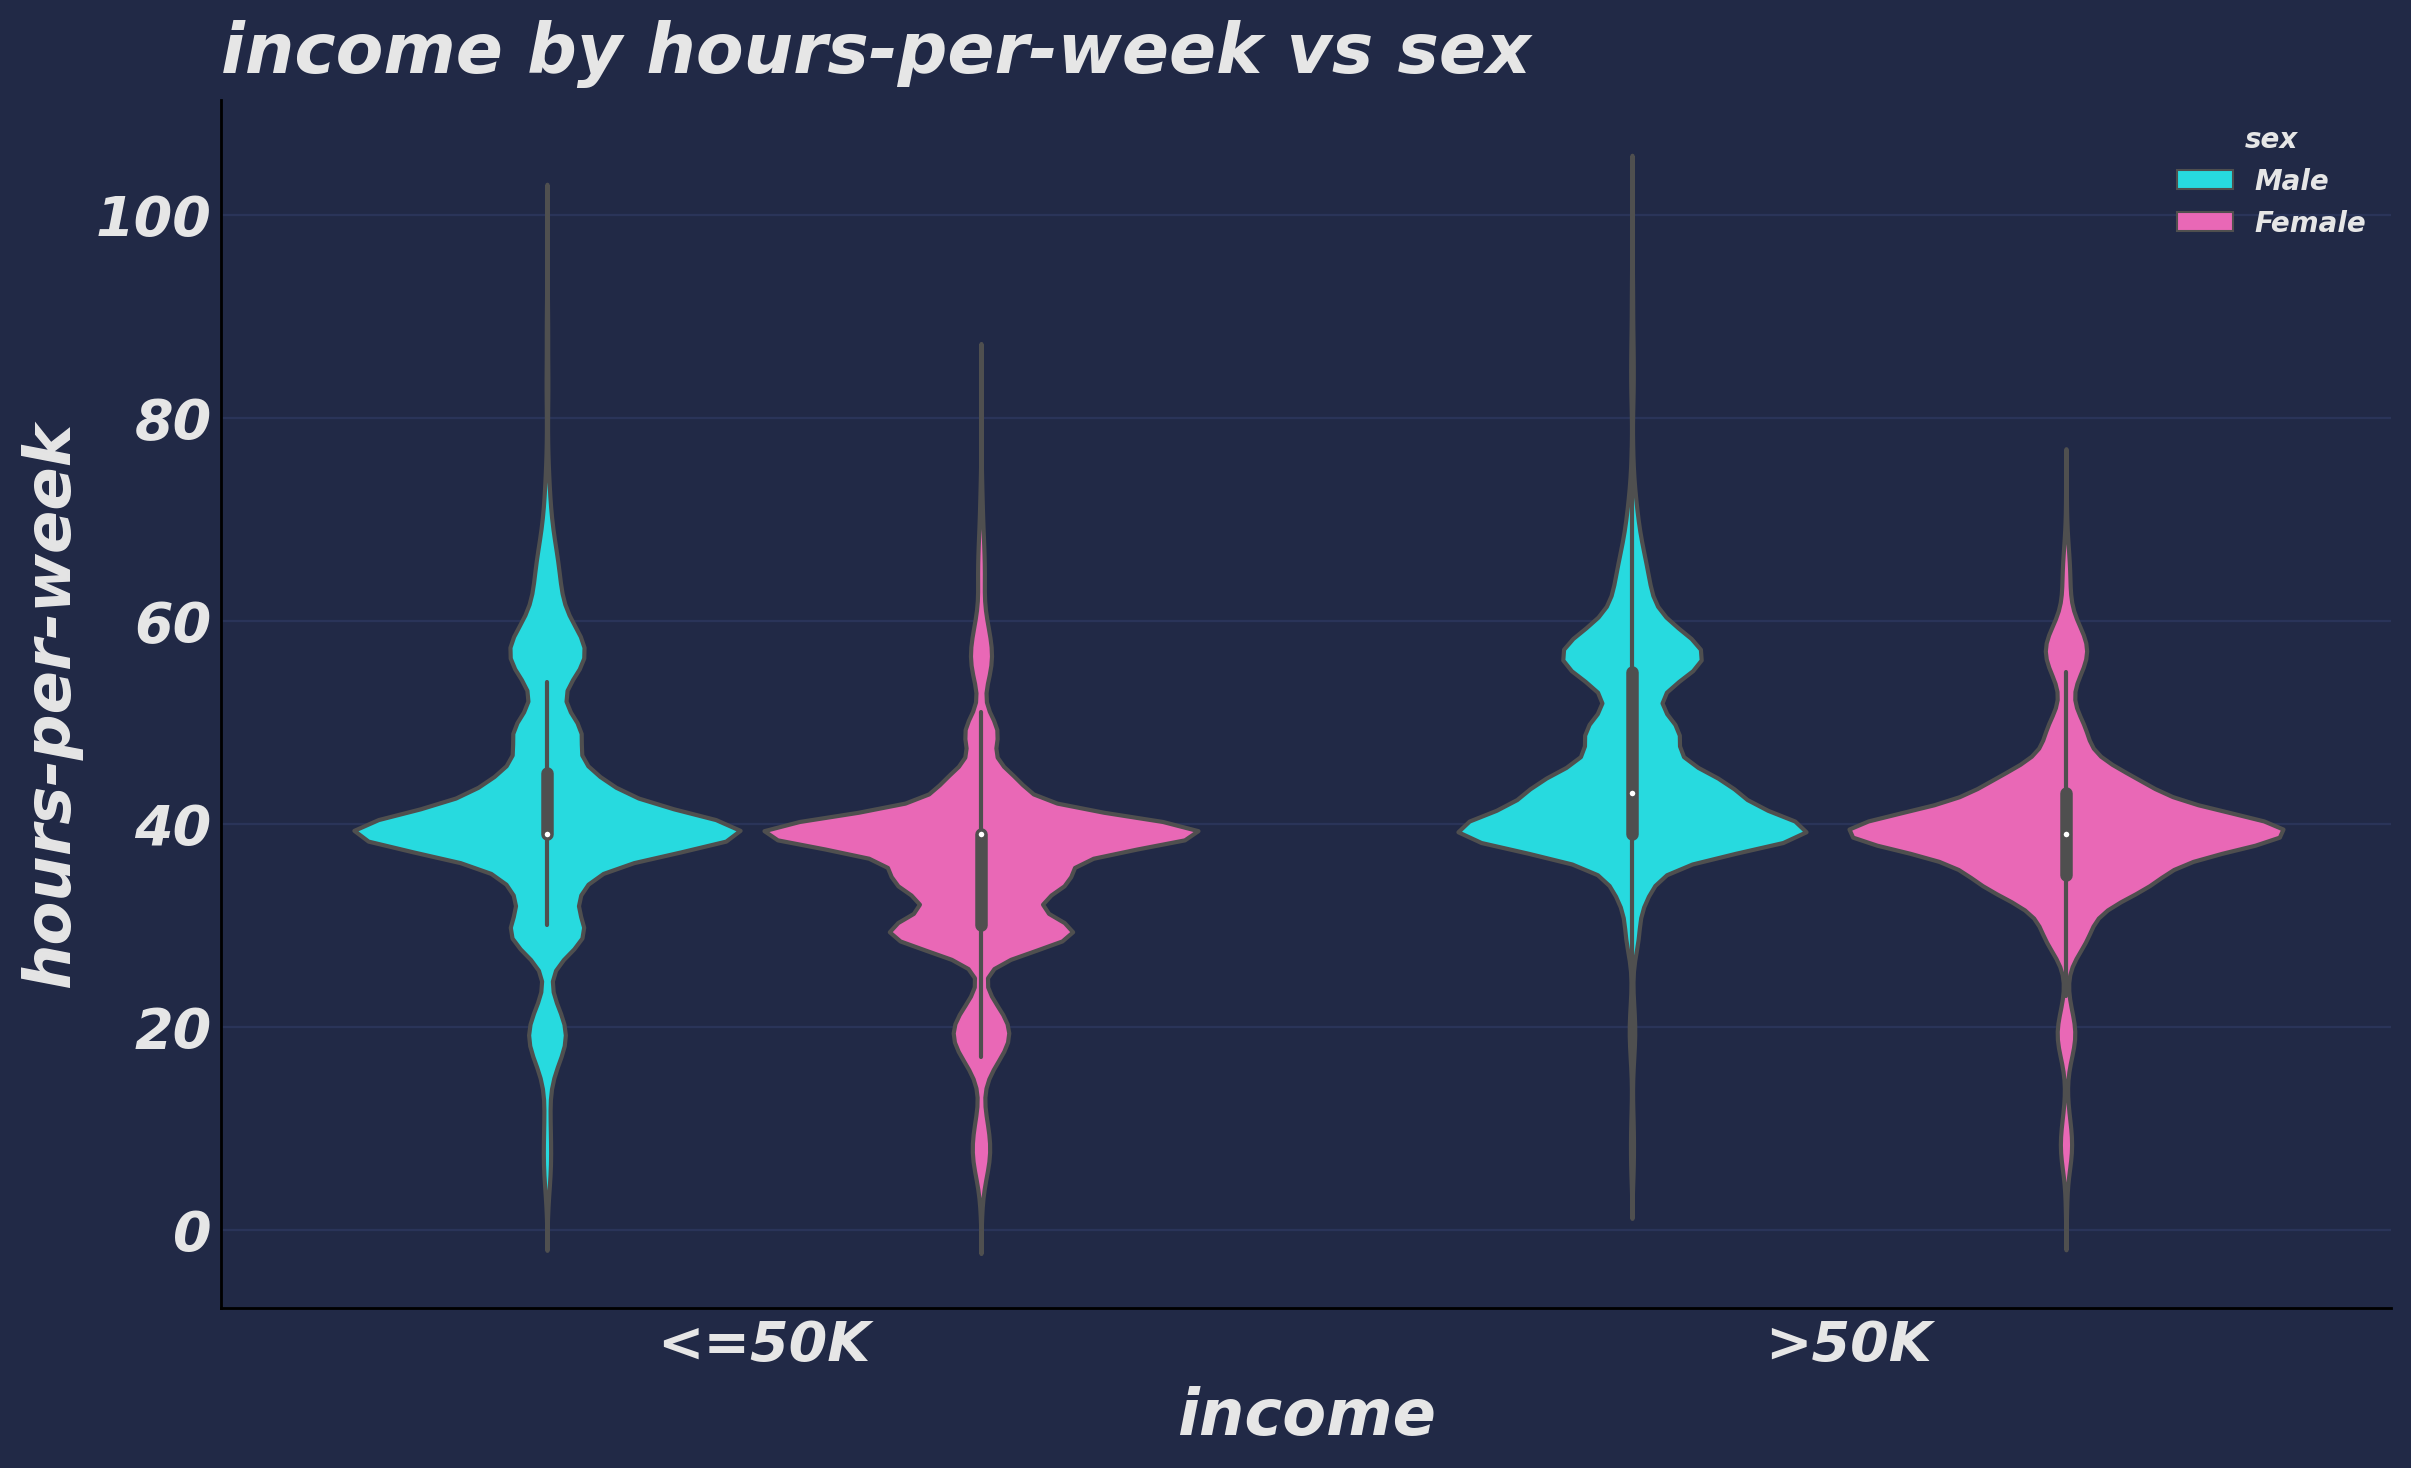

In [43]:
plt.figure(figsize=(14,8))

sns.violinplot(x=train["income"], y=train["hours-per-week"], hue=train["sex"])
plt.title("income by hours-per-week vs sex")

In [44]:
train.groupby(["sex","race"])["hours-per-week"].mean().to_frame() 

hours-per-week
sex    race                              
Female Amer-Indian-Eskimo       35.046512
       Asian-Pac-Islander       36.437118
       Black                    35.233117
       Other                    34.753788
       White                    36.851703
Male   Amer-Indian-Eskimo       43.394984
       Asian-Pac-Islander       43.082508
       Black                    39.457216
       Other                    41.588785
       White                    43.782096

In [46]:
train.groupby(["education","workclass"])["hours-per-week"].mean().to_frame()

hours-per-week
education    workclass                   
1st-12th     Never-worked       41.076923
             Private            36.168263
             Without-pay        41.206897
             self_emp           42.282851
             to_gov             36.778947
Bachelors    Never-worked       46.352941
             Private            41.873425
             Without-pay        43.558140
             self_emp           48.834066
             to_gov             42.541429
Doctorate    Never-worked       51.500000
             Private            43.207547
             self_emp           51.106796
             to_gov             48.487805
HS-grad      Never-worked       40.200000
             Private            37.586857
             Without-pay        37.697917
             self_emp           43.295763
             to_gov             38.572131
Masters      Never-worked       36.500000
             Private            42.557457
             Without-pay        42.333333
             self_emp           48.763736
             to_gov             41.996997
Preschool    Private            38.032258
             Without-pay        41.500000
             self_emp           45.800000
             to_gov             39.000000
Prof-school  Never-worked       51.750000
             Private            45.543478
             self_emp           54.185841
             to_gov             47.435484
Some-college Never-worked       35.944444
             Private            36.787815
             Without-pay        39.438596
             self_emp           40.452668
             to_gov             36.007052
associates   Never-worked       39.000000
             Private            40.513932
             Without-pay        35.125000
             self_emp           47.542017
             to_gov             40.650000

In [47]:
train.groupby(["education","occupation"])["hours-per-week"].mean().to_frame()

hours-per-week
education    occupation                      
1st-12th     Adm-clerical           35.225989
             Exec-managerial        42.400000
             Prof-specialty         39.295455
             Sales                  39.107143
             blue-colar             38.509579
             other-occupation       37.365854
             service                32.891429
Bachelors    Adm-clerical           40.025232
             Exec-managerial        47.296099
             Prof-specialty         44.946638
             Sales                  46.341053
             blue-colar             44.275000
             other-occupation       41.783333
             service                39.763158
Doctorate    Adm-clerical           41.111111
             Exec-managerial        45.888889
             Prof-specialty         47.824451
             Sales                  43.800000
             blue-colar             44.225806
             service                33.500000
HS-grad      Adm-clerical           36.676515
             Exec-managerial        43.206642
             Prof-specialty         42.632184
             Sales                  41.124620
             blue-colar             40.785826
             other-occupation       38.700000
             service                35.645631
Masters      Adm-clerical           39.384615
             Exec-managerial        44.275281
             Prof-specialty         44.004255
             Sales                  44.173913
             blue-colar             44.268657
             other-occupation       42.800000
             service                40.891304
Preschool    Adm-clerical           34.333333
             Exec-managerial        36.500000
             Prof-specialty         43.750000
             Sales                  40.285714
             blue-colar             40.900000
             other-occupation       39.000000
             service                38.428571
Prof-school  Adm-clerical           47.900000
             Exec-managerial        48.040000
             Prof-specialty         50.619186
             Sales                  46.666667
             blue-colar             51.129630
             service                40.000000
Some-college Adm-clerical           35.314205
             Exec-managerial        41.011976
             Prof-specialty         39.602996
             Sales                  37.350126
             blue-colar             38.612676
             other-occupation       36.729167
             service                34.959839
associates   Adm-clerical           41.900735
             Exec-managerial        43.835294
             Prof-specialty         41.953846
             Sales                  42.716667
             blue-colar             41.202941
             other-occupation       39.562500
             service                38.846154

In [ ]:
#drop Colums

In [49]:
train

age workclass  fnlwgt     education  education-num marital-status  \
0       52   Private   98926       HS-grad              9  Never-married   
1       76  self_emp  132607     Bachelors             12        married   
2       40   Private  243258     Bachelors             13        married   
3       76    to_gov  181259     Bachelors             12        married   
4       36  self_emp  115379       Masters             13    not-married   
...    ...       ...     ...           ...            ...            ...   
18939   25   Private  174301     Bachelors             12  Never-married   
18940   22   Private  135915  Some-college              9  Never-married   
18941   47    to_gov   47276     Bachelors             12  Never-married   
18942   48   Private   88787     Bachelors             12        married   
18943   47    to_gov  175720       Masters             13        married   

            occupation    relationship                race     sex  \
0              service       Unmarried               White    Male   
1                Sales         Husband               White    Male   
2           blue-colar         Husband  Amer-Indian-Eskimo    Male   
3       Prof-specialty         Husband               White    Male   
4      Exec-managerial   Not-in-family               White    Male   
...                ...             ...                 ...     ...   
18939          service   Not-in-family               White  Female   
18940          service       Unmarried               White  Female   
18941     Adm-clerical  Other-relative               Black  Female   
18942            Sales         Husband  Asian-Pac-Islander    Male   
18943       blue-colar         Husband               White    Male   

      capital-gain capital-loss  hours-per-week        native-country income  \
0              min         none              44         United-States  <=50K   
1              max         none              44         United-States   >50K   
2              max         none              57         United-States   >50K   
3              max         none              44         United-States   >50K   
4              max         none              58         United-States  <=50K   
...            ...          ...             ...                   ...    ...   
18939          max         none              39         United-States  <=50K   
18940          max         none              44  british-commonwealth  <=50K   
18941          max          max              39         United-States  <=50K   
18942          min         none              71                euro-2  <=50K   
18943          min         none              39         United-States   >50K   

      age_bins  
0        50-75  
1       75-100  
2        25-50  
3       75-100  
4        25-50  
...        ...  
18939     0-25  
18940     0-25  
18941    25-50  
18942    25-50  
18943    25-50  

[18944 rows x 16 columns]

In [50]:
for i in [train,test]:
    i.drop(["age","fnlwgt", "education-num"], axis=1, inplace=True) 

In [54]:
print(train.shape)
print(test.shape)
print(" ")
print(" ")
print(train.isnull().any().sum())
print(test.isnull().any().sum())

(18944, 13)
(8119, 13)
 
 
0
1


In [56]:
test.drop("hours-per-week",axis=1,inplace=True)

In [ ]:
#final clean

In [57]:
train.to_csv("train_work-hours-prediction(clean).csv",index=False)

In [58]:
test.to_csv("test_work-hours-prediction(clean).csv",index=False)